In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf

In [ ]:
import pandas as pd

start_date = "2016-01-01"
end_date = "2024-12-04"

activo = "^VIX"

df = yf.download(activo, start=start_date, end=end_date, progress=False)['Close']

df.to_excel(f"{activo.replace('^', '')}.xlsx")

print(df.head())


Ticker           ^VIX
Date                 
2016-01-04  20.700001
2016-01-05  19.340000
2016-01-06  20.590000
2016-01-07  24.990000
2016-01-08  27.010000


In [ ]:


import pandas as pd


archivo_precios = "Datos Precio TFG.xlsx"
archivo_vix = "/content/VIX (1).xlsx"


hojas_precios = pd.read_excel(archivo_precios, sheet_name=None)


df_vix = pd.read_excel(archivo_vix)


print("Columnas en VIX.xlsx:", df_vix.columns)


df_vix.columns = df_vix.columns.str.strip().str.lower()


df_vix["date"] = pd.to_datetime(df_vix["date"])


hojas_actualizadas = {}


for nombre_hoja, df_precio in hojas_precios.items():
    print(f"Procesando hoja: {nombre_hoja}")


    df_precio.columns = df_precio.columns.str.strip().str.lower()


    df_precio["date"] = pd.to_datetime(df_precio["date"])


    df_merged = df_precio.merge(df_vix, on="date", how="left")


    vix_mean = df_merged["vix"].mean()
    df_merged["vix"] = df_merged["vix"].fillna(vix_mean)


    hojas_actualizadas[nombre_hoja] = df_merged


archivo_salida = "Datos_Precio_TFG_Actualizado.xlsx"
with pd.ExcelWriter(archivo_salida) as writer:
    for hoja, df in hojas_actualizadas.items():
        df.to_excel(writer, sheet_name=hoja, index=False)

print(f"Proceso terminado. Archivo guardado como: {archivo_salida}")

Columnas en VIX.xlsx: Index(['Date', 'VIX'], dtype='object')
Procesando hoja: ETH
Procesando hoja: ADA
Procesando hoja: BTC
Proceso terminado. Archivo guardado como: Datos_Precio_TFG_Actualizado.xlsx


In [ ]:


import pandas as pd


archivo_cpi = "CPIAUCSL.xlsx"
df = pd.read_excel(archivo_cpi)


print("Columnas en CPIAUCSL:", df.columns)
print(df.head())


df["date"] = pd.to_datetime(df["date"])


df.set_index("date", inplace=True)


fecha_diaria = pd.date_range(start=df.index.min(), end=df.index.max(), freq='D')


df_diario = df.reindex(fecha_diaria)


df_diario["CPIAUCSL"] = df_diario["CPIAUCSL"].interpolate(method='linear')


df_diario.reset_index(inplace=True)
df_diario.rename(columns={"index": "date"}, inplace=True)


print(df_diario.head())


df_diario.to_excel("CPIAUCSL_diario.xlsx", index=False)

print("Proceso completado. CPI diario guardado en CPIAUCSL_diario.xlsx")

Columnas en CPIAUCSL: Index(['date', 'CPIAUCSL'], dtype='object')
        date  CPIAUCSL
0 2016-01-01   237.652
1 2016-02-01   237.336
2 2016-03-01   238.080
3 2016-04-01   238.992
4 2016-05-01   239.557
        date    CPIAUCSL
0 2016-01-01  237.652000
1 2016-01-02  237.641806
2 2016-01-03  237.631613
3 2016-01-04  237.621419
4 2016-01-05  237.611226
Proceso completado. CPI diario guardado en CPIAUCSL_diario.xlsx


In [ ]:


import pandas as pd


archivo_precios = "Datos_Precio_TFG_Actualizado (1).xlsx"
archivo_cpi = "CPIAUCSL_diario.xlsx"


hojas_precios = pd.read_excel(archivo_precios, sheet_name=None)


df_cpi = pd.read_excel(archivo_cpi)


df_cpi["date"] = pd.to_datetime(df_cpi["date"])


hojas_actualizadas = {}


for nombre_hoja, df_precio in hojas_precios.items():
    print(f"Procesando hoja: {nombre_hoja}")


    df_precio.columns = df_precio.columns.str.strip().str.lower()


    df_precio["date"] = pd.to_datetime(df_precio["date"])


    df_merged = df_precio.merge(df_cpi, on="date", how="left")


    cpi_mean = df_merged["CPIAUCSL"].mean()
    df_merged["CPIAUCSL"] = df_merged["CPIAUCSL"].fillna(cpi_mean)


    hojas_actualizadas[nombre_hoja] = df_merged


archivo_salida = "Datos_Precio_TFG_CPI_Actualizado.xlsx"
with pd.ExcelWriter(archivo_salida) as writer:
    for hoja, df in hojas_actualizadas.items():
        df.to_excel(writer, sheet_name=hoja, index=False)

print(f"Proceso terminado. Archivo guardado como: {archivo_salida}")

Procesando hoja: ETH
Procesando hoja: ADA
Procesando hoja: BTC
Proceso terminado. Archivo guardado como: Datos_Precio_TFG_CPI_Actualizado.xlsx


In [ ]:


import yfinance as yf
import pandas as pd

ticker = 'DX-Y.NYB'


start_date = '2016-01-01'
end_date = '2024-12-04'


df = yf.download(ticker, start=start_date, end=end_date)


if not df.empty:

    df.to_excel('DXY_Historial.xlsx')
    print("Datos guardados en 'DXY_Historial.xlsx'")
else:
    print("No se encontraron datos para el rango de fechas especificado.")

[*********************100%***********************]  1 of 1 completed


Datos guardados en 'DXY_Historial.xlsx'


In [ ]:


import pandas as pd


archivo_precios = "Datos_Precio_TFG_CPI_Actualizado.xlsx"
archivo_dxy = "DXY_Historial.xlsx"


hojas_precios = pd.read_excel(archivo_precios, sheet_name=None)


df_dxy = pd.read_excel(archivo_dxy)


df_dxy["date"] = pd.to_datetime(df_dxy["Date"])
df_dxy = df_dxy[["date", "Close"]]


hojas_actualizadas = {}


for nombre_hoja, df_precio in hojas_precios.items():
    print(f"Procesando hoja: {nombre_hoja}")


    df_precio.columns = df_precio.columns.str.strip().str.lower()


    df_precio["date"] = pd.to_datetime(df_precio["date"])


    df_merged = df_precio.merge(df_dxy, on="date", how="left")


    close_mean = df_merged["Close"].mean()
    df_merged["Close"] = df_merged["Close"].fillna(close_mean)


    hojas_actualizadas[nombre_hoja] = df_merged


archivo_salida = "Datos_Precio_TFG_CPI_DXY_Actualizado.xlsx"
with pd.ExcelWriter(archivo_salida) as writer:
    for hoja, df in hojas_actualizadas.items():
        df.to_excel(writer, sheet_name=hoja, index=False)

print(f"✅ Proceso terminado. Archivo guardado como: {archivo_salida}")

Procesando hoja: ETH
Procesando hoja: ADA
Procesando hoja: BTC
✅ Proceso terminado. Archivo guardado como: Datos_Precio_TFG_CPI_DXY_Actualizado.xlsx


In [ ]:

import yfinance as yf
import pandas as pd

ticker = '^GSPC'


start_date = '2016-01-01'
end_date = '2024-12-04'


df = yf.download(ticker, start=start_date, end=end_date)


if not df.empty:

    df.to_excel('SP500_Historial.xlsx')
    print("Datos guardados en 'SP500_Historial.xlsx'")
else:
    print("No se encontraron datos para el rango de fechas especificado.")

[*********************100%***********************]  1 of 1 completed


Datos guardados en 'SP500_Historial.xlsx'


In [ ]:

import pandas as pd


archivo_precios = "Datos_Precio_TFG_CPI_DXY_Actualizado.xlsx"
archivo_sp500 = "SP500_Historial.xlsx"


hojas_precios = pd.read_excel(archivo_precios, sheet_name=None)


df_sp500 = pd.read_excel(archivo_sp500)


df_sp500["date"] = pd.to_datetime(df_sp500["Date"])
df_sp500 = df_sp500[["date", "Close"]]
df_sp500.rename(columns={"Close": "SP500_Close"}, inplace=True)


hojas_actualizadas = {}


for nombre_hoja, df_precio in hojas_precios.items():
    print(f"Procesando hoja: {nombre_hoja}")


    df_precio.columns = df_precio.columns.str.strip().str.lower()


    df_precio["date"] = pd.to_datetime(df_precio["date"])


    df_merged = df_precio.merge(df_sp500, on="date", how="left")


    df_merged["SP500_Close"] = df_merged["SP500_Close"].fillna(method="ffill")


    df_merged["SP500_Close"] = df_merged["SP500_Close"].fillna(method="bfill")


    hojas_actualizadas[nombre_hoja] = df_merged


archivo_salida = "Datos_Precio_TFG_CPI_DXY_SP500_Actualizado.xlsx"
with pd.ExcelWriter(archivo_salida) as writer:
    for hoja, df in hojas_actualizadas.items():
        df.to_excel(writer, sheet_name=hoja, index=False)

print(f"✅ Proceso terminado. Archivo guardado como: {archivo_salida}")

Procesando hoja: ETH
Procesando hoja: ADA
Procesando hoja: BTC


<ipython-input-22-ee6ef4dd068a>:35: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_merged["SP500_Close"] = df_merged["SP500_Close"].fillna(method="ffill")
<ipython-input-22-ee6ef4dd068a>:38: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_merged["SP500_Close"] = df_merged["SP500_Close"].fillna(method="bfill")
<ipython-input-22-ee6ef4dd068a>:35: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_merged["SP500_Close"] = df_merged["SP500_Close"].fillna(method="ffill")
<ipython-input-22-ee6ef4dd068a>:38: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_merged["SP500_Close"] = df_merged["SP500_Close"].fillna(method="bfill")
<ipython-input-2

✅ Proceso terminado. Archivo guardado como: Datos_Precio_TFG_CPI_DXY_SP500_Actualizado.xlsx


In [ ]:

import yfinance as yf
import pandas as pd

ticker = 'GC=F'


start_date = '2016-01-01'
end_date = '2024-12-04'


df = yf.download(ticker, start=start_date, end=end_date)


if not df.empty:

    df.to_excel('Oro_Historial.xlsx')
    print("Datos guardados en 'Oro_Historial.xlsx'")
else:
    print("No se encontraron datos para el rango de fechas especificado.")

[*********************100%***********************]  1 of 1 completed


Datos guardados en 'Oro_Historial.xlsx'


In [ ]:


import pandas as pd


archivo_precios = 'Datos_Precio_TFG_CPI_DXY_SP500_Actualizado (1).xlsx'
archivo_oro = 'Oro_Historial.xlsx'


hojas_precios = pd.read_excel(archivo_precios, sheet_name=None)


df_oro = pd.read_excel(archivo_oro)


df_oro['Date'] = pd.to_datetime(df_oro['Date'])


df_oro = df_oro[['Date', 'Close']].rename(columns={'Close': 'Gold_Close'})


hojas_actualizadas = {}


for nombre_hoja, df_precio in hojas_precios.items():
    print(f"Procesando hoja: {nombre_hoja}")


    df_precio.columns = df_precio.columns.str.strip().str.lower()


    df_precio['date'] = pd.to_datetime(df_precio['date'])


    df_merged = pd.merge(df_precio, df_oro, left_on='date', right_on='Date', how='left')


    df_merged['Gold_Close'] = df_merged['Gold_Close'].fillna(method='ffill')


    df_merged['Gold_Close'] = df_merged['Gold_Close'].fillna(method='bfill')


    df_merged.drop(columns=['Date'], inplace=True)


    hojas_actualizadas[nombre_hoja] = df_merged


archivo_salida = 'Datos_Precio_TFG_CPI_DXY_SP500_Oro_Actualizado.xlsx'
with pd.ExcelWriter(archivo_salida) as writer:
    for hoja, df in hojas_actualizadas.items():
        df.to_excel(writer, sheet_name=hoja, index=False)

print(f"✅ Proceso terminado. Archivo guardado como: {archivo_salida}")

Procesando hoja: ETH
Procesando hoja: ADA
Procesando hoja: BTC


<ipython-input-28-0c53cbbe307d>:36: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_merged['Gold_Close'] = df_merged['Gold_Close'].fillna(method='ffill')
<ipython-input-28-0c53cbbe307d>:39: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_merged['Gold_Close'] = df_merged['Gold_Close'].fillna(method='bfill')
<ipython-input-28-0c53cbbe307d>:36: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_merged['Gold_Close'] = df_merged['Gold_Close'].fillna(method='ffill')
<ipython-input-28-0c53cbbe307d>:39: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_merged['Gold_Close'] = df_merged['Gold_Close'].fillna(method='bfill')
<ipython-input-28-0c53cb

✅ Proceso terminado. Archivo guardado como: Datos_Precio_TFG_CPI_DXY_SP500_Oro_Actualizado.xlsx


In [ ]:

import yfinance as yf
import pandas as pd

ticker = '^STOXX50E'


start_date = '2016-01-01'
end_date = '2024-12-04'


df = yf.download(ticker, start=start_date, end=end_date)


if not df.empty:

    df.to_excel('EURO_Historial.xlsx')
    print("Datos guardados en 'EURO_Historial.xlsx'")
else:
    print("No se encontraron datos para el rango de fechas especificado.")

[*********************100%***********************]  1 of 1 completed


Datos guardados en 'EURO_Historial.xlsx'


In [ ]:


import pandas as pd


archivo_precios = 'Datos_Precio_TFG_CPI_DXY_SP500_Oro_Actualizado (1).xlsx'
archivo_eurostoxx = 'EURO_Historial.xlsx'


hojas_precios = pd.read_excel(archivo_precios, sheet_name=None)


df_eurostoxx = pd.read_excel(archivo_eurostoxx)


df_eurostoxx['Date'] = pd.to_datetime(df_eurostoxx['Date'])


df_eurostoxx.rename(columns={'Close': 'EuroStoxx_Close'}, inplace=True)


df_eurostoxx = df_eurostoxx[['Date', 'EuroStoxx_Close']]


hojas_actualizadas = {}


for nombre_hoja, df_precio in hojas_precios.items():
    print(f"Procesando hoja: {nombre_hoja}")


    df_precio.columns = df_precio.columns.str.strip().str.lower()


    df_precio['date'] = pd.to_datetime(df_precio['date'])


    df_merged = pd.merge(df_precio, df_eurostoxx, left_on='date', right_on='Date', how='left')


    df_merged['EuroStoxx_Close'] = df_merged['EuroStoxx_Close'].fillna(method='ffill')


    df_merged['EuroStoxx_Close'] = df_merged['EuroStoxx_Close'].fillna(method='bfill')


    df_merged.drop(columns=['Date'], inplace=True)


    hojas_actualizadas[nombre_hoja] = df_merged


archivo_salida = 'Datos_Precio_TFG_CPI_DXY_SP500_Oro_EuroStoxx_Actualizado.xlsx'
with pd.ExcelWriter(archivo_salida) as writer:
    for hoja, df in hojas_actualizadas.items():
        df.to_excel(writer, sheet_name=hoja, index=False)

print(f"✅ Proceso terminado. Archivo guardado como: {archivo_salida}")

Procesando hoja: ETH
Procesando hoja: ADA
Procesando hoja: BTC


<ipython-input-36-1e4975d04d13>:39: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_merged['EuroStoxx_Close'] = df_merged['EuroStoxx_Close'].fillna(method='ffill')
<ipython-input-36-1e4975d04d13>:42: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_merged['EuroStoxx_Close'] = df_merged['EuroStoxx_Close'].fillna(method='bfill')
<ipython-input-36-1e4975d04d13>:39: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_merged['EuroStoxx_Close'] = df_merged['EuroStoxx_Close'].fillna(method='ffill')
<ipython-input-36-1e4975d04d13>:42: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_merged['EuroStoxx_Close'] = df_merged['EuroStoxx_Close'].fillna(

✅ Proceso terminado. Archivo guardado como: Datos_Precio_TFG_CPI_DXY_SP500_Oro_EuroStoxx_Actualizado.xlsx


In [ ]:
import pandas as pd

archivo_precios = "Datos_Precio_TFG_CPI_DXY_SP500_Oro_EuroStoxx_Actualizado.xlsx"
archivo_m2 = "WM2NS.xlsx"


hojas_precios = pd.read_excel(archivo_precios, sheet_name=None)


df_m2 = pd.read_excel(archivo_m2)


df_m2['Date'] = pd.to_datetime(df_m2['Date'])


hojas_actualizadas = {}


for nombre_hoja, df_precio in hojas_precios.items():
    print(f"Procesando hoja: {nombre_hoja}")


    df_precio.columns = df_precio.columns.str.strip().str.lower()


    df_precio['date'] = pd.to_datetime(df_precio['date'])


    df_merged = pd.merge(df_precio, df_m2, left_on='date', right_on='Date', how='left')


    df_merged['WM2NS'] = df_merged['WM2NS'].fillna(method='ffill').fillna(method='bfill')


    df_merged.drop(columns=['Date'], inplace=True)


    hojas_actualizadas[nombre_hoja] = df_merged


archivo_salida = "Datos_Precio_TFG_CPI_DXY_SP500_Oro_EuroStoxx_M2_Actualizado.xlsx"
with pd.ExcelWriter(archivo_salida) as writer:
    for hoja, df in hojas_actualizadas.items():
        df.to_excel(writer, sheet_name=hoja, index=False)

print(f"✅ Proceso terminado. Archivo guardado como: {archivo_salida}")

Procesando hoja: ETH
Procesando hoja: ADA
Procesando hoja: BTC


<ipython-input-45-07dfd24fad5a>:33: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_merged['WM2NS'] = df_merged['WM2NS'].fillna(method='ffill').fillna(method='bfill')
<ipython-input-45-07dfd24fad5a>:33: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_merged['WM2NS'] = df_merged['WM2NS'].fillna(method='ffill').fillna(method='bfill')
<ipython-input-45-07dfd24fad5a>:33: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_merged['WM2NS'] = df_merged['WM2NS'].fillna(method='ffill').fillna(method='bfill')


✅ Proceso terminado. Archivo guardado como: Datos_Precio_TFG_CPI_DXY_SP500_Oro_EuroStoxx_M2_Actualizado.xlsx


In [ ]:
import requests
import pandas as pd


url = "https://api.alternative.me/fng/?limit=0&format=json"


response = requests.get(url)


if response.status_code == 200:
    data = response.json()


    df = pd.DataFrame(data["data"])


    df["timestamp"] = pd.to_datetime(df["timestamp"], unit="s")


    df.rename(columns={"value": "Fear_Greed_Index", "value_classification": "Sentiment", "timestamp": "Date"}, inplace=True)


    df = df[["Date", "Fear_Greed_Index", "Sentiment"]]


    df.to_excel("Crypto_Fear_Greed_Index.xlsx", index=False)

    print("✅ Datos guardados en 'Crypto_Fear_Greed_Index.xlsx'")
else:
    print(f"❌ Error al obtener los datos. Código de estado: {response.status_code}")


<ipython-input-4-92beceba2ae2>:18: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df["timestamp"] = pd.to_datetime(df["timestamp"], unit="s")


✅ Datos guardados en 'Crypto_Fear_Greed_Index.xlsx'


In [ ]:
import requests
import pandas as pd


url = "https://api.alternative.me/fng/?limit=0&format=json"


response = requests.get(url)


if response.status_code == 200:
    data = response.json()


    df = pd.DataFrame(data["data"])


    df["timestamp"] = pd.to_datetime(df["timestamp"], unit="s")


    df.rename(columns={"value": "Fear_Greed_Index", "value_classification": "Sentiment", "timestamp": "Date"}, inplace=True)


    df = df[["Date", "Fear_Greed_Index", "Sentiment"]]


    df = df.sort_values(by="Date").reset_index(drop=True)


    df = df[df["Date"] <= "2024-12-04"]


    archivo_salida = "Crypto_Fear_Greed_Index_Sorted.xlsx"
    df.to_excel(archivo_salida, index=False)

    print(f"✅ Archivo guardado correctamente como {archivo_salida}")

else:
    print(f"❌ Error al obtener los datos. Código de estado: {response.status_code}")


<ipython-input-5-eeddab12c05e>:18: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df["timestamp"] = pd.to_datetime(df["timestamp"], unit="s")


✅ Archivo guardado correctamente como Crypto_Fear_Greed_Index_Sorted.xlsx


In [ ]:
import requests
import pandas as pd
import numpy as np


archivo_sentimiento = "Crypto_Fear_Greed_Index_Sorted.xlsx"


df = pd.read_excel(archivo_sentimiento)


df['Date'] = pd.to_datetime(df['Date'])


missing_dates = pd.date_range(start="2016-01-01", end="2018-01-01", freq='D')


df_missing = pd.DataFrame({'Date': missing_dates, 'Fear_Greed_Index': np.nan, 'Sentiment': None})


df_extended = pd.concat([df_missing, df]).sort_values(by="Date").reset_index(drop=True)



ref_2016 = df_extended[(df_extended['Date'] >= '2018-12-01') &
                       (df_extended['Date'] <= '2019-04-30')]['Fear_Greed_Index'].values


ref_2017 = df_extended[(df_extended['Date'] >= '2019-01-01') &
                       (df_extended['Date'] <= '2019-07-31')]['Fear_Greed_Index'].values


ref_2018 = df_extended[(df_extended['Date'] >= '2017-12-15') &
                       (df_extended['Date'] <= '2017-12-31')]['Fear_Greed_Index'].values


mask_2016 = (df_extended['Date'] >= '2016-01-01') & (df_extended['Date'] <= '2016-12-31')
mask_2017 = (df_extended['Date'] >= '2017-01-01') & (df_extended['Date'] <= '2017-12-31')
mask_2018 = (df_extended['Date'] >= '2018-01-01') & (df_extended['Date'] <= '2018-01-31')


values_2016 = np.resize(ref_2016, mask_2016.sum())
values_2017 = np.resize(ref_2017, mask_2017.sum())
values_2018 = np.resize(ref_2018, mask_2018.sum())


df_extended.loc[mask_2016, 'Fear_Greed_Index'] = values_2016
df_extended.loc[mask_2017, 'Fear_Greed_Index'] = values_2017
df_extended.loc[mask_2018, 'Fear_Greed_Index'] = values_2018


archivo_salida = "Crypto_Fear_Greed_Index_Extended.xlsx"
df_extended.to_excel(archivo_salida, index=False)

print(f"✅ Archivo guardado correctamente como {archivo_salida}")


✅ Archivo guardado correctamente como Crypto_Fear_Greed_Index_Extended.xlsx


In [ ]:
import requests
import pandas as pd
import numpy as np


archivo_sentimiento = "Crypto_Fear_Greed_Index_Sorted.xlsx"


df = pd.read_excel(archivo_sentimiento)


df['Date'] = pd.to_datetime(df['Date'])


missing_dates = pd.date_range(start="2016-01-01", end="2018-01-31", freq='D')


df_missing = pd.DataFrame({'Date': missing_dates, 'Fear_Greed_Index': np.nan, 'Sentiment': None})


df_extended = pd.concat([df_missing, df]).sort_values(by="Date").reset_index(drop=True)



ref_2016 = df_extended[(df_extended['Date'] >= '2018-12-01') &
                       (df_extended['Date'] <= '2019-04-30')]['Fear_Greed_Index'].values


ref_2017 = df_extended[(df_extended['Date'] >= '2019-01-01') &
                       (df_extended['Date'] <= '2019-07-31')]['Fear_Greed_Index'].values


ref_2018 = df_extended[(df_extended['Date'] > '2017-12-15') &
                       (df_extended['Date'] < '2018-02-01')]['Fear_Greed_Index'].values


mask_2016 = (df_extended['Date'] >= '2016-01-01') & (df_extended['Date'] <= '2016-12-31')
mask_2017 = (df_extended['Date'] >= '2017-01-01') & (df_extended['Date'] <= '2017-12-31')
mask_2018 = (df_extended['Date'] > '2017-12-31') & (df_extended['Date'] < '2018-02-01')


values_2016 = np.resize(ref_2016, mask_2016.sum())
values_2017 = np.resize(ref_2017, mask_2017.sum())
values_2018 = np.resize(ref_2018, mask_2018.sum())


df_extended.loc[mask_2016, 'Fear_Greed_Index'] = values_2016
df_extended.loc[mask_2017, 'Fear_Greed_Index'] = values_2017
df_extended.loc[mask_2018, 'Fear_Greed_Index'] = values_2018


archivo_salida = "Crypto_Fear_Greed_Index_Extended.xlsx"
df_extended.to_excel(archivo_salida, index=False)

print(f"✅ Archivo guardado correctamente como {archivo_salida}")


✅ Archivo guardado correctamente como Crypto_Fear_Greed_Index_Extended.xlsx


In [ ]:
import pandas as pd
import numpy as np


archivo_sentimiento = "Crypto_Fear_Greed_Index_Extended.xlsx"


df_extended = pd.read_excel(archivo_sentimiento)


df_extended['Date'] = pd.to_datetime(df_extended['Date'])


ref_trend = df_extended[(df_extended['Date'] >= '2017-12-01') &
                        (df_extended['Date'] <= '2017-12-31')]['Fear_Greed_Index'].values


mask_nulls = (df_extended['Date'] >= '2016-01-01') & (df_extended['Date'] < '2018-01-02') & df_extended['Fear_Greed_Index'].isna()


values_trend = np.resize(ref_trend, mask_nulls.sum())
df_extended.loc[mask_nulls, 'Fear_Greed_Index'] = values_trend


archivo_salida = "Crypto_Fear_Greed_Index_Filled.xlsx"
df_extended.to_excel(archivo_salida, index=False)

print(f"✅ Archivo guardado correctamente como {archivo_salida}")


✅ Archivo guardado correctamente como Crypto_Fear_Greed_Index_Filled.xlsx


In [ ]:
import pandas as pd


archivo_precios = "Datos_Precio_TFG_CPI_DXY_SP500_Oro_EuroStoxx_M2_Actualizado (1).xlsx"
archivo_sentimiento = "Crypto_Fear_Greed_Index_Filled.xlsx"


hojas_precios = pd.read_excel(archivo_precios, sheet_name=None)


df_fear_greed = pd.read_excel(archivo_sentimiento)


df_fear_greed['Date'] = pd.to_datetime(df_fear_greed['Date'])


hojas_actualizadas = {}


for nombre_hoja, df_precio in hojas_precios.items():
    print(f"Procesando hoja: {nombre_hoja}")


    df_precio['Date'] = pd.to_datetime(df_precio['date'])


    df_merged = pd.merge(df_precio, df_fear_greed[['Date', 'Fear_Greed_Index']], on="Date", how="left")


    hojas_actualizadas[nombre_hoja] = df_merged


archivo_salida = "Datos_Precio_TFG_CPI_DXY_SP500_Oro_EuroStoxx_M2_FG_Actualizado.xlsx"
with pd.ExcelWriter(archivo_salida) as writer:
    for hoja, df in hojas_actualizadas.items():
        df.to_excel(writer, sheet_name=hoja, index=False)

print(f"✅ Archivo guardado correctamente como {archivo_salida}")


Procesando hoja: ETH
Procesando hoja: ADA
Procesando hoja: BTC
✅ Archivo guardado correctamente como Datos_Precio_TFG_CPI_DXY_SP500_Oro_EuroStoxx_M2_FG_Actualizado.xlsx


In [ ]:
import pandas as pd


archivo_actualizado = "Datos_Precio_TFG_CPI_DXY_SP500_Oro_EuroStoxx_M2_FG_Actualizado.xlsx"


hojas_precios = pd.read_excel(archivo_actualizado, sheet_name=None)


hojas_actualizadas = {}


for nombre_hoja, df_precio in hojas_precios.items():
    print(f"Procesando hoja: {nombre_hoja}")


    df_precio['Fear_Greed_Index'] = df_precio['Fear_Greed_Index'].fillna(method='ffill')


    hojas_actualizadas[nombre_hoja] = df_precio


archivo_salida = "Datos_Precio_TFG_CPI_DXY_SP500_Oro_EuroStoxx_M2_FG.xlsx"
with pd.ExcelWriter(archivo_salida) as writer:
    for hoja, df in hojas_actualizadas.items():
        df.to_excel(writer, sheet_name=hoja, index=False)

print(f"✅ Archivo guardado correctamente como {archivo_salida}")


Procesando hoja: ETH
Procesando hoja: ADA
Procesando hoja: BTC


<ipython-input-12-c61dc21b6330>:17: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_precio['Fear_Greed_Index'] = df_precio['Fear_Greed_Index'].fillna(method='ffill')


✅ Archivo guardado correctamente como Datos_Precio_TFG_CPI_DXY_SP500_Oro_EuroStoxx_M2_FG.xlsx


In [ ]:
import pandas as pd


archivo_eth = "eth-usd-max.xls"
archivo_datos = "Datos_Precio_TFG_CPI_DXY_SP500_Oro_EuroStoxx_M2_FG.xlsx"


df_eth_max = pd.read_csv(archivo_eth, sep="\t")


df_eth_tfg = pd.read_excel(archivo_datos, sheet_name="ETH")


df_eth_max.columns = df_eth_max.columns.str.strip()
df_eth_tfg.columns = df_eth_tfg.columns.str.strip()


df_eth_max.rename(columns={'fecha': 'Fecha'}, inplace=True)
df_eth_tfg.rename(columns={'fecha': 'Fecha'}, inplace=True)


df_eth_max["Fecha"] = pd.to_datetime(df_eth_max["Fecha"])
df_eth_tfg["Fecha"] = pd.to_datetime(df_eth_tfg["Fecha"])


df_eth_max["Fecha"] = df_eth_max["Fecha"].dt.tz_localize(None)
df_eth_tfg["Fecha"] = df_eth_tfg["Fecha"].dt.tz_localize(None)


df_final = pd.merge(df_eth_tfg, df_eth_max, on="Fecha", how="outer", suffixes=('_TFG', '_MAX'))


df_final = df_final.sort_values(by="Fecha")


df_final.to_excel("ETH_Unido.xlsx", index=False)

print("Unión completada y guardada en 'ETH_Unido.xlsx'.")


Unión completada y guardada en 'ETH_Unido.xlsx'.


In [ ]:
import pandas as pd


file_path = "XRP Historical Data.csv"
df = pd.read_csv(file_path)


def convert_volume(value):
    try:
        if isinstance(value, str):
            value = value.replace(',', '').strip()
            if 'M' in value:
                return float(value.replace('M', '')) * 1_000_000
            elif 'B' in value:
                return float(value.replace('B', '')) * 1_000_000_000
            elif 'K' in value.upper():
                return float(value.replace('K', '')) * 1_000
            else:
                return float(value)
        return value
    except ValueError:
        print(f"Error al convertir el valor: {value}")v
        return None


df['Volumen'] = df['Volumen'].apply(convert_volume)


print(df.head())


         Date   Price       Volumen  Unnamed: 3  Unnamed: 4  Unnamed: 5  \
0   12/4/2024  2.3608  2.350000e+09         NaN         NaN         NaN   
1   12/3/2024  2.5121  3.950000e+09         NaN         NaN         NaN   
2   12/2/2024  2.7225  2.670000e+09         NaN         NaN         NaN   
3   12/1/2024  2.2970  2.130000e+09         NaN         NaN         NaN   
4  11/30/2024  1.9488  2.030000e+09         NaN         NaN         NaN   

   Unnamed: 6  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  


In [ ]:
import pandas as pd


file_path = "XRP Historical Data.csv"
df = pd.read_csv(file_path)


def convert_volume(value):
    try:
        if isinstance(value, str):
            value = value.replace(',', '').strip()
            if 'M' in value:
                return float(value.replace('M', '')) * 1_000_000
            elif 'B' in value:
                return float(value.replace('B', '')) * 1_000_000_000
            elif 'K' in value.upper():
                return float(value.replace('K', '')) * 1_000
            else:
                return float(value)
        return value
    except ValueError:
        print(f"Error al convertir el valor: {value}")
        return None


df['Volumen'] = df['Volumen'].apply(convert_volume)


output_file = "XRP_Historical_Data_Processed.xlsx"
df.to_excel(output_file, index=False)

print(f"Archivo guardado como: {output_file}")


Archivo guardado como: XRP_Historical_Data_Processed.xlsx


In [ ]:

import pandas as pd


file_path = "XRP_Historical_Data_Processed.xlsx"
df = pd.read_excel(file_path)


null_count = df['Volumen'].isnull().sum()
print(f"Cantidad de valores nulos en la columna 'Volumen': {null_count}")


df['Volumen'] = df['Volumen'].fillna(method='ffill')


output_file = "XRP_Historical_Data_Imputed.xlsx"
df.to_excel(output_file, index=False)

print(f"Archivo con valores imputados guardado como: {output_file}")


Cantidad de valores nulos en la columna 'Volumen': 17


<ipython-input-19-3a56a621a62b>:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Volumen'] = df['Volumen'].fillna(method='ffill')


Archivo con valores imputados guardado como: XRP_Historical_Data_Imputed.xlsx


In [ ]:

import pandas as pd


file_xrp = "XRP_Historical_Data_Imputed.xlsx"
df_xrp = pd.read_excel(file_xrp)


df_xrp['Date'] = pd.to_datetime(df_xrp['Date'], errors='coerce')


df_xrp = df_xrp.sort_values(by='Date', ascending=True)


output_file = "XRP_Historical_Data_Ordenado.xlsx"
df_xrp.to_excel(output_file, index=False)

print(f"Archivo ordenado guardado como: {output_file}")


Archivo ordenado guardado como: XRP_Historical_Data_Ordenado.xlsx


In [ ]:
import pandas as pd


file_path = "Datos.xlsx"
Datos = pd.read_excel(file_path)


if "IPC" in Datos.columns:

    Datos["IPC"] = Datos["IPC"].astype(float) / 100


    print("\nPrimeras filas después de la transformación:")
    print(Datos.head())


    Datos.to_excel("Datos_Modificados.xlsx", index=False)
    print("\n✅ Transformación completada y guardada en 'Datos_Modificados.xlsx'")
else:
    print("\n⚠️ La columna 'IPC' no existe en el archivo.")



Primeras filas después de la transformación:
       fecha  precio_btc  volumen_btc  precio_eth  volumen_eth  precio_xrp  \
0 2016-01-01  434.334015     36278900    0.946313  202032.1334      0.0055   
1 2016-01-02  433.437988     30096600    0.938126  252880.2353      0.0055   
2 2016-01-03  430.010986     39633800    0.972197  402755.9084      0.0051   
3 2016-01-04  433.091003     38477500    0.959298  341506.8214      0.0052   
4 2016-01-05  431.959991     34522600    0.953102  217443.2381      0.0051   

   volumen_xrp  int_FED       IPC       M2  indice_dolar           oro  \
0        500.0     0.20  2.376520  12496.9      98.188218  1075.099976   
1        500.0     0.20  2.376418  12496.9      98.188218  1075.099976   
2        500.0     0.20  2.376316  12496.9      98.188218  1075.099976   
3         20.0     0.36  2.376214  12496.9      98.870003  1075.099976   
4       2150.0     0.36  2.376112  12496.9      99.400002  1078.400024   

         SP500   eurostoxx        vix  s

In [ ]:
import pandas as pd


file_path = "Datos_Modificados.xlsx"
Datos = pd.read_excel(file_path)


if "volumen_eth" in Datos.columns:

    tipo_dato = Datos["volumen_eth"].dtype
    print(f"\nEl tipo de datos de la variable 'volumen_eth' es: {tipo_dato}")


    print("\nPrimeras filas de 'volumen_eth':")
    print(Datos["volumen_eth"].head())
else:
    print("\n⚠️ La columna 'volumen_eth' no existe en el archivo.")



El tipo de datos de la variable 'volumen_eth' es: float64

Primeras filas de 'volumen_eth':
0    202032.1334
1    252880.2353
2    402755.9084
3    341506.8214
4    217443.2381
Name: volumen_eth, dtype: float64


In [ ]:
import pandas as pd


file_path = "Datos_Modificados.xlsx"
Datos = pd.read_excel(file_path)


if "fecha" in Datos.columns:
    Datos["fecha"] = pd.to_datetime(Datos["fecha"])
else:
    print("\n⚠️ No se encontró la columna de fecha. Verifica el nombre.")


fecha_inicio = pd.to_datetime("2016-01-01")
fecha_fin = pd.to_datetime("2017-08-11")


if "volumen_eth" in Datos.columns:

    Datos.loc[(Datos["fecha"] >= fecha_inicio) & (Datos["fecha"] <= fecha_fin), "volumen_eth"] = Datos["volumen_eth"].astype(float).astype(int)


    print("\nPrimeras filas después de la transformación:")
    print(Datos.loc[(Datos["fecha"] >= fecha_inicio) & (Datos["fecha"] <= fecha_fin), ["fecha", "volumen_eth"]].head())


    Datos.to_excel("Datos_Modificados_1.xlsx", index=False)
    print("\n✅ Transformación completada y guardada en 'Datos_Modificados.xlsx'")
else:
    print("\n⚠️ La columna 'volumen_ETH' no existe en el archivo.")



Primeras filas después de la transformación:
       fecha  volumen_eth
0 2016-01-01     202032.0
1 2016-01-02     252880.0
2 2016-01-03     402755.0
3 2016-01-04     341506.0
4 2016-01-05     217443.0

✅ Transformación completada y guardada en 'Datos_Modificados.xlsx'


In [ ]:
import pandas as pd

def calculate_rsi(df, column='precio_btc', window=14):
    """
    Calcula el RSI (Relative Strength Index) de 14 días sobre la columna especificada y lo agrega al DataFrame.

    Parámetros:
    - df: DataFrame con los precios
    - column: Nombre de la columna con los precios de cierre (por defecto: 'precio_btc')
    - window: Ventana de tiempo para RSI (por defecto: 14 días)

    Retorna:
    - DataFrame con la nueva columna 'rsi_14'
    """


    df['delta'] = df[column].diff(1)


    df['gain'] = df['delta'].apply(lambda x: x if x > 0 else 0)
    df['loss'] = df['delta'].apply(lambda x: -x if x < 0 else 0)


    df['avg_gain'] = df['gain'].rolling(window=window, min_periods=1).mean()
    df['avg_loss'] = df['loss'].rolling(window=window, min_periods=1).mean()


    df['rs'] = df['avg_gain'] / df['avg_loss']


    df['rsi_14'] = 100 - (100 / (1 + df['rs']))


    df.drop(columns=['delta', 'gain', 'loss', 'avg_gain', 'avg_loss', 'rs'], inplace=True)

    return df


df = pd.read_excel("Datos_Modificados_1.xlsx")


if 'precio_btc' in df.columns:
    df = calculate_rsi(df, column='precio_btc', window=14)


    df.to_excel("Datos_Modificados1_con_RSI.xlsx", index=False)


    print(df[['precio_btc', 'rsi_14']].head())
else:
    print("Error: La columna 'precio_btc' no está en la base de datos.")


   precio_btc     rsi_14
0  434.334015        NaN
1  433.437988   0.000000
2  430.010986   0.000000
3  433.091003  41.604729
4  431.959991  36.090887


In [ ]:
import pandas as pd


file_path = "uk.xlsx"
df_uk = pd.read_excel(file_path)


df_uk["FechaUK"] = pd.to_datetime(df_uk["FechaUK"], format="%d %b %y")


df_uk = df_uk.sort_values(by="FechaUK", ascending=True)


df_uk.to_excel("UK_LIMPIO.xlsx", index=False)


print(df_uk.head())


       FechaUK       UK
107 2016-01-31  2145396
106 2016-02-29  2167342
105 2016-03-31  2178738
104 2016-04-30  2168656
103 2016-05-31  2182445


In [ ]:
import pandas as pd


file_uk = "UK_LIMPIO.xlsx"
file_gbp_usd = "GBP_USD Historical Data (2).csv"
df_uk = pd.read_excel(file_uk)
df_gbp_usd = pd.read_csv(file_gbp_usd)


df_uk["FechaUK"] = pd.to_datetime(df_uk["FechaUK"]).dt.normalize()
df_gbp_usd["Date"] = pd.to_datetime(df_gbp_usd["Date"], format="mixed").dt.normalize()


df_gbp_usd["YearMonth"] = df_gbp_usd["Date"].dt.to_period("M")
df_gbp_usd_monthly = df_gbp_usd.groupby("YearMonth").last().reset_index()


df_gbp_usd_monthly["FechaUK"] = df_gbp_usd_monthly["YearMonth"].dt.to_timestamp()


df_gbp_usd_monthly["FechaUK"] = df_gbp_usd_monthly["FechaUK"] + pd.offsets.MonthEnd(0)


df_gbp_usd_monthly = df_gbp_usd_monthly[["FechaUK", "Price"]]


print("Fechas en UK_LIMPIO (M2 mensual):")
print(df_uk["FechaUK"].unique())

print("\nFechas en GBP/USD después de agrupar por mes:")
print(df_gbp_usd_monthly["FechaUK"].unique())


df_merged = df_uk.merge(df_gbp_usd_monthly, on="FechaUK", how="left")


df_merged.to_excel("UK_LIMPIO_CON_PRECIO.xlsx", index=False)


missing_prices = df_merged[df_merged["Price"].isnull()]
print(f"\nValores nulos en Price después del merge: {len(missing_prices)}")


print("\nFechas sin coincidencia en GBP/USD:")
print(missing_prices["FechaUK"].unique())


print("\nPrimeras filas del dataset final:")
print(df_merged.head())


Fechas en UK_LIMPIO (M2 mensual):
<DatetimeArray>
['2016-01-31 00:00:00', '2016-02-29 00:00:00', '2016-03-31 00:00:00',
 '2016-04-30 00:00:00', '2016-05-31 00:00:00', '2016-06-30 00:00:00',
 '2016-07-31 00:00:00', '2016-08-31 00:00:00', '2016-09-30 00:00:00',
 '2016-10-31 00:00:00',
 ...
 '2024-03-31 00:00:00', '2024-04-30 00:00:00', '2024-05-31 00:00:00',
 '2024-06-30 00:00:00', '2024-07-31 00:00:00', '2024-08-31 00:00:00',
 '2024-09-30 00:00:00', '2024-10-31 00:00:00', '2024-11-30 00:00:00',
 '2024-12-31 00:00:00']
Length: 108, dtype: datetime64[ns]

Fechas en GBP/USD después de agrupar por mes:
<DatetimeArray>
['2016-01-31 00:00:00', '2016-02-29 00:00:00', '2016-03-31 00:00:00',
 '2016-04-30 00:00:00', '2016-05-31 00:00:00', '2016-06-30 00:00:00',
 '2016-07-31 00:00:00', '2016-08-31 00:00:00', '2016-09-30 00:00:00',
 '2016-10-31 00:00:00',
 ...
 '2024-03-31 00:00:00', '2024-04-30 00:00:00', '2024-05-31 00:00:00',
 '2024-06-30 00:00:00', '2024-07-31 00:00:00', '2024-08-31 00:00:00',


In [ ]:
import pandas as pd


file_merged = "UK_LIMPIO_CON_PRECIO.xlsx"
df_merged = pd.read_excel(file_merged)


df_merged["M2_USD"] = df_merged["UK"] * df_merged["Price"]


df_merged.to_excel("UK_LIMPIO_CON_M2_USD.xlsx", index=False)


print(df_merged.head())


     FechaUK       UK   Price        M2_USD
0 2016-01-31  2145396  1.4743  3.162957e+06
1 2016-02-29  2167342  1.4429  3.127258e+06
2 2016-03-31  2178738  1.3946  3.038468e+06
3 2016-04-30  2168656  1.4220  3.083829e+06
4 2016-05-31  2182445  1.4671  3.201865e+06


In [ ]:
import pandas as pd


file_path = "UK_LIMPIO_CON_M2_USD.xlsx"
df = pd.read_excel(file_path)


df = df[["FechaUK", "M2_USD"]]


df["FechaUK"] = pd.to_datetime(df["FechaUK"])


fecha_inicio = df["FechaUK"].min()
fecha_fin = df["FechaUK"].max()
fechas_completas = pd.DataFrame({"FechaUK": pd.date_range(start=fecha_inicio, end=fecha_fin, freq="D")})


df_completo = fechas_completas.merge(df, on="FechaUK", how="left")


df_completo["M2_USD"] = df_completo["M2_USD"].interpolate(method="linear")


df_completo.to_excel("UK_M2_USD_INTERPOLADO.xlsx", index=False)


print(df_completo.head())


     FechaUK        M2_USD
0 2016-01-31  3.162957e+06
1 2016-02-01  3.161726e+06
2 2016-02-02  3.160495e+06
3 2016-02-03  3.159264e+06
4 2016-02-04  3.158033e+06


In [ ]:
import pandas as pd


file_path = "UK_LIMPIO_CON_M2_USD.xlsx"
df = pd.read_excel(file_path)


df = df[["FechaUK", "M2_USD"]]


df["FechaUK"] = pd.to_datetime(df["FechaUK"])


fecha_inicio = pd.to_datetime("2016-01-01")
fecha_fin = df["FechaUK"].max()


fechas_completas = pd.DataFrame({"FechaUK": pd.date_range(start=fecha_inicio, end=fecha_fin, freq="D")})


df_completo = fechas_completas.merge(df, on="FechaUK", how="left")


df_completo["M2_USD"] = df_completo["M2_USD"].interpolate(method="linear")


df_completo.to_excel("UK_M2_USD_INTERPOLADO.xlsx", index=False)


print(df_completo.head())


     FechaUK  M2_USD
0 2016-01-01     NaN
1 2016-01-02     NaN
2 2016-01-03     NaN
3 2016-01-04     NaN
4 2016-01-05     NaN


In [ ]:
import pandas as pd


file_path = "UK_M2_USD_INTERPOLADO.xlsx"
df = pd.read_excel(file_path)


df = df[["FechaUK", "M2_USD"]]


df["FechaUK"] = pd.to_datetime(df["FechaUK"])


fecha_inicio = pd.to_datetime("2016-01-01")
fecha_fin = df["FechaUK"].max()


m2_1_enero_2016 = 2134700 * 1.4743
df_nuevo = pd.DataFrame({"FechaUK": [fecha_inicio], "M2_USD": [m2_1_enero_2016]})


df = pd.concat([df_nuevo, df], ignore_index=True)


fechas_completas = pd.DataFrame({"FechaUK": pd.date_range(start=fecha_inicio, end=fecha_fin, freq="D")})


df_completo = fechas_completas.merge(df, on="FechaUK", how="left")


df_completo["M2_USD"] = df_completo["M2_USD"].interpolate(method="linear")


df_completo.to_excel("UK_M2_USD_INTERPOLADO_NUEVO.xlsx", index=False)


print(df_completo.head())


     FechaUK        M2_USD
0 2016-01-01  3.147188e+06
1 2016-01-02  3.147714e+06
2 2016-01-03  3.148239e+06
3 2016-01-04  3.148765e+06
4 2016-01-05  3.149291e+06


In [ ]:
import pandas as pd


file_path = "UK_M2_USD_INTERPOLADO_NUEvo.xlsx"
df = pd.read_excel(file_path)


df["M2_USD_Billion"] = df["M2_USD"] / 1_000_000_000


df = df[["FechaUK", "M2_USD_Billion"]]


df.to_excel("UK_M2_USD_BILLIONS.xlsx", index=False)


print(df.head())


In [ ]:
import pandas as pd


file_eur = "EUR.xlsx"
df_eur = pd.read_excel(file_eur)


file_eur_usd = "EUR_USD Historical Data.csv"
df_eur_usd = pd.read_csv(file_eur_usd)


df_eur["FechaBCE"] = pd.to_datetime(df_eur["FechaBCE"])
df_eur_usd["Date"] = pd.to_datetime(df_eur_usd["Date"], format="mixed")


df_eur_usd = df_eur_usd[["Date", "Price"]]


df_eur_usd["YearMonth"] = df_eur_usd["Date"].dt.to_period("M")
df_eur_usd_monthly = df_eur_usd.groupby("YearMonth").last().reset_index()


df_eur_usd_monthly["FechaBCE"] = df_eur_usd_monthly["YearMonth"].dt.to_timestamp() + pd.offsets.MonthEnd(0)


df_eur_usd_monthly = df_eur_usd_monthly[["FechaBCE", "Price"]]


df_merged = df_eur.merge(df_eur_usd_monthly, on="FechaBCE", how="left")


df_merged.to_excel("EUR_CON_PRECIO.xlsx", index=False)


print(df_merged.head())


    FechaBCE       BCE   Price
0 2016-01-31  10268839  1.0858
1 2016-02-29  10320213  1.0886
2 2016-03-31  10342705  1.0864
3 2016-04-30  10383940  1.1386
4 2016-05-31  10423954  1.1529


In [ ]:
import pandas as pd


file_eur = "EUR.xlsx"
df_eur = pd.read_excel(file_eur)


file_eur_usd = "EUR_USD Historical Data.csv"
df_eur_usd = pd.read_csv(file_eur_usd)


df_eur["FechaBCE"] = pd.to_datetime(df_eur["FechaBCE"])
df_eur_usd["Date"] = pd.to_datetime(df_eur_usd["Date"], format="mixed")


df_eur_usd = df_eur_usd[["Date", "Price"]]


fecha_inicio = df_eur["FechaBCE"].min()
fecha_fin = df_eur["FechaBCE"].max()
fechas_completas = pd.DataFrame({"FechaBCE": pd.date_range(start=fecha_inicio, end=fecha_fin, freq="D")})


df_eur_completo = fechas_completas.merge(df_eur, on="FechaBCE", how="left")


df_eur_completo["BCE"] = df_eur_completo["BCE"].interpolate(method="linear")


df_final = df_eur_completo.merge(df_eur_usd, left_on="FechaBCE", right_on="Date", how="left")


df_final["Price"] = df_final["Price"].interpolate(method="linear")


df_final["M2_USD"] = df_final["BCE"] * df_final["Price"]


df_final = df_final[["FechaBCE", "M2_USD"]]


df_final.to_excel("EUR_M2_USD_INTERPOLADO.xlsx", index=False)


print(df_final.head())


    FechaBCE        M2_USD
0 2016-01-31           NaN
1 2016-02-01  1.118059e+07
2 2016-02-02  1.121333e+07
3 2016-02-03  1.140739e+07
4 2016-02-04  1.151520e+07


In [ ]:
import pandas as pd


file_eur = "EUR.xlsx"
df_eur = pd.read_excel(file_eur)


file_eur_usd = "EUR_USD Historical Data.csv"
df_eur_usd = pd.read_csv(file_eur_usd)


df_eur["FechaBCE"] = pd.to_datetime(df_eur["FechaBCE"])
df_eur_usd["Date"] = pd.to_datetime(df_eur_usd["Date"], format="mixed")


df_eur_usd = df_eur_usd[["Date", "Price"]]


fecha_inicio = pd.to_datetime("2016-01-01")
fecha_fin = df_eur["FechaBCE"].max()


m2_1_enero_2016 = 10217313
tipo_cambio_1_enero_2016 = 1.086
df_nuevo = pd.DataFrame({"FechaBCE": [fecha_inicio], "BCE": [m2_1_enero_2016]})


df_eur = pd.concat([df_nuevo, df_eur], ignore_index=True)


fechas_completas = pd.DataFrame({"FechaBCE": pd.date_range(start=fecha_inicio, end=fecha_fin, freq="D")})


df_eur_completo = fechas_completas.merge(df_eur, on="FechaBCE", how="left")


df_eur_completo["BCE"] = df_eur_completo["BCE"].interpolate(method="linear")


df_final = df_eur_completo.merge(df_eur_usd, left_on="FechaBCE", right_on="Date", how="left")


df_final.loc[df_final["FechaBCE"] == fecha_inicio, "Price"] = tipo_cambio_1_enero_2016


df_final["Price"] = df_final["Price"].interpolate(method="linear")


df_final["M2_USD"] = df_final["BCE"] * df_final["Price"]


df_final = df_final[["FechaBCE", "M2_USD"]]


df_final.to_excel("EUR_M2_USD_INTERPOLADO_NUEVO.xlsx", index=False)


print(df_final.head())


    FechaBCE        M2_USD
0 2016-01-01  1.109600e+07
1 2016-01-02  1.108731e+07
2 2016-01-03  1.107861e+07
3 2016-01-04  1.106991e+07
4 2016-01-05  1.098691e+07


In [ ]:
import pandas as pd


file_path = "EUR_M2_USD_INTERPOLADO_NUEVO.xlsx"
df = pd.read_excel(file_path)


df["M2_USD_Billion"] = df["M2_USD"] / 1_000


df = df[["FechaBCE", "M2_USD_Billion"]]


df.to_excel("EUR_M2_USD_BILLIONS.xlsx", index=False)


print(df.head())


    FechaBCE  M2_USD_Billion
0 2016-01-01    11096.001918
1 2016-01-02    11087.307494
2 2016-01-03    11078.609521
3 2016-01-04    11069.907998
4 2016-01-05    10986.907195


In [ ]:
import pandas as pd


file_path = "M2222.xlsx"
df = pd.read_excel(file_path)


df["M2"] = df["M2"] * 1000000000


df = df["M2"]


df.to_excel("M2222_CORREGIDO.xlsx", index=False)


print(df.head())


0    3.147188e+06
1    3.147714e+06
2    3.148239e+06
3    3.148765e+06
4    3.149291e+06
Name: M2, dtype: float64


In [ ]:
import pandas as pd


file_path = "M2222_CORREGIDO.xlsx"
df = pd.read_excel(file_path)


df["M2"] = df["M2"] / 1_000


df = df["M2"]


df.to_excel("M2222_BILLIONS1.xlsx", index=False)


print(df.head())


0    3147.188210
1    3147.713847
2    3148.239484
3    3148.765121
4    3149.290758
Name: M2, dtype: float64


In [ ]:
import pandas as pd


file_path = "DATOSM2.xlsx"
df = pd.read_excel(file_path)


df["M2_TOTAL"] = df["M2_EEUU"] + df["M2_UK"] + df["M2_EUR"]


df.to_excel("DATOSM2_CON_TOTAL.xlsx", index=False)


print(df.head())


     FechaM2  M2_EEUU        M2_UK        M2_EUR      M2_TOTAL
0 2016-01-01  12496.9  3147.188210  11096.001918  26740.090128
1 2016-01-02  12496.9  3147.713847  11087.307494  26731.921341
2 2016-01-03  12496.9  3148.239484  11078.609521  26723.749005
3 2016-01-04  12496.9  3148.765121  11069.907998  26715.573120
4 2016-01-05  12496.9  3149.290758  10986.907195  26633.097953


In [ ]:
import pandas as pd


file_path = "DatosTFG.xlsx"
df = pd.read_excel(file_path)


print("\n📌 **Tipos de datos:**")
print(df.dtypes)


print("\n📌 **Valores nulos por variable:**")
print(df.isnull().sum())


num_observaciones = df.shape[0]


num_variables = df.shape[1]

print(f"\n📌 **Número de observaciones:** {num_observaciones}")
print(f"📌 **Número de variables:** {num_variables}")


📌 **Tipos de datos:**
fecha            datetime64[ns]
precio_btc              float64
volumen_btc               int64
precio_eth              float64
volumen_eth             float64
precio_xrp              float64
volumen_xrp             float64
int_FED                 float64
IPC                     float64
M2                      float64
indice_dolar            float64
oro                     float64
SP500                   float64
eurostoxx               float64
vix                     float64
sentimiento               int64
RSI                     float64
dtype: object

📌 **Valores nulos por variable:**
fecha            0
precio_btc       0
volumen_btc      0
precio_eth       0
volumen_eth      0
precio_xrp       0
volumen_xrp      0
int_FED          0
IPC              0
M2               0
indice_dolar     0
oro              0
SP500            0
eurostoxx        0
vix              0
sentimiento      0
RSI              0
dtype: int64

📌 **Número de observaciones:** 3257
📌 **Número 

In [ ]:
import pandas as pd


file_path = "DatosTFG.xlsx"
df = pd.read_excel(file_path)


print("\n📌 **Nombres de las columnas en el DataFrame:**")
print(df.columns)


if "volumen_btc" in df.columns:
    df["volumen_btc"] = df["volumen_btc"].astype(float)
else:
    print("\n⚠️ **Error: La columna 'volumen_btc' no existe en el DataFrame.**")

if "sentimiento" in df.columns:
    df["sentimiento"] = df["sentimiento"].astype(float)
else:
    print("\n⚠️ **Error: La columna 'sentimiento' no existe en el DataFrame.**")


print("\n📌 **Tipos de datos después de la conversión:**")
print(df.dtypes)




📌 **Nombres de las columnas en el DataFrame:**
Index(['fecha', 'precio_btc', 'volumen_btc', 'precio_eth', 'volumen_eth',
       'precio_xrp', 'volumen_xrp', 'int_FED', 'IPC', 'M2', 'indice_dolar ',
       'oro', 'SP500', 'eurostoxx', 'vix', 'sentimiento', 'RSI'],
      dtype='object')

📌 **Tipos de datos después de la conversión:**
fecha            datetime64[ns]
precio_btc              float64
volumen_btc             float64
precio_eth              float64
volumen_eth             float64
precio_xrp              float64
volumen_xrp             float64
int_FED                 float64
IPC                     float64
M2                      float64
indice_dolar            float64
oro                     float64
SP500                   float64
eurostoxx               float64
vix                     float64
sentimiento             float64
RSI                     float64
dtype: object


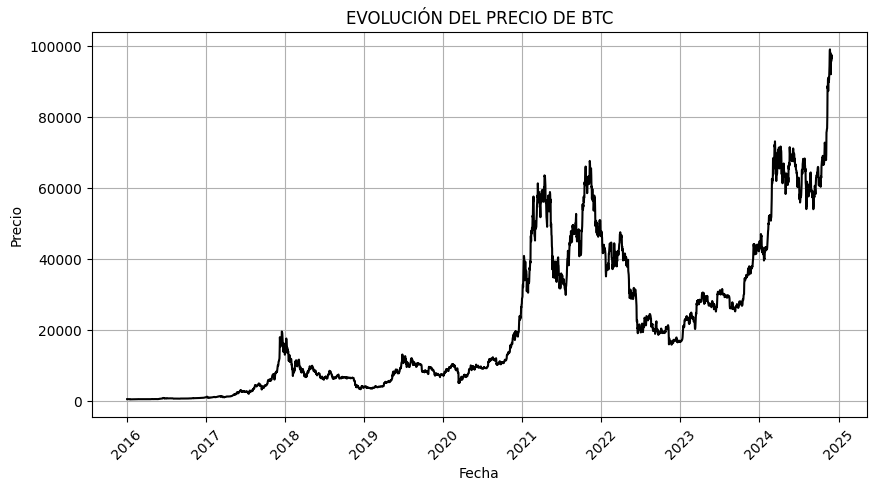

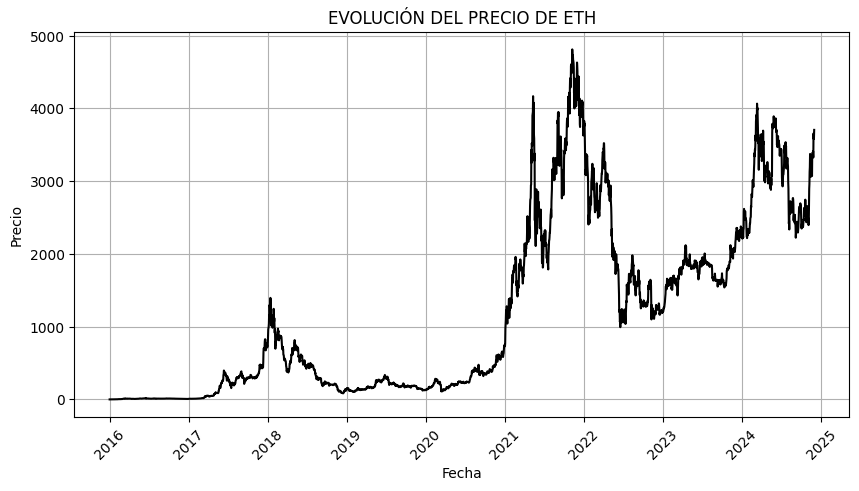

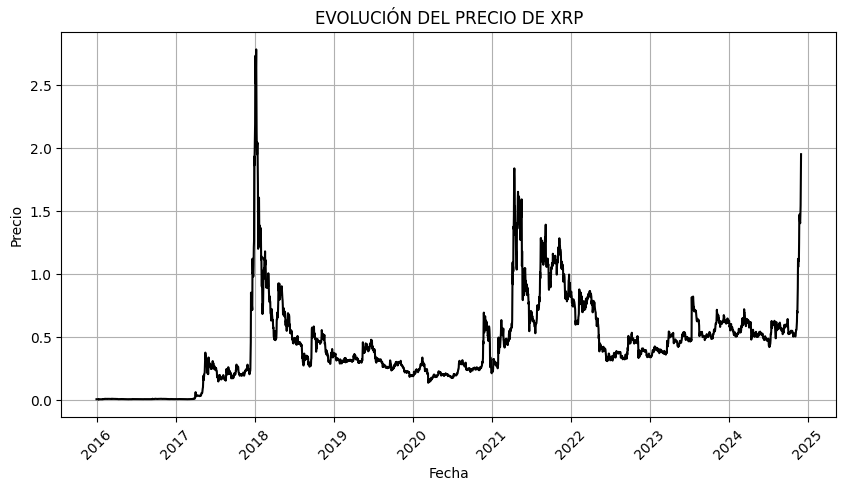

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


archivo = "DatosTFG.xlsx"
df = pd.read_excel(archivo)


df['fecha'] = pd.to_datetime(df['fecha'])


cripto_nombres = {
    'precio_btc': 'BTC',
    'precio_eth': 'ETH',
    'precio_xrp': 'XRP'
}


for columna, nombre in cripto_nombres.items():
    plt.figure(figsize=(10, 5))
    plt.plot(df['fecha'], df[columna], color='black', linestyle='-')
    plt.xlabel("Fecha")
    plt.ylabel("Precio")
    plt.title(f"EVOLUCIÓN DEL PRECIO DE {nombre}")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()



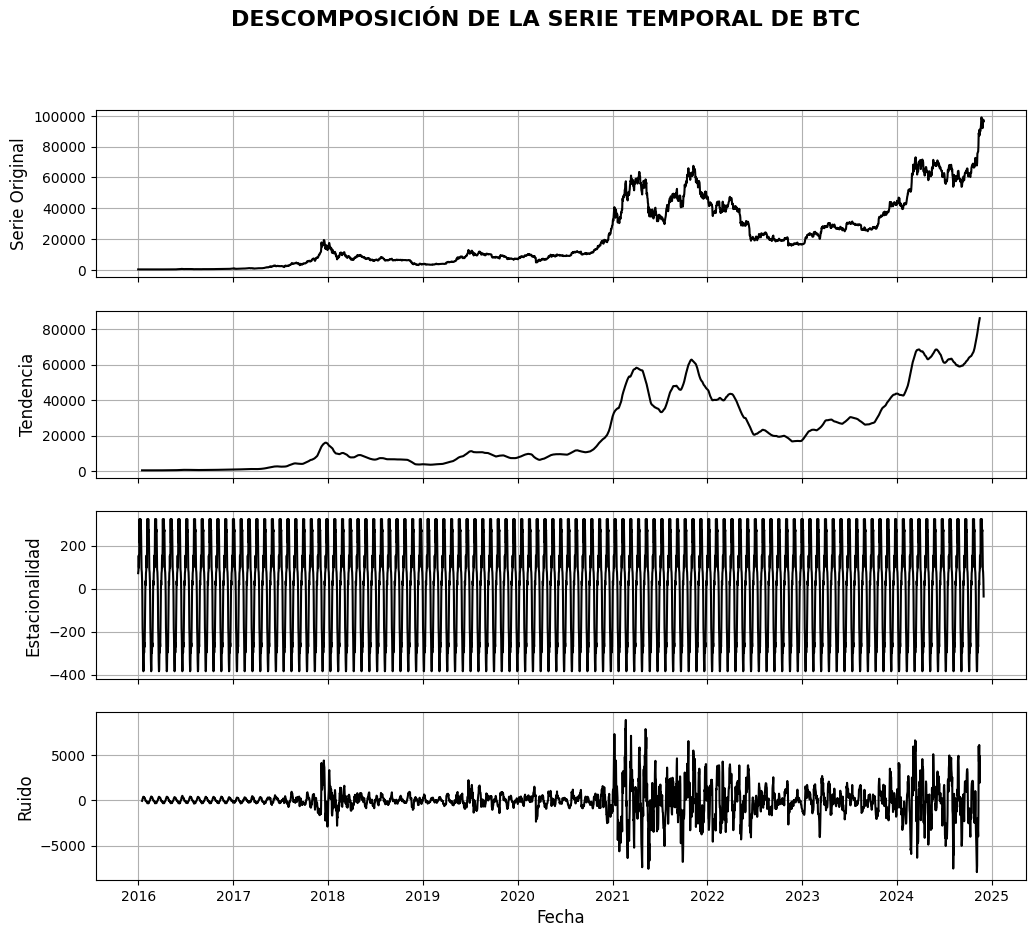

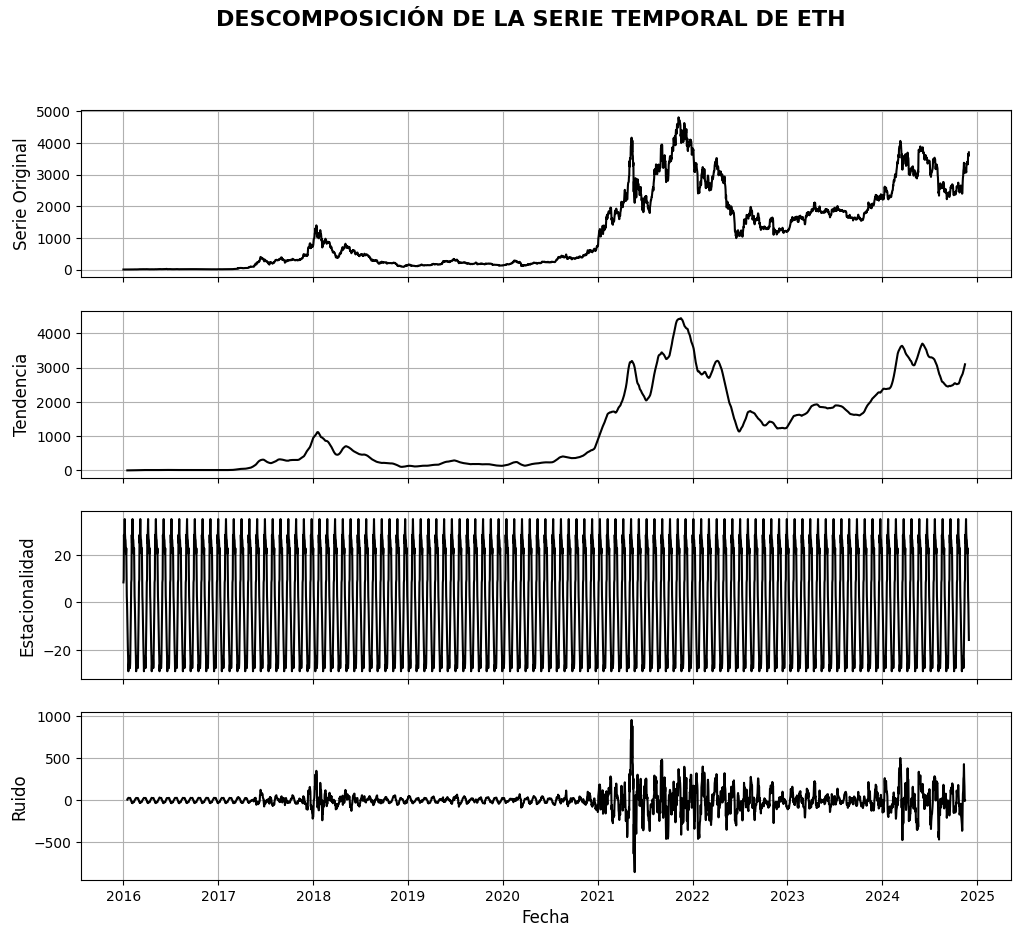

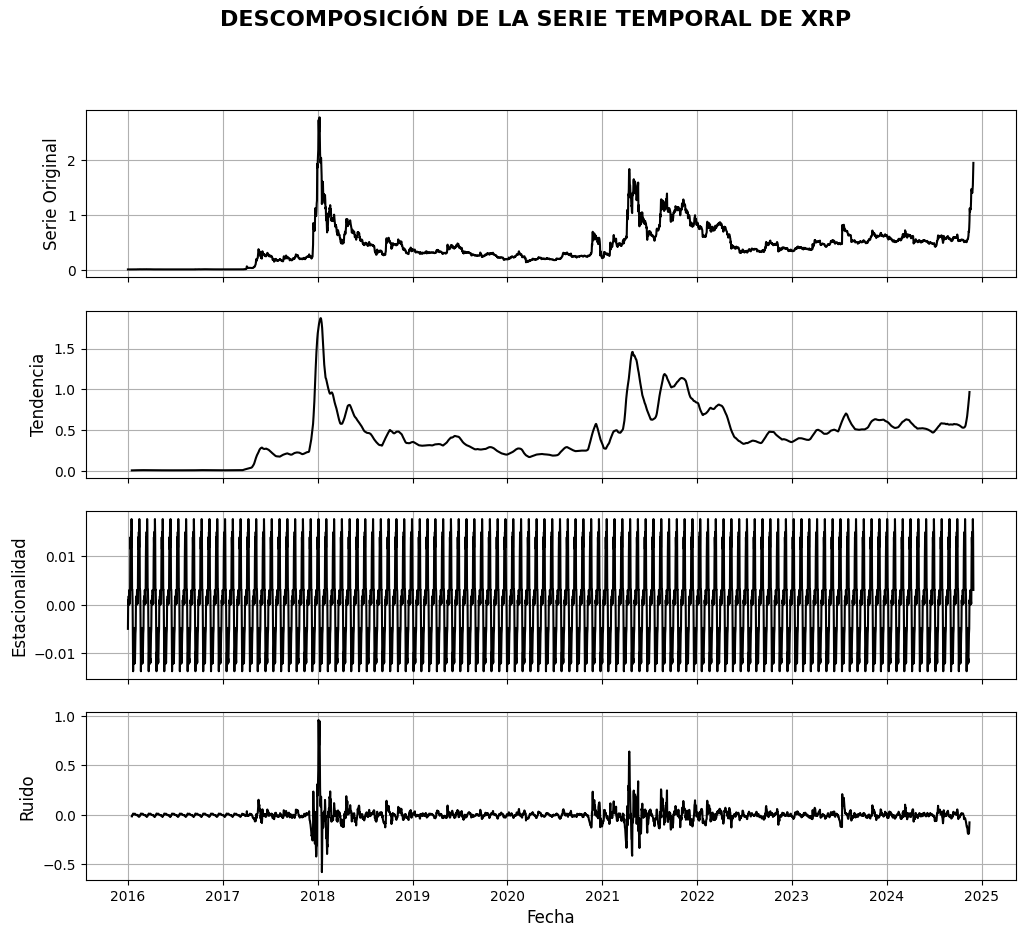

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


archivo = "DatosTFG.xlsx"
df = pd.read_excel(archivo)


df['fecha'] = pd.to_datetime(df['fecha'])
df.set_index('fecha', inplace=True)


series = {'precio_btc': 'BTC', 'precio_eth': 'ETH', 'precio_xrp': 'XRP'}


for serie, nombre in series.items():

    descomposicion = seasonal_decompose(df[serie].dropna(), model='additive', period=30)


    fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)


    fig.suptitle(f"DESCOMPOSICIÓN DE LA SERIE TEMPORAL DE {nombre}", fontsize=16, fontweight="bold")


    axes[0].plot(df[serie], color="black")
    axes[0].set_ylabel("Serie Original", fontsize=12)
    axes[0].grid()


    axes[1].plot(descomposicion.trend, color="black")
    axes[1].set_ylabel("Tendencia", fontsize=12)
    axes[1].grid()


    axes[2].plot(descomposicion.seasonal, color="black")
    axes[2].set_ylabel("Estacionalidad", fontsize=12)
    axes[2].grid()


    axes[3].plot(descomposicion.resid, color="black")
    axes[3].set_ylabel("Ruido", fontsize=12)
    axes[3].grid()

    plt.xlabel("Fecha", fontsize=12)
    plt.show()


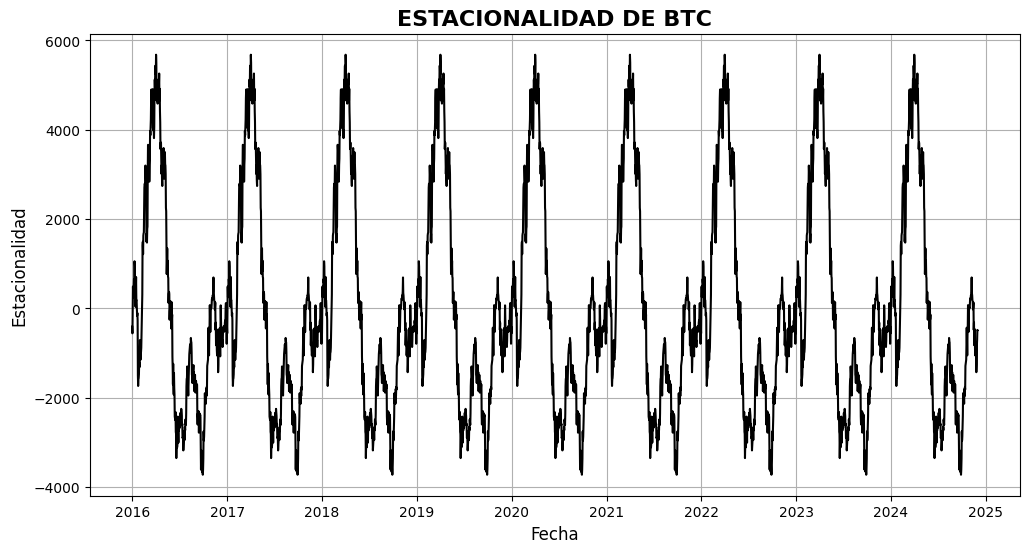

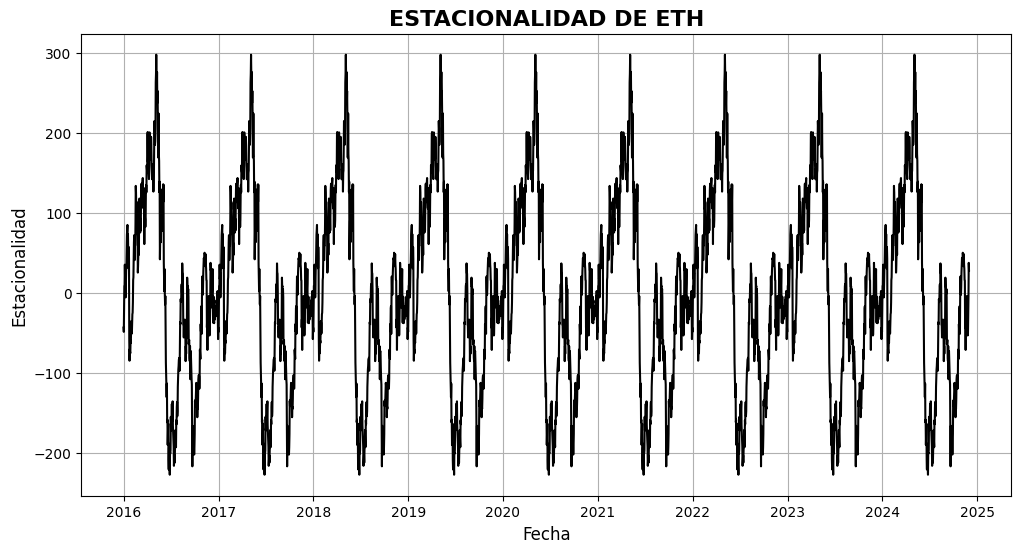

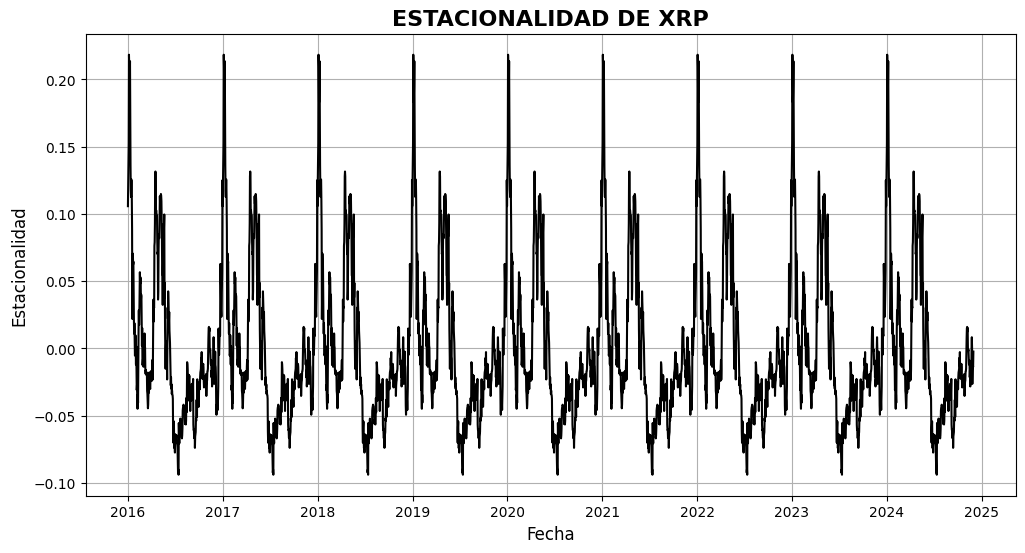

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


archivo = "DatosTFG.xlsx"
df = pd.read_excel(archivo)


df['fecha'] = pd.to_datetime(df['fecha'])
df.set_index('fecha', inplace=True)


series = {'precio_btc': 'BTC', 'precio_eth': 'ETH', 'precio_xrp': 'XRP'}


periodo_estacionalidad = 365


for serie, nombre in series.items():

    descomposicion = seasonal_decompose(df[serie].dropna(), model='additive', period=periodo_estacionalidad)


    plt.figure(figsize=(12, 6))
    plt.plot(descomposicion.seasonal, color="black")
    plt.title(f"ESTACIONALIDAD DE {nombre}", fontsize=16, fontweight="bold")
    plt.xlabel("Fecha", fontsize=12)
    plt.ylabel("Estacionalidad", fontsize=12)
    plt.grid()
    plt.show()


In [ ]:
import pandas as pd
from scipy.stats import kruskal


archivo = "DatosTFG.xlsx"
df = pd.read_excel(archivo)


df['fecha'] = pd.to_datetime(df['fecha'])
df.set_index('fecha', inplace=True)


precios = ['precio_btc', 'precio_eth', 'precio_xrp']


resultados_kruskal = {}

for precio in precios:

    df['mes'] = df.index.month


    grupos = [df[df['mes'] == mes][precio].dropna() for mes in range(1, 13)]


    test_kw = kruskal(*grupos)


    resultados_kruskal[precio] = {
        "Estadístico": test_kw.statistic,
        "p-valor": test_kw.pvalue
    }


for precio, resultado in resultados_kruskal.items():
    print(f"\n📌 Test de Kruskal-Wallis para {precio.upper()}:")
    print(f"   ➡️ Estadístico: {resultado['Estadístico']:.4f}")
    print(f"   ➡️ p-valor: {resultado['p-valor']:.4f}")

    if resultado["p-valor"] < 0.05:
        print("   ❌ Hay diferencias significativas → Posible estacionalidad en la serie.")
    else:
        print("   ✅ No hay diferencias significativas → No hay evidencia clara de estacionalidad.")



📌 Test de Kruskal-Wallis para PRECIO_BTC:
   ➡️ Estadístico: 12.9849
   ➡️ p-valor: 0.2943
   ✅ No hay diferencias significativas → No hay evidencia clara de estacionalidad.

📌 Test de Kruskal-Wallis para PRECIO_ETH:
   ➡️ Estadístico: 31.0166
   ➡️ p-valor: 0.0011
   ❌ Hay diferencias significativas → Posible estacionalidad en la serie.

📌 Test de Kruskal-Wallis para PRECIO_XRP:
   ➡️ Estadístico: 24.9358
   ➡️ p-valor: 0.0093
   ❌ Hay diferencias significativas → Posible estacionalidad en la serie.


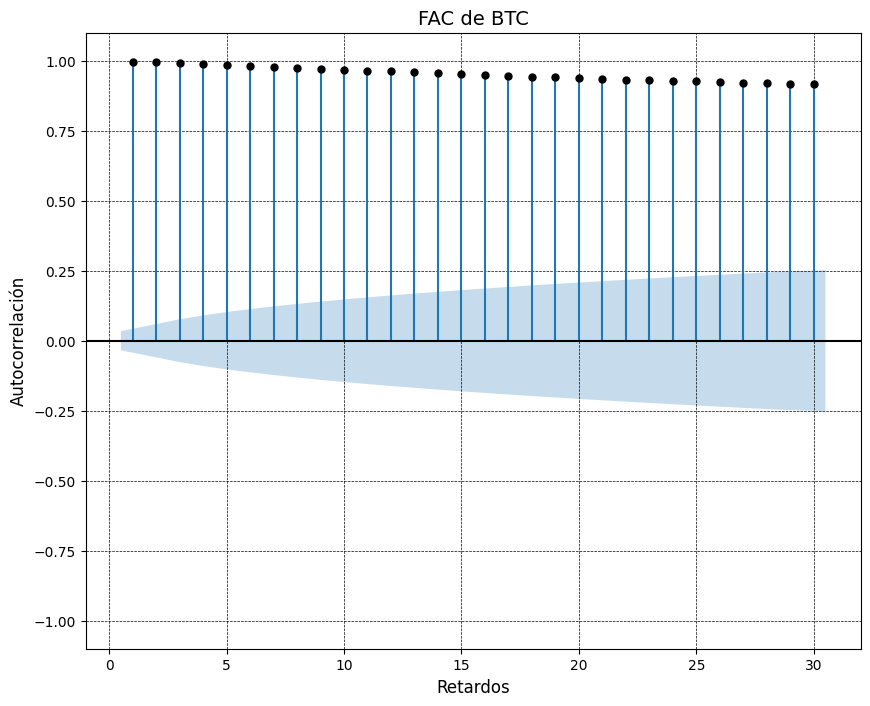

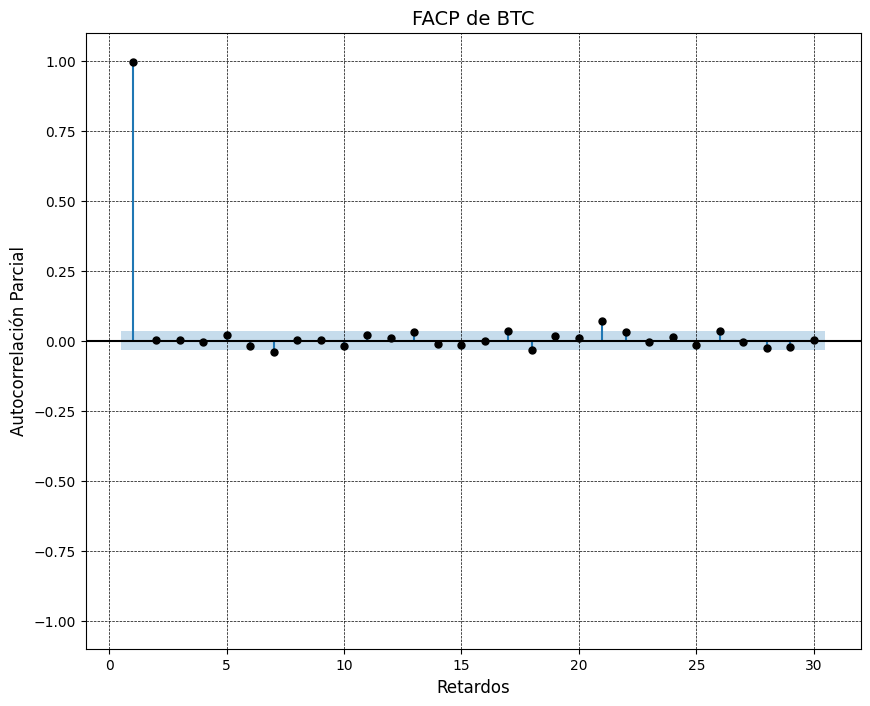

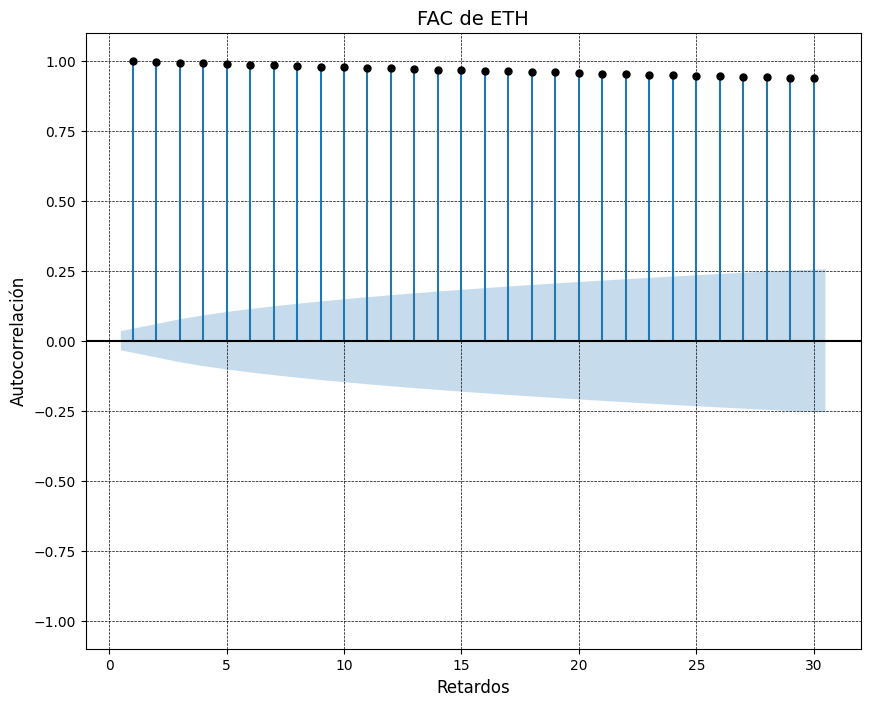

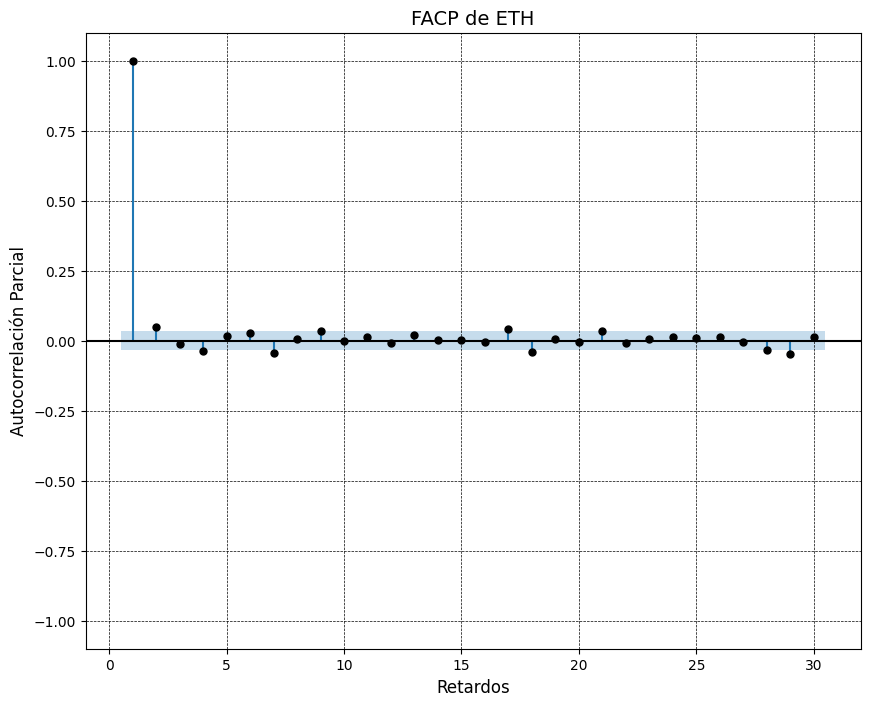

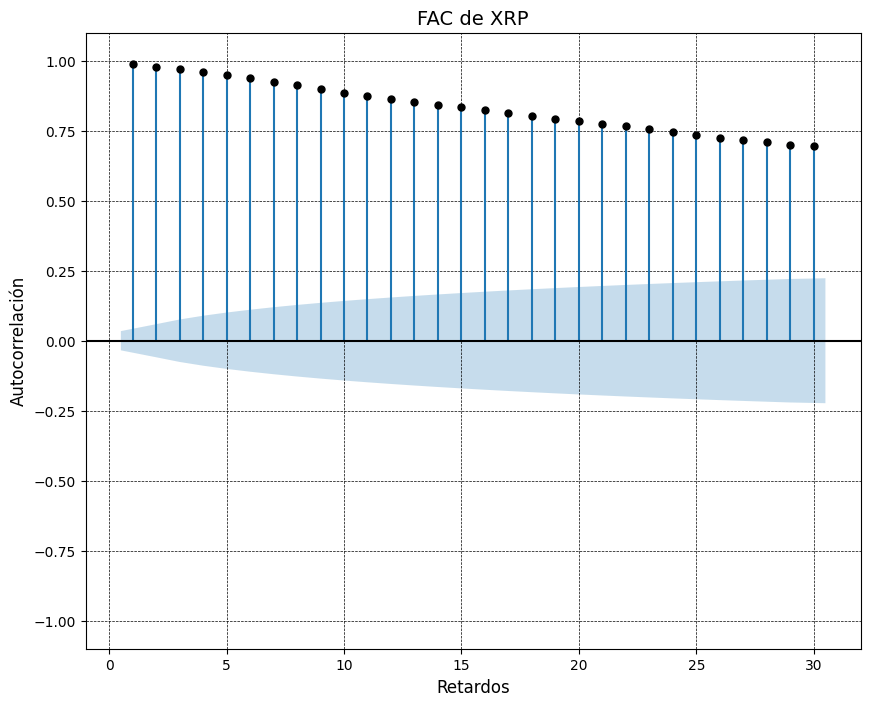

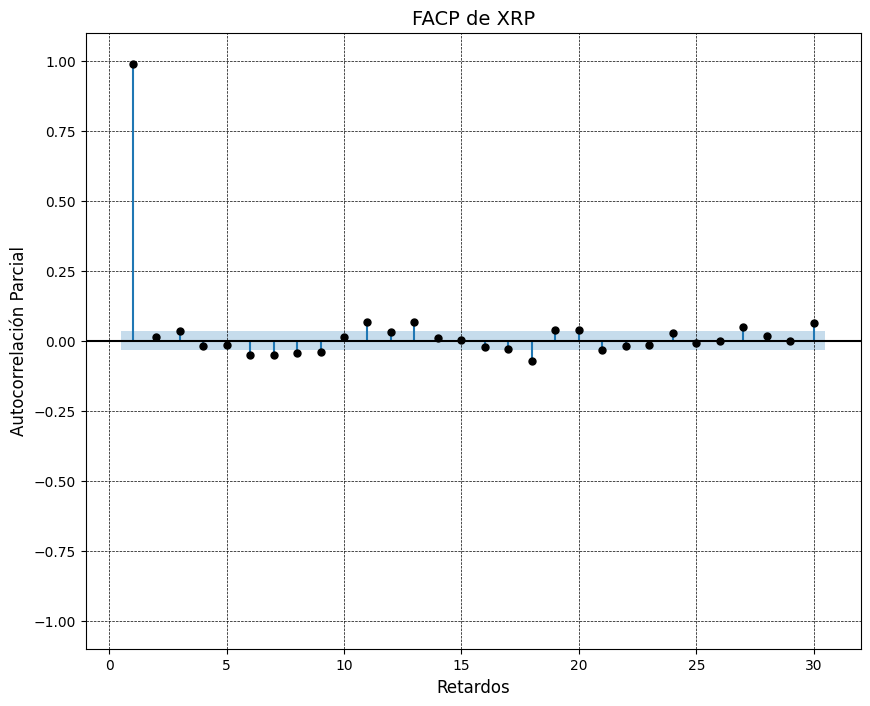

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


archivo = "DatosTFG.xlsx"
df = pd.read_excel(archivo)


df['fecha'] = pd.to_datetime(df['fecha'])


cripto_nombres = {
    'precio_btc': 'BTC',
    'precio_eth': 'ETH',
    'precio_xrp': 'XRP'
}


for columna, nombre in cripto_nombres.items():
    serie = df[columna].dropna()


    fig, ax = plt.subplots(figsize=(10, 8))
    acf_plot = plot_acf(serie, lags=30, ax=ax, zero=False, alpha=0.05)


    for line in ax.lines:
        line.set_color("black")

    for patch in ax.patches:
        patch.set_facecolor("black")

    ax.set_ylim(-1.1, 1.1)
    ax.set_title(f"FAC de {nombre}", fontsize=14)
    ax.set_xlabel("Retardos", fontsize=12)
    ax.set_ylabel("Autocorrelación", fontsize=12)
    ax.grid(True, color="black", linestyle="--", linewidth=0.5)
    plt.show()


    fig, ax = plt.subplots(figsize=(10, 8))
    pacf_plot = plot_pacf(serie, lags=30, ax=ax, method='ywm', zero=False, alpha=0.05)


    for line in ax.lines:
        line.set_color("black")

    for patch in ax.patches:
        patch.set_facecolor("black")

    ax.set_ylim(-1.1, 1.1)
    ax.set_title(f"FACP de {nombre}", fontsize=14)
    ax.set_xlabel("Retardos", fontsize=12)
    ax.set_ylabel("Autocorrelación Parcial", fontsize=12)
    ax.grid(True, color="black", linestyle="--", linewidth=0.5)
    plt.show()


In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller


archivo = "DatosTFG.xlsx"
df = pd.read_excel(archivo)


df['fecha'] = pd.to_datetime(df['fecha'])


cripto_nombres = {
    'precio_btc': 'BTC',
    'precio_eth': 'ETH',
    'precio_xrp': 'XRP'
}


resultados_adf = {}

for columna, nombre in cripto_nombres.items():
    serie = df[columna].dropna()


    adf_test = adfuller(serie)


    resultados_adf[nombre] = {
        "Estadístico ADF": adf_test[0],
        "p-valor": adf_test[1],
        "Lags utilizados": adf_test[2],
        "Número de observaciones": adf_test[3],
        "Valores críticos": adf_test[4]
    }


for nombre, resultado in resultados_adf.items():
    print(f"\n🔹 Test de Dickey-Fuller para {nombre}:")
    print(f"   ➡️ Estadístico ADF: {resultado['Estadístico ADF']:.4f}")
    print(f"   ➡️ p-valor: {resultado['p-valor']:.4f}")
    print(f"   ➡️ Lags utilizados: {resultado['Lags utilizados']}")
    print(f"   ➡️ Número de observaciones: {resultado['Número de observaciones']}")
    print(f"   ➡️ Valores críticos: {resultado['Valores críticos']}")


    if resultado["p-valor"] < 0.05:
        print(f"   ✅ La serie {nombre} es **ESTACIONARIA** (se rechaza H0).")
    else:
        print(f"   ❌ La serie {nombre} **NO es estacionaria** (no se puede rechazar H0).")



🔹 Test de Dickey-Fuller para BTC:
   ➡️ Estadístico ADF: 0.2949
   ➡️ p-valor: 0.9771
   ➡️ Lags utilizados: 28
   ➡️ Número de observaciones: 3228
   ➡️ Valores críticos: {'1%': -3.4323774187568326, '5%': -2.8624357916637844, '10%': -2.5672468495037997}
   ❌ La serie BTC **NO es estacionaria** (no se puede rechazar H0).

🔹 Test de Dickey-Fuller para ETH:
   ➡️ Estadístico ADF: -1.2378
   ➡️ p-valor: 0.6571
   ➡️ Lags utilizados: 28
   ➡️ Número de observaciones: 3228
   ➡️ Valores críticos: {'1%': -3.4323774187568326, '5%': -2.8624357916637844, '10%': -2.5672468495037997}
   ❌ La serie ETH **NO es estacionaria** (no se puede rechazar H0).

🔹 Test de Dickey-Fuller para XRP:
   ➡️ Estadístico ADF: -2.8607
   ➡️ p-valor: 0.0501
   ➡️ Lags utilizados: 29
   ➡️ Número de observaciones: 3227
   ➡️ Valores críticos: {'1%': -3.432378047525015, '5%': -2.862436069383185, '10%': -2.5672469973560355}
   ❌ La serie XRP **NO es estacionaria** (no se puede rechazar H0).


In [ ]:
!pip install arch

import pandas as pd
from arch.unitroot import PhillipsPerron


archivo = "DatosTFG.xlsx"
df = pd.read_excel(archivo)


df['fecha'] = pd.to_datetime(df['fecha'])


cripto_nombres = {
    'precio_btc': 'BTC',
    'precio_eth': 'ETH',
    'precio_xrp': 'XRP'
}


resultados_pp = {}

for columna, nombre in cripto_nombres.items():
    serie = df[columna].dropna()


    pp_test = PhillipsPerron(serie)


    resultados_pp[nombre] = {
        "Estadístico PP": pp_test.stat,
        "p-valor": pp_test.pvalue,
        "Valores críticos": pp_test.critical_values
    }


for nombre, resultado in resultados_pp.items():
    print(f"\n🔹 Test de Phillips-Perron para {nombre}:")
    print(f"   ➡️ Estadístico PP: {resultado['Estadístico PP']:.4f}")
    print(f"   ➡️ p-valor: {resultado['p-valor']:.4f}")
    print(f"   ➡️ Valores críticos: {resultado['Valores críticos']}")


    if resultado["p-valor"] < 0.05:
        print(f"   ✅ La serie {nombre} es **ESTACIONARIA** (se rechaza H0).")
    else:
        print(f"   ❌ La serie {nombre} **NO es estacionaria** (no se puede rechazar H0).")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 19.4 MB/s eta 0:00:00

🔹 Test de Phillips-Perron para BTC:
   ➡️ Estadístico PP: 0.6622
   ➡️ p-valor: 0.9891
   ➡️ Valores críticos: {'1%': -3.432359970177518, '5%': -2.862428084811229, '10%': -2.5672427465340872}
   ❌ La serie BTC **NO es estacionaria** (no se puede rechazar H0).

🔹 Test de Phillips-Perron para ETH:
   ➡️ Estadístico PP: -1.0940
   ➡️ p-valor: 0.7174
   ➡️ Valores críticos: {'1%': -3.432359970177518, '5%': -2.862428084811229, '10%': -2.5672427465340872}
   ❌ La serie ETH **NO es estacionaria** (no se puede rechazar H0).

🔹 Test de Phillips-Perron para XRP:
   ➡️ Estadístico PP: -3.1854
   ➡️ p-valor: 0.0208
   ➡️ Valores críticos: {'1%': -3.432359970177518, '5%': -2.862428084811229, '10%': -2.5672427465340872}
   ✅ La serie XRP es **ESTACIONARIA** (se rechaza H0).


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller


archivo = "DatosTFG.xlsx"
df = pd.read_excel(archivo)


df['fecha'] = pd.to_datetime(df['fecha'])
df.set_index('fecha', inplace=True)


df['precio_btc_log'] = np.log(df['precio_btc'])


df.dropna(subset=['precio_btc_log'], inplace=True)


adf_test_btc_log = adfuller(df['precio_btc_log'])


resultado_btc_log = {
    "Estadístico ADF": adf_test_btc_log[0],
    "p-valor": adf_test_btc_log[1],
    "Valores críticos": adf_test_btc_log[4]
}


print("\n📌 Test de Dickey-Fuller para la serie con logaritmo de BTC:")
print(f"   ➡️ Estadístico ADF: {resultado_btc_log['Estadístico ADF']:.4f}")
print(f"   ➡️ p-valor: {resultado_btc_log['p-valor']:.4f}")
print(f"   ➡️ Valores críticos: {resultado_btc_log['Valores críticos']}")

if resultado_btc_log["p-valor"] < 0.05:
    print(f"   ✅ La serie con logaritmo de BTC es **ESTACIONARIA** (se rechaza H0).")
else:
    print(f"   ❌ La serie con logaritmo de BTC **NO es estacionaria** (no se puede rechazar H0).")



📌 Test de Dickey-Fuller para la serie con logaritmo de BTC:
   ➡️ Estadístico ADF: -1.5665
   ➡️ p-valor: 0.5004
   ➡️ Valores críticos: {'1%': -3.4323612065383737, '5%': -2.8624286309001996, '10%': -2.5672430372603676}
   ❌ La serie con logaritmo de BTC **NO es estacionaria** (no se puede rechazar H0).


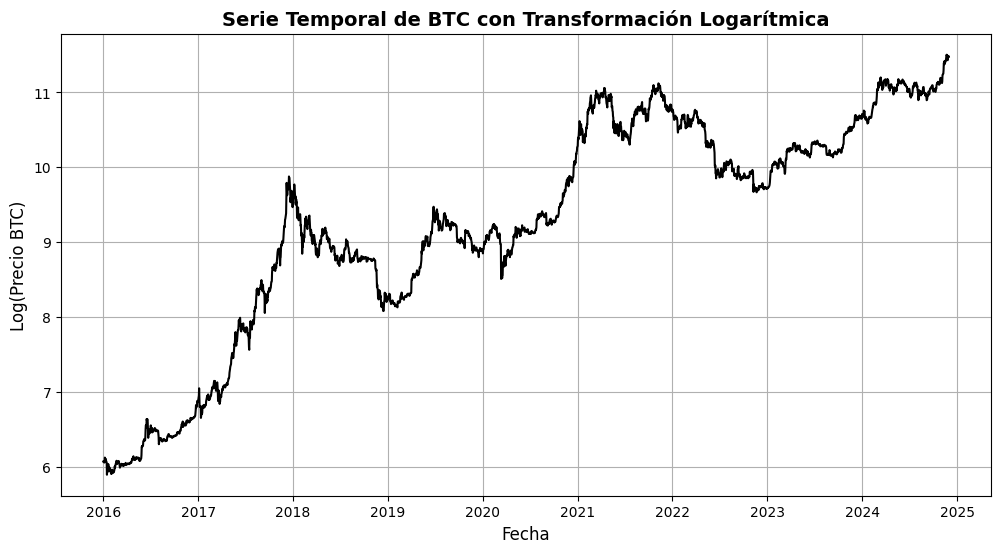

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


archivo = "DatosTFG.xlsx"
df = pd.read_excel(archivo)


df['fecha'] = pd.to_datetime(df['fecha'])
df.set_index('fecha', inplace=True)


df['precio_btc_log'] = np.log(df['precio_btc'])


df.dropna(subset=['precio_btc_log'], inplace=True)


plt.figure(figsize=(12, 6))
plt.plot(df['precio_btc_log'], color="black")
plt.title("Serie Temporal de BTC con Transformación Logarítmica", fontsize=14, fontweight="bold")
plt.xlabel("Fecha", fontsize=12)
plt.ylabel("Log(Precio BTC)", fontsize=12)
plt.grid()
plt.show()



📌 Test de Dickey-Fuller para la serie logarítmica diferenciada de BTC:
   ➡️ Estadístico ADF: -39.5302
   ➡️ p-valor: 0.0000
   ➡️ Valores críticos: {'1%': -3.4323612065383737, '5%': -2.8624286309001996, '10%': -2.5672430372603676}
   ✅ La serie logarítmica diferenciada de BTC es **ESTACIONARIA** (se rechaza H0).


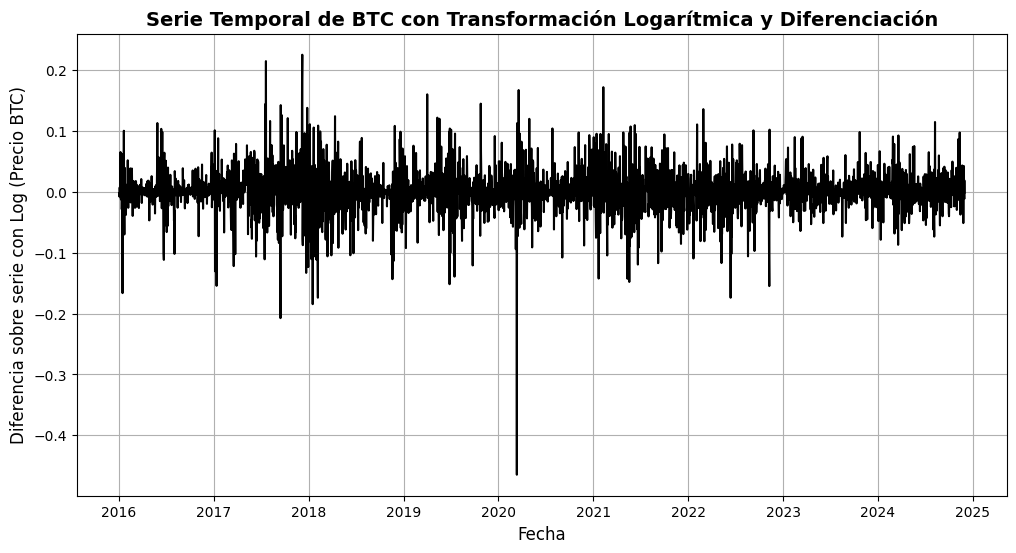

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller


archivo = "DatosTFG.xlsx"
df = pd.read_excel(archivo)


df['fecha'] = pd.to_datetime(df['fecha'])
df.set_index('fecha', inplace=True)


df['precio_btc_log'] = np.log(df['precio_btc'])


df['precio_btc_log_diff'] = df['precio_btc_log'].diff()


df.dropna(subset=['precio_btc_log_diff'], inplace=True)


adf_test_btc_log_diff = adfuller(df['precio_btc_log_diff'])


resultado_btc_log_diff = {
    "Estadístico ADF": adf_test_btc_log_diff[0],
    "p-valor": adf_test_btc_log_diff[1],
    "Valores críticos": adf_test_btc_log_diff[4]
}


print("\n📌 Test de Dickey-Fuller para la serie logarítmica diferenciada de BTC:")
print(f"   ➡️ Estadístico ADF: {resultado_btc_log_diff['Estadístico ADF']:.4f}")
print(f"   ➡️ p-valor: {resultado_btc_log_diff['p-valor']:.4f}")
print(f"   ➡️ Valores críticos: {resultado_btc_log_diff['Valores críticos']}")

if resultado_btc_log_diff["p-valor"] < 0.05:
    print(f"   ✅ La serie logarítmica diferenciada de BTC es **ESTACIONARIA** (se rechaza H0).")
else:
    print(f"   ❌ La serie logarítmica diferenciada de BTC **NO es estacionaria** (no se puede rechazar H0).")


plt.figure(figsize=(12, 6))
plt.plot(df['precio_btc_log_diff'], color="black")
plt.title("Serie Temporal de BTC con Transformación Logarítmica y Diferenciación", fontsize=14, fontweight="bold")
plt.xlabel("Fecha", fontsize=12)
plt.ylabel("Diferencia sobre serie con Log (Precio BTC)", fontsize=12)
plt.grid()
plt.show()



📌 Test de Dickey-Fuller para la serie con logaritmo de ETH:
   ➡️ Estadístico ADF: -2.8036
   ➡️ p-valor: 0.0578
   ➡️ Valores críticos: {'1%': -3.4323717773390636, '5%': -2.862433299914277, '10%': -2.5672455229468047}
   ❌ La serie con logaritmo de ETH **NO es estacionaria** (no se puede rechazar H0).


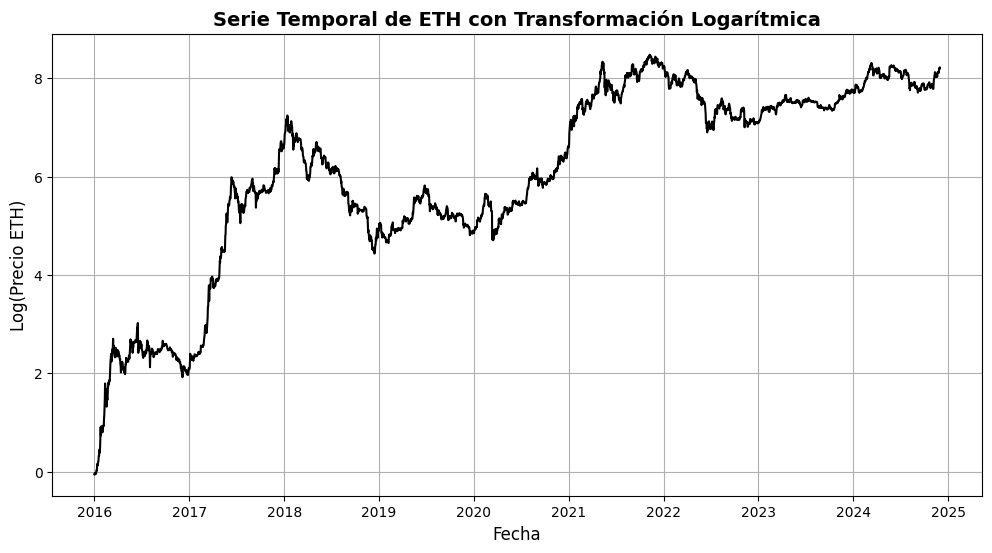

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller


archivo = "DatosTFG.xlsx"
df = pd.read_excel(archivo)


df['fecha'] = pd.to_datetime(df['fecha'])
df.set_index('fecha', inplace=True)


df['precio_eth_log'] = np.log(df['precio_eth'])


df.dropna(subset=['precio_eth_log'], inplace=True)


adf_test_eth_log = adfuller(df['precio_eth_log'])


resultado_eth_log = {
    "Estadístico ADF": adf_test_eth_log[0],
    "p-valor": adf_test_eth_log[1],
    "Valores críticos": adf_test_eth_log[4]
}


print("\n📌 Test de Dickey-Fuller para la serie con logaritmo de ETH:")
print(f"   ➡️ Estadístico ADF: {resultado_eth_log['Estadístico ADF']:.4f}")
print(f"   ➡️ p-valor: {resultado_eth_log['p-valor']:.4f}")
print(f"   ➡️ Valores críticos: {resultado_eth_log['Valores críticos']}")

if resultado_eth_log["p-valor"] < 0.05:
    print(f"   ✅ La serie con logaritmo de ETH es **ESTACIONARIA** (se rechaza H0).")
else:
    print(f"   ❌ La serie con logaritmo de ETH **NO es estacionaria** (no se puede rechazar H0).")


plt.figure(figsize=(12, 6))
plt.plot(df['precio_eth_log'], color="black")
plt.title("Serie Temporal de ETH con Transformación Logarítmica", fontsize=14, fontweight="bold")
plt.xlabel("Fecha", fontsize=12)
plt.ylabel("Log(Precio ETH)", fontsize=12)
plt.grid()
plt.show()



📌 Test de Dickey-Fuller para la serie logarítmica diferenciada de ETH:
   ➡️ Estadístico ADF: -10.7676
   ➡️ p-valor: 0.0000
   ➡️ Valores críticos: {'1%': np.float64(-3.4323717773390636), '5%': np.float64(-2.862433299914277), '10%': np.float64(-2.5672455229468047)}
   ✅ La serie logarítmica diferenciada de ETH es **ESTACIONARIA** (se rechaza H0).


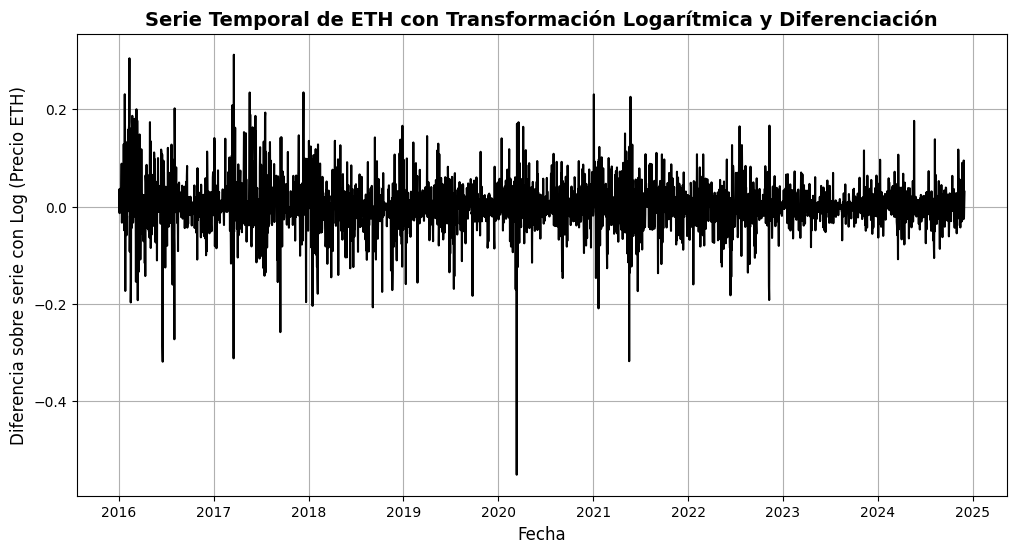

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller


archivo = "DatosTFG.xlsx"
df = pd.read_excel(archivo)


df['fecha'] = pd.to_datetime(df['fecha'])
df.set_index('fecha', inplace=True)


df['precio_eth_log'] = np.log(df['precio_eth'])


df['precio_eth_log_diff'] = df['precio_eth_log'].diff()


df.dropna(subset=['precio_eth_log_diff'], inplace=True)


adf_test_eth_log_diff = adfuller(df['precio_eth_log_diff'])


resultado_eth_log_diff = {
    "Estadístico ADF": adf_test_eth_log_diff[0],
    "p-valor": adf_test_eth_log_diff[1],
    "Valores críticos": adf_test_eth_log_diff[4]
}


print("\n📌 Test de Dickey-Fuller para la serie logarítmica diferenciada de ETH:")
print(f"   ➡️ Estadístico ADF: {resultado_eth_log_diff['Estadístico ADF']:.4f}")
print(f"   ➡️ p-valor: {resultado_eth_log_diff['p-valor']:.4f}")
print(f"   ➡️ Valores críticos: {resultado_eth_log_diff['Valores críticos']}")

if resultado_eth_log_diff["p-valor"] < 0.05:
    print(f"   ✅ La serie logarítmica diferenciada de ETH es **ESTACIONARIA** (se rechaza H0).")
else:
    print(f"   ❌ La serie logarítmica diferenciada de ETH **NO es estacionaria** (no se puede rechazar H0).")


plt.figure(figsize=(12, 6))
plt.plot(df['precio_eth_log_diff'], color="black")
plt.title("Serie Temporal de ETH con Transformación Logarítmica y Diferenciación", fontsize=14, fontweight="bold")
plt.xlabel("Fecha", fontsize=12)
plt.ylabel("Diferencia sobre serie con Log (Precio ETH)", fontsize=12)
plt.grid()
plt.show()



📌 Test de Dickey-Fuller para la serie logarítmica de XRP:
   ➡️ Estadístico ADF: -2.2295
   ➡️ p-valor: 0.1957
   ➡️ Valores críticos: {'1%': -3.4323711524522436, '5%': -2.8624330239086477, '10%': -2.5672453760070444}
   ❌ La serie logarítmica de XRP **NO es estacionaria** (no se puede rechazar H0).


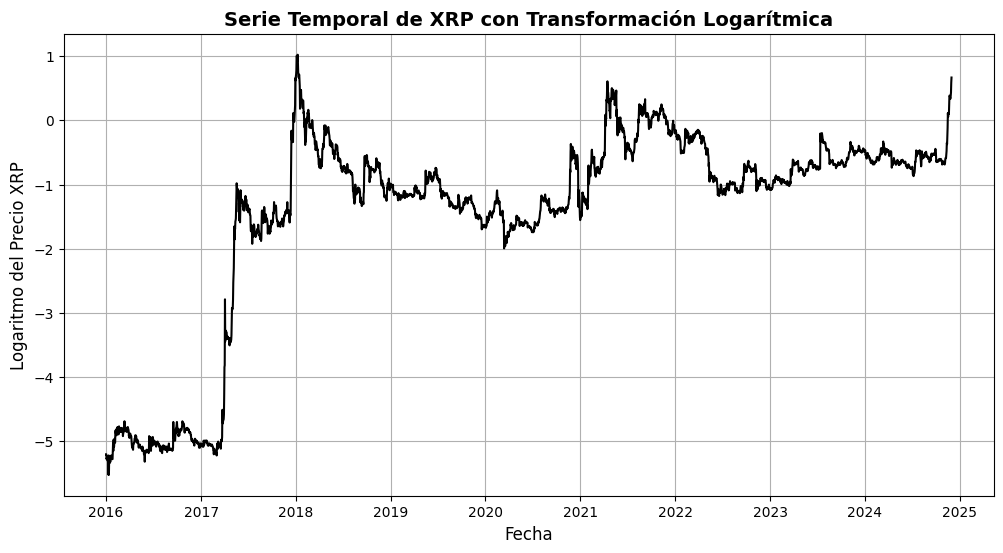

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller


archivo = "DatosTFG.xlsx"
df = pd.read_excel(archivo)


df['fecha'] = pd.to_datetime(df['fecha'])
df.set_index('fecha', inplace=True)


df['precio_xrp_log'] = np.log(df['precio_xrp'])


df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(subset=['precio_xrp_log'], inplace=True)


adf_test_xrp_log = adfuller(df['precio_xrp_log'])


resultado_xrp_log = {
    "Estadístico ADF": adf_test_xrp_log[0],
    "p-valor": adf_test_xrp_log[1],
    "Valores críticos": adf_test_xrp_log[4]
}


print("\n📌 Test de Dickey-Fuller para la serie logarítmica de XRP:")
print(f"   ➡️ Estadístico ADF: {resultado_xrp_log['Estadístico ADF']:.4f}")
print(f"   ➡️ p-valor: {resultado_xrp_log['p-valor']:.4f}")
print(f"   ➡️ Valores críticos: {resultado_xrp_log['Valores críticos']}")

if resultado_xrp_log["p-valor"] < 0.05:
    print(f"   ✅ La serie logarítmica de XRP es **ESTACIONARIA** (se rechaza H0).")
else:
    print(f"   ❌ La serie logarítmica de XRP **NO es estacionaria** (no se puede rechazar H0).")


plt.figure(figsize=(12, 6))
plt.plot(df['precio_xrp_log'], color="black")
plt.title("Serie Temporal de XRP con Transformación Logarítmica", fontsize=14, fontweight="bold")
plt.xlabel("Fecha", fontsize=12)
plt.ylabel("Logaritmo del Precio XRP", fontsize=12)
plt.grid()
plt.show()



📌 Test de Dickey-Fuller para la serie diferenciada de XRP:
   ➡️ Estadístico ADF: -10.0750
   ➡️ p-valor: 0.0000
   ➡️ Valores críticos: {'1%': np.float64(-3.432378676683321), '5%': np.float64(-2.8624363472748406), '10%': np.float64(-2.5672471452999863)}
   ✅ La serie diferenciada de XRP es **ESTACIONARIA** (se rechaza H0).


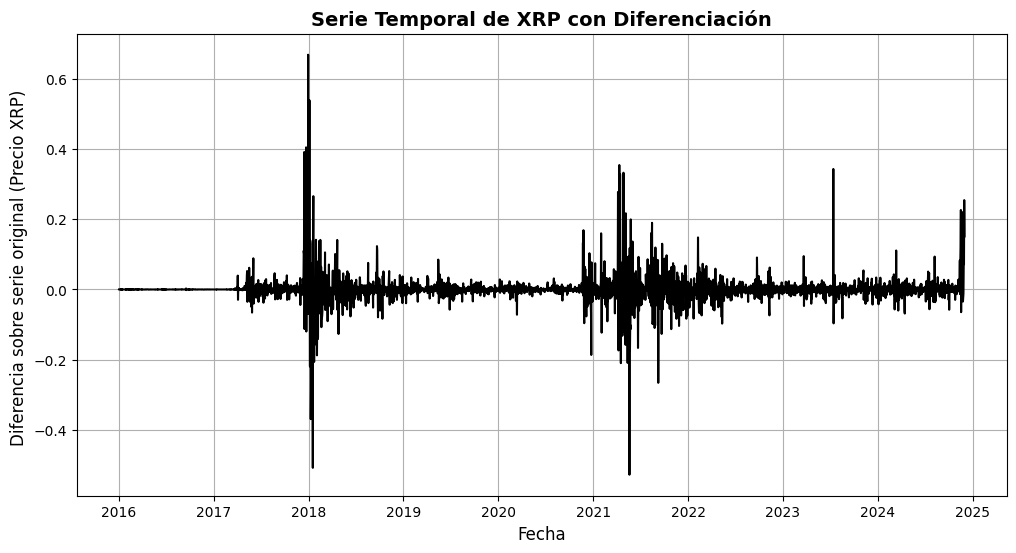

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller


archivo = "DatosTFG.xlsx"
df = pd.read_excel(archivo)


df['fecha'] = pd.to_datetime(df['fecha'])
df.set_index('fecha', inplace=True)


df['precio_xrp_diff'] = df['precio_xrp'].diff()


df.dropna(subset=['precio_xrp_diff'], inplace=True)


adf_test_xrp_diff = adfuller(df['precio_xrp_diff'])


resultado_xrp_diff = {
    "Estadístico ADF": adf_test_xrp_diff[0],
    "p-valor": adf_test_xrp_diff[1],
    "Valores críticos": adf_test_xrp_diff[4]
}


print("\n📌 Test de Dickey-Fuller para la serie diferenciada de XRP:")
print(f"   ➡️ Estadístico ADF: {resultado_xrp_diff['Estadístico ADF']:.4f}")
print(f"   ➡️ p-valor: {resultado_xrp_diff['p-valor']:.4f}")
print(f"   ➡️ Valores críticos: {resultado_xrp_diff['Valores críticos']}")

if resultado_xrp_diff["p-valor"] < 0.05:
    print(f"   ✅ La serie diferenciada de XRP es **ESTACIONARIA** (se rechaza H0).")
else:
    print(f"   ❌ La serie diferenciada de XRP **NO es estacionaria** (no se puede rechazar H0).")


plt.figure(figsize=(12, 6))
plt.plot(df['precio_xrp_diff'], color="black")
plt.title("Serie Temporal de XRP con Diferenciación", fontsize=14, fontweight="bold")
plt.xlabel("Fecha", fontsize=12)
plt.ylabel("Diferencia sobre serie original (Precio XRP) ", fontsize=12)
plt.grid()
plt.show()


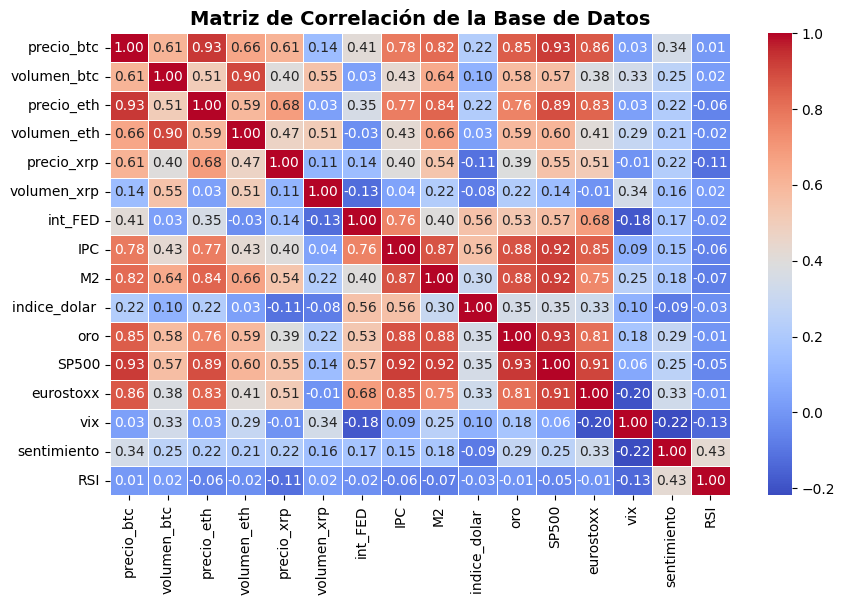

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


archivo = "DatosTFG.xlsx"
df = pd.read_excel(archivo)


df['fecha'] = pd.to_datetime(df['fecha'])
df.set_index('fecha', inplace=True)


correlacion = df.corr()


plt.figure(figsize=(10, 6))
sns.heatmap(correlacion, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación de la Base de Datos", fontsize=14, fontweight="bold")
plt.show()


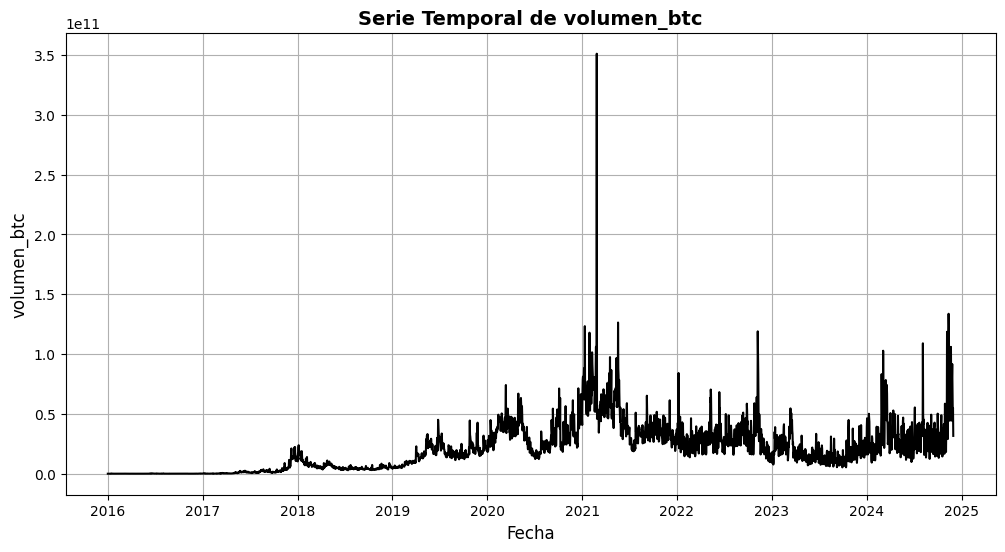

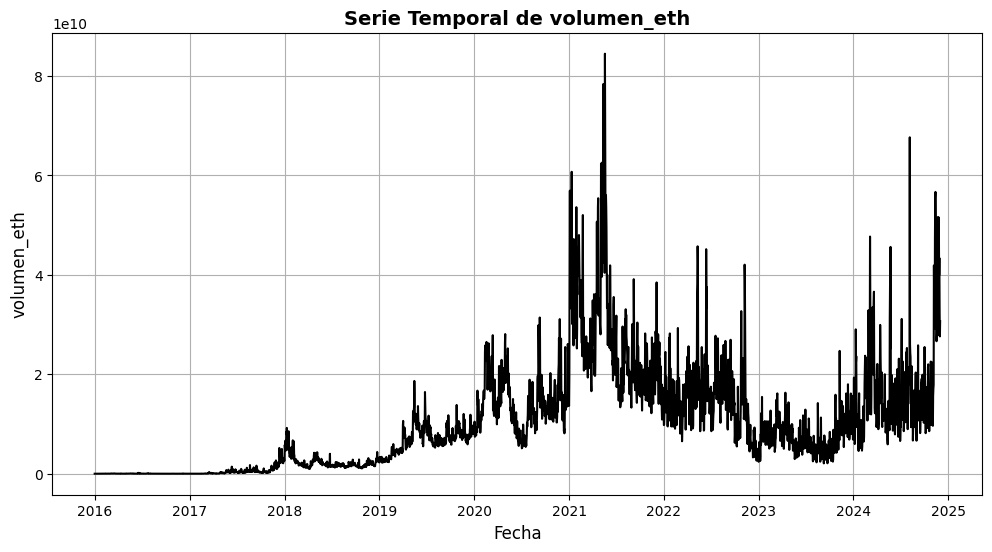

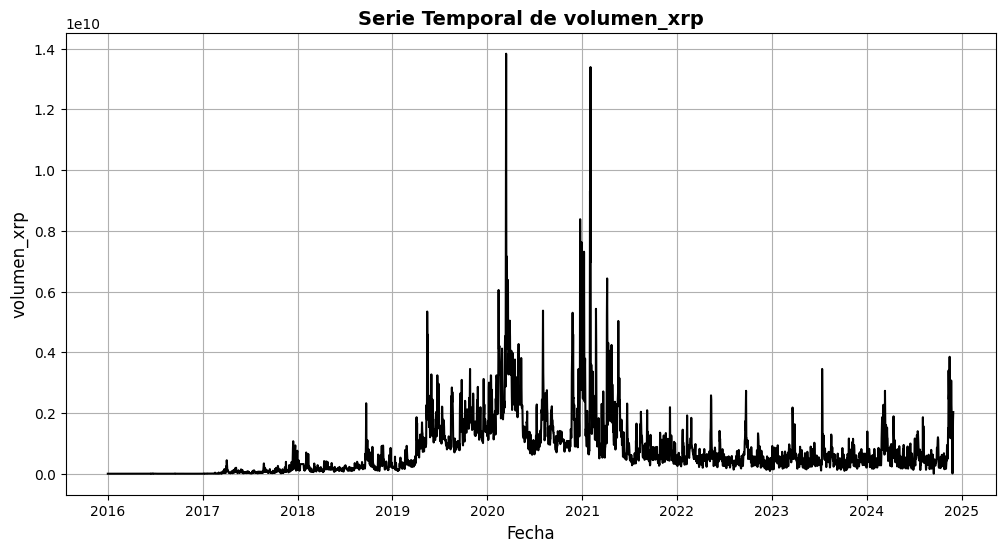

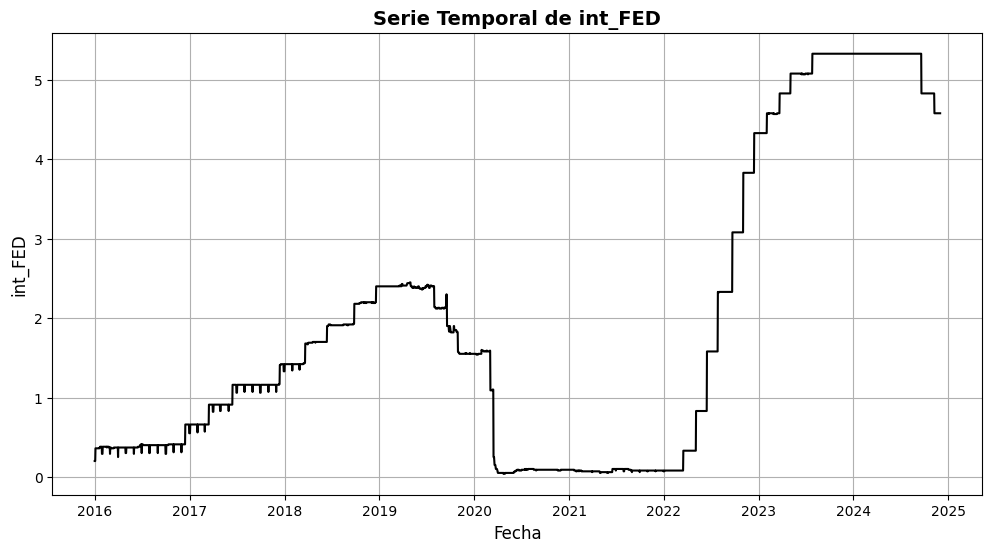

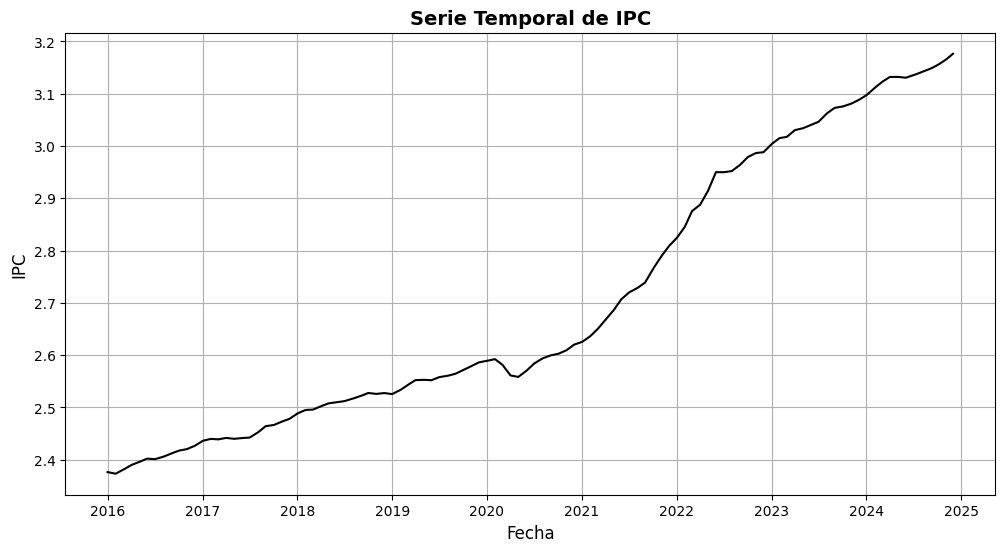

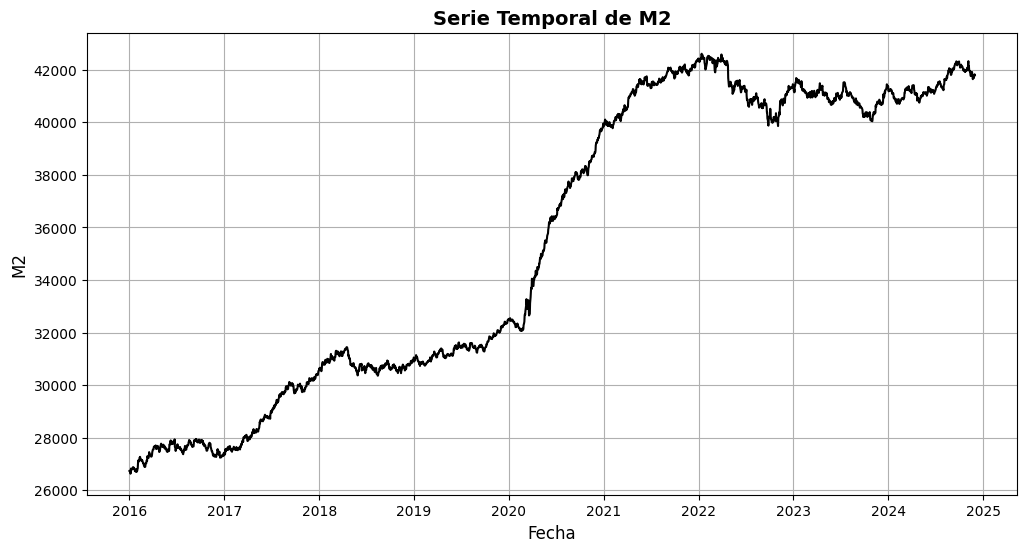

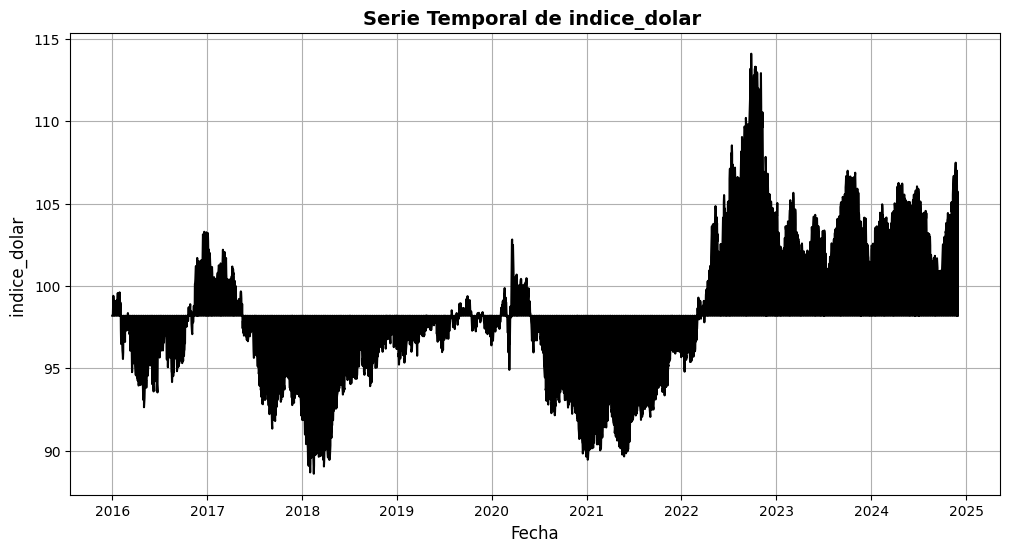

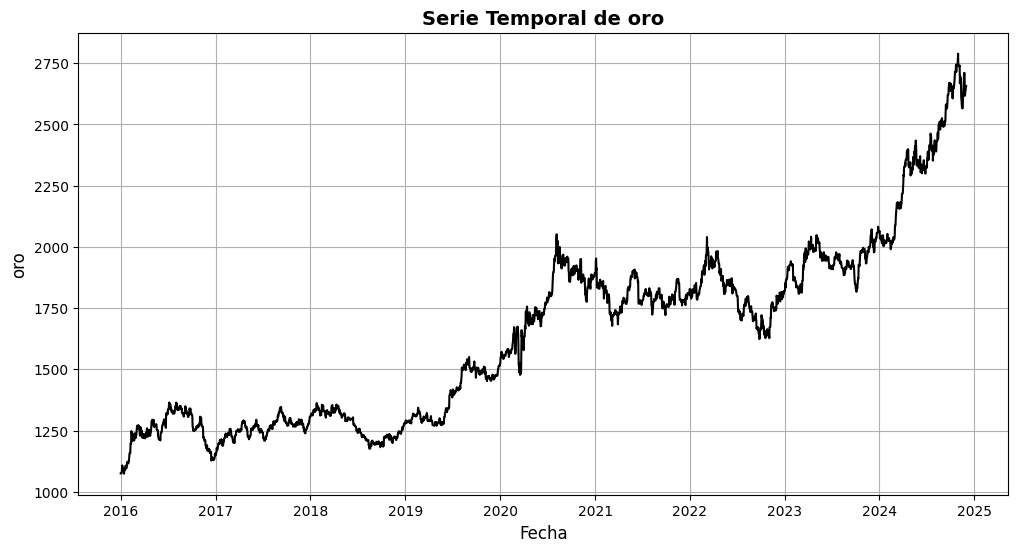

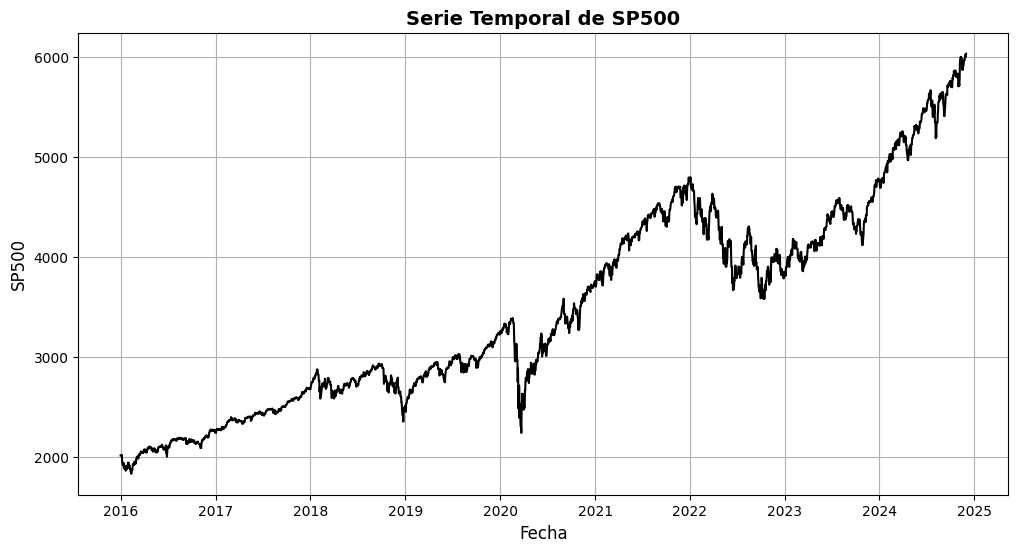

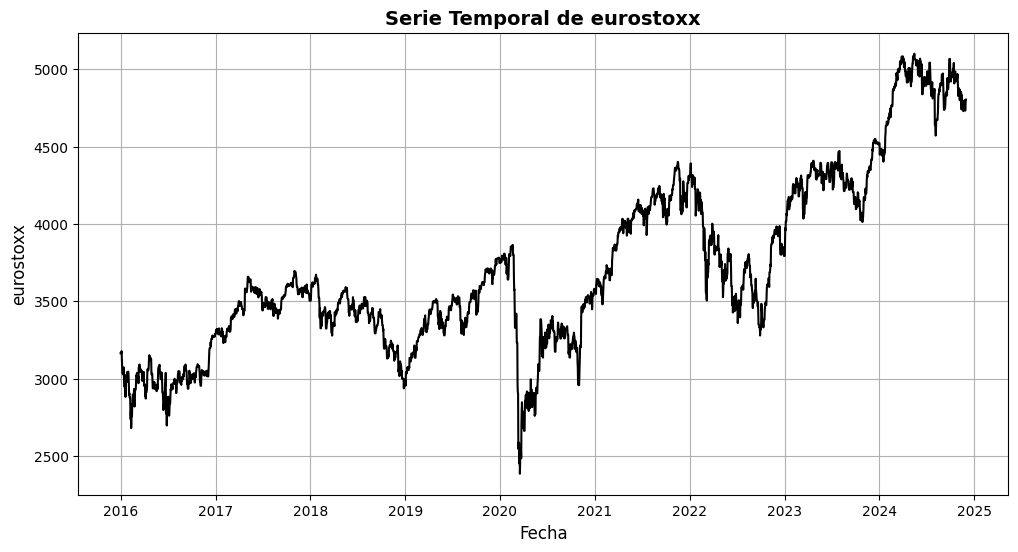

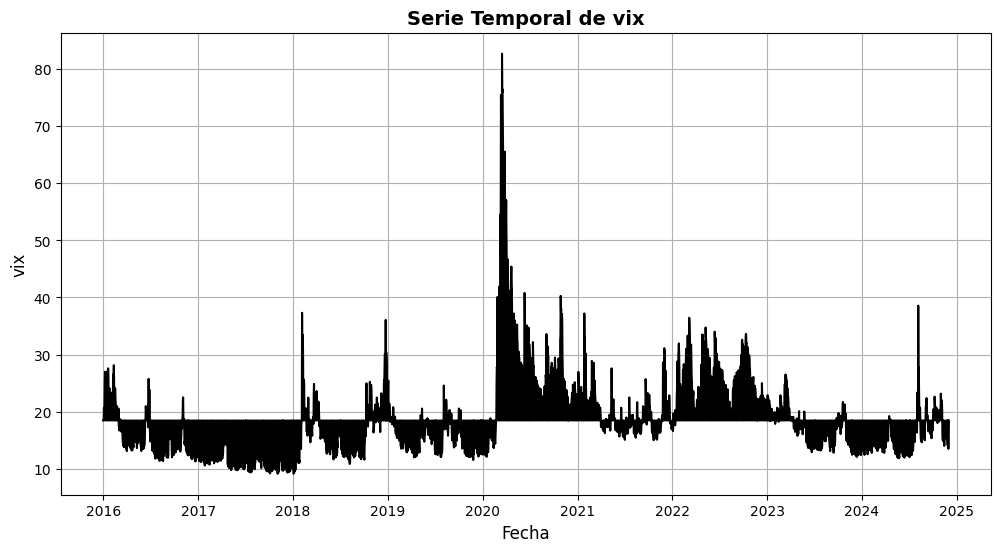

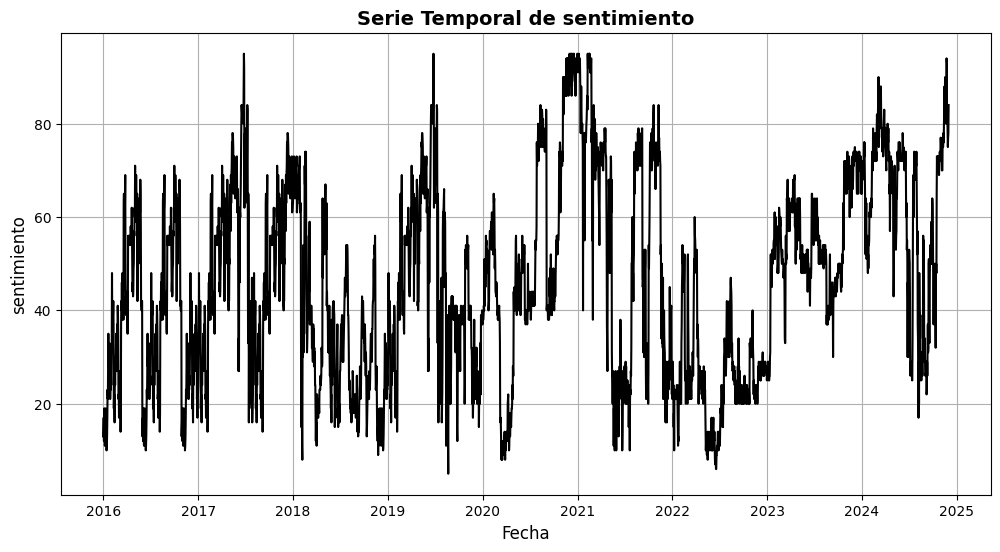

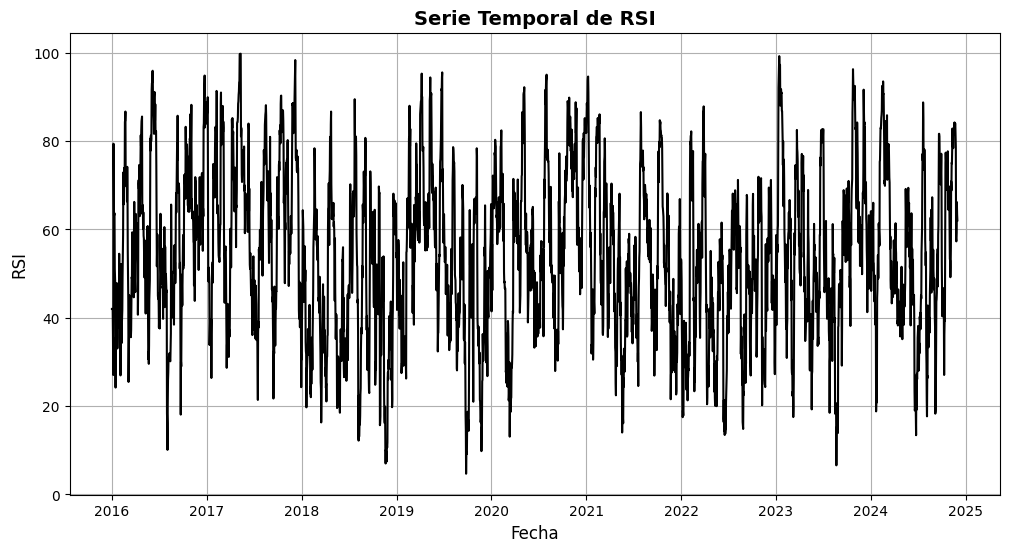

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


archivo = "DatosTFG.xlsx"
df = pd.read_excel(archivo)


df['fecha'] = pd.to_datetime(df['fecha'])
df.set_index('fecha', inplace=True)


variables_excluir = ['precio_btc', 'precio_eth', 'precio_xrp']
variables_graficar = [col for col in df.columns if col not in variables_excluir]


for variable in variables_graficar:
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df[variable], color="black")
    plt.title(f"Serie Temporal de {variable}", fontsize=14, fontweight="bold")
    plt.xlabel("Fecha", fontsize=12)
    plt.ylabel(variable, fontsize=12)
    plt.grid()
    plt.show()


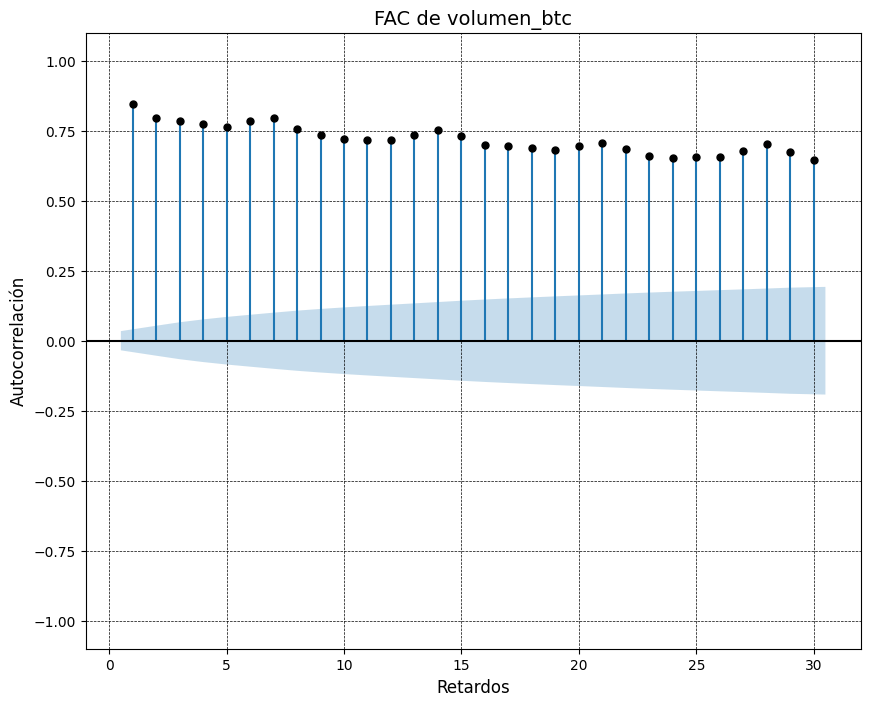

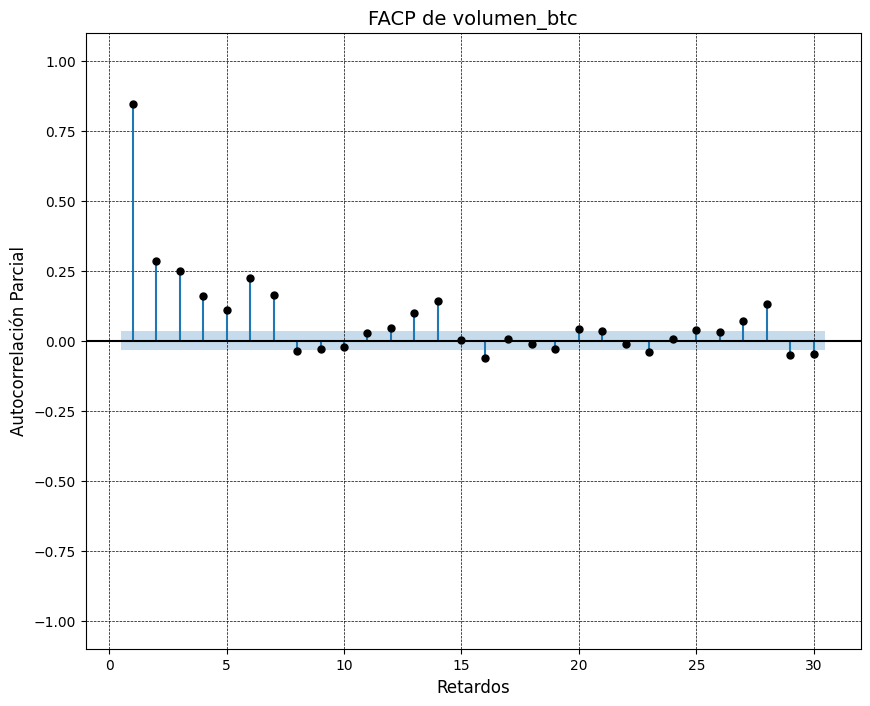

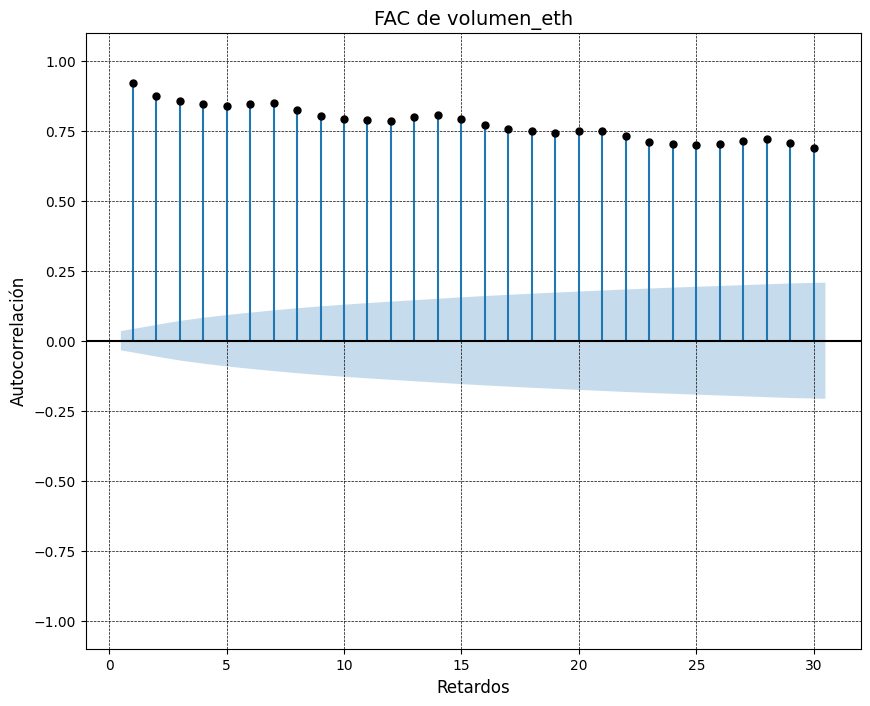

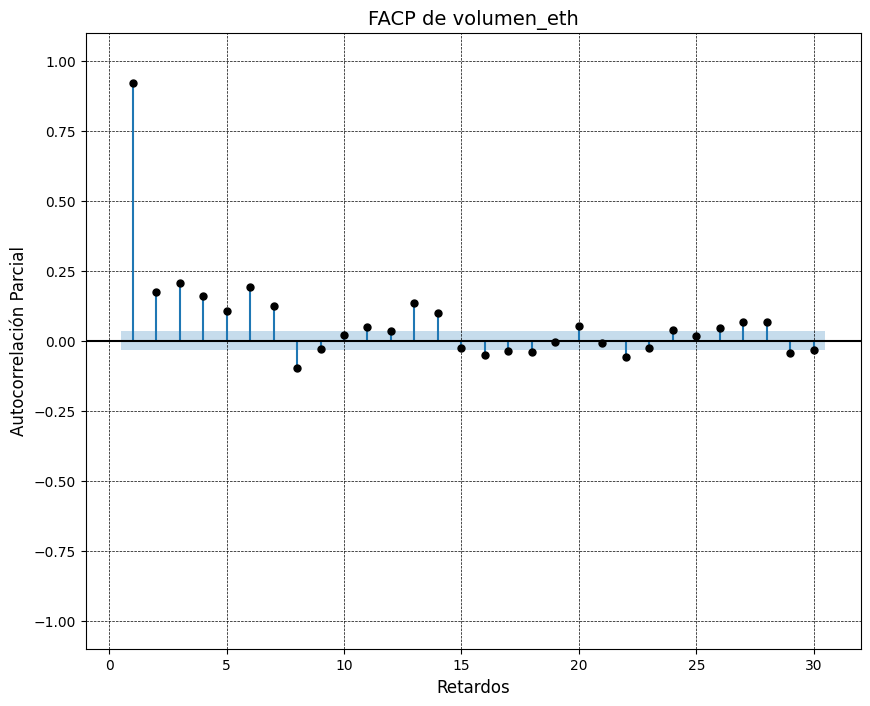

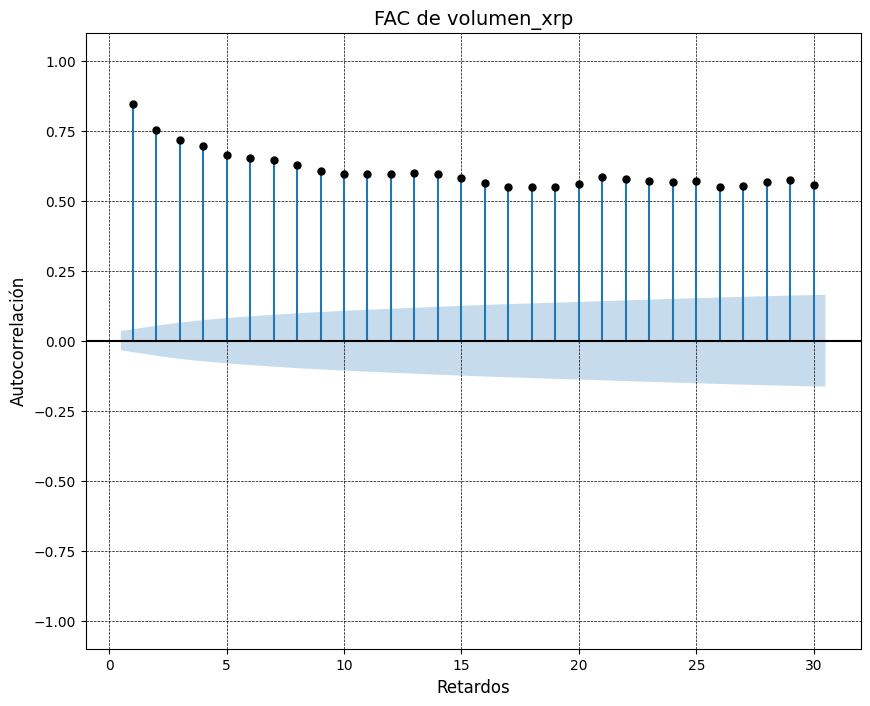

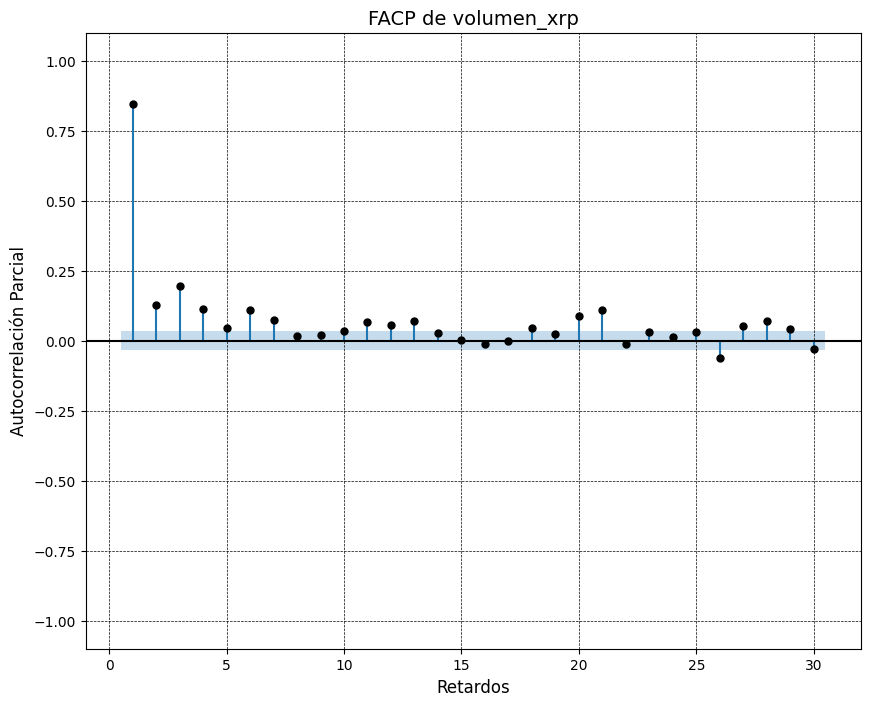

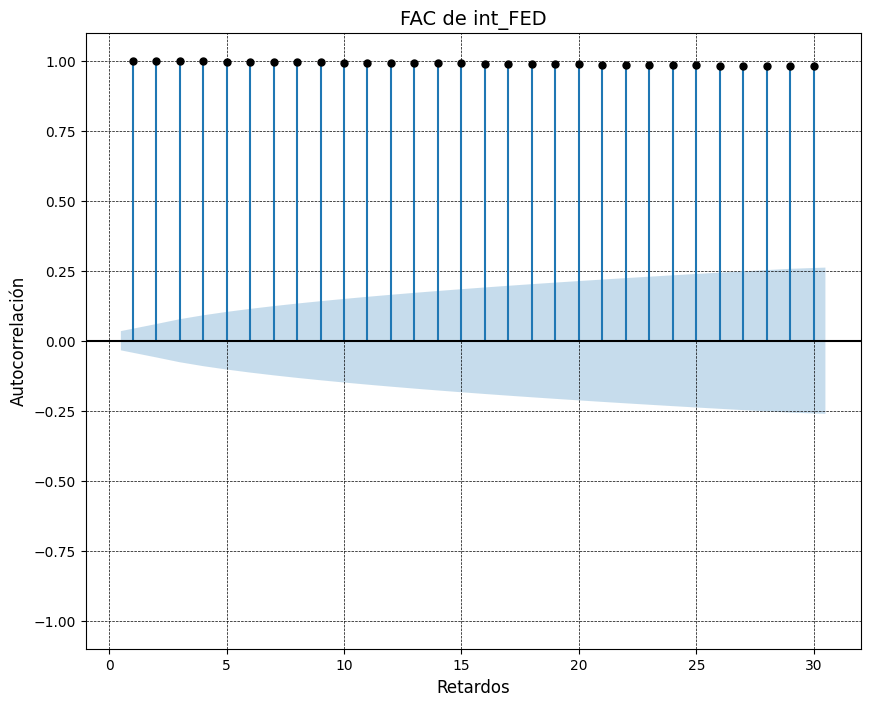

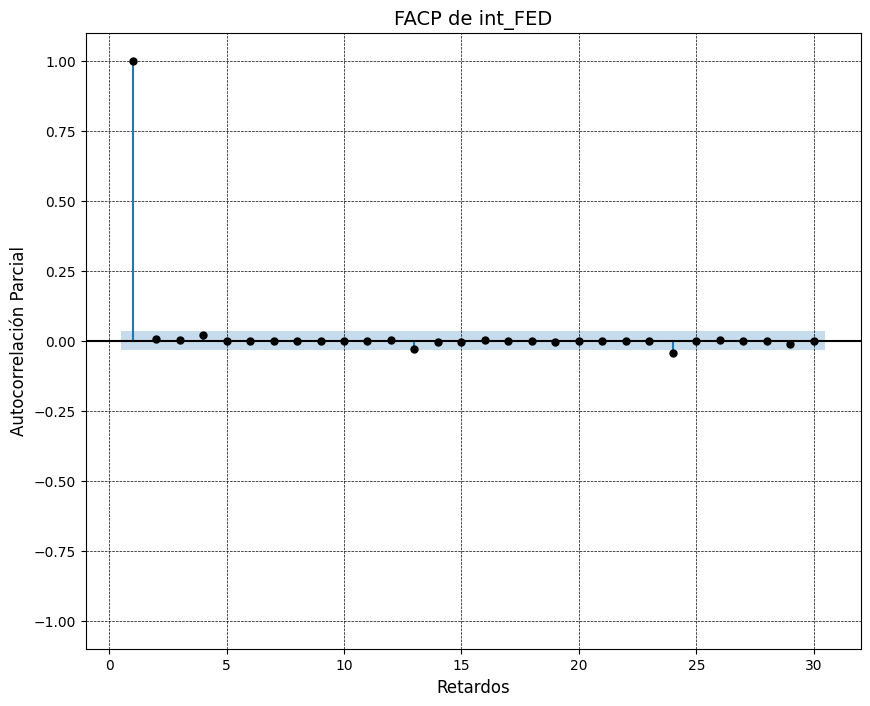

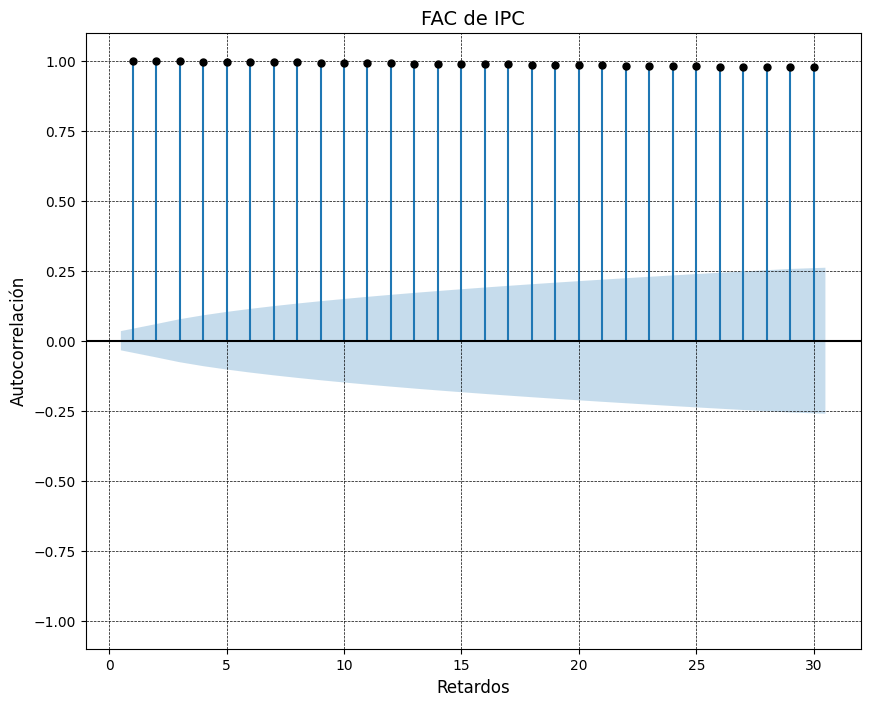

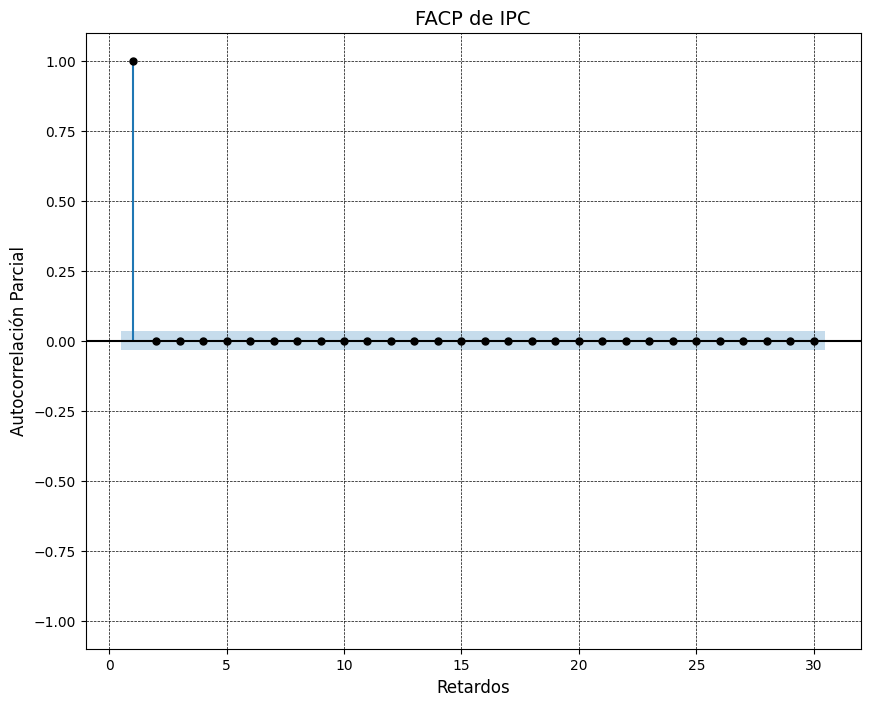

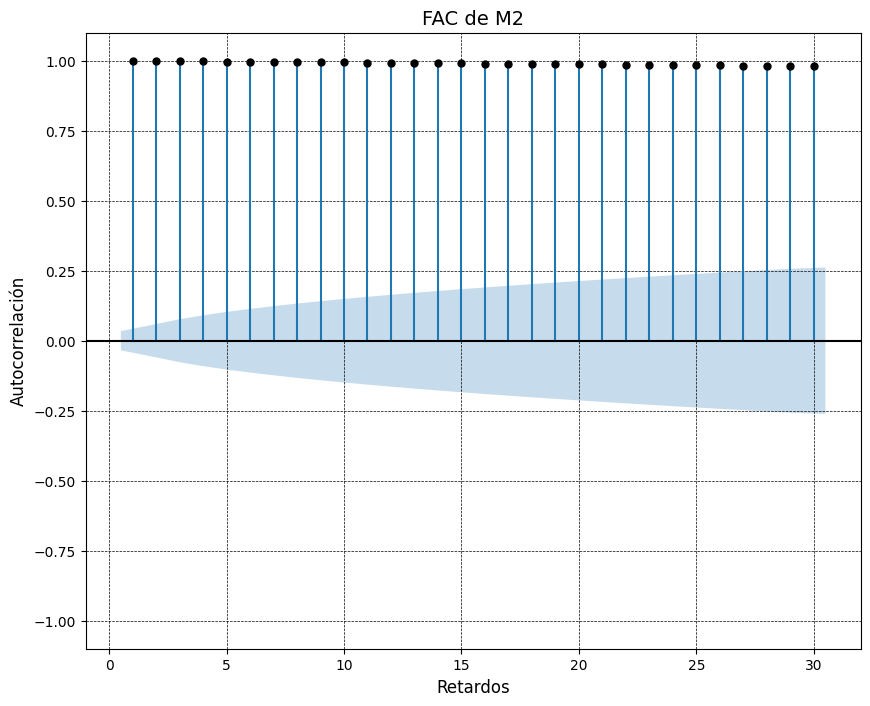

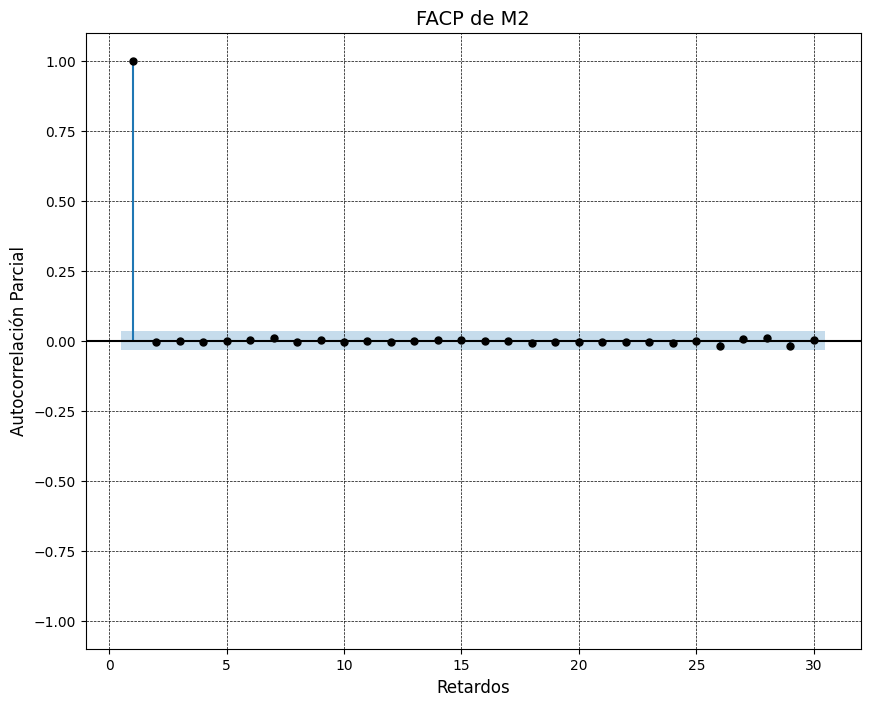

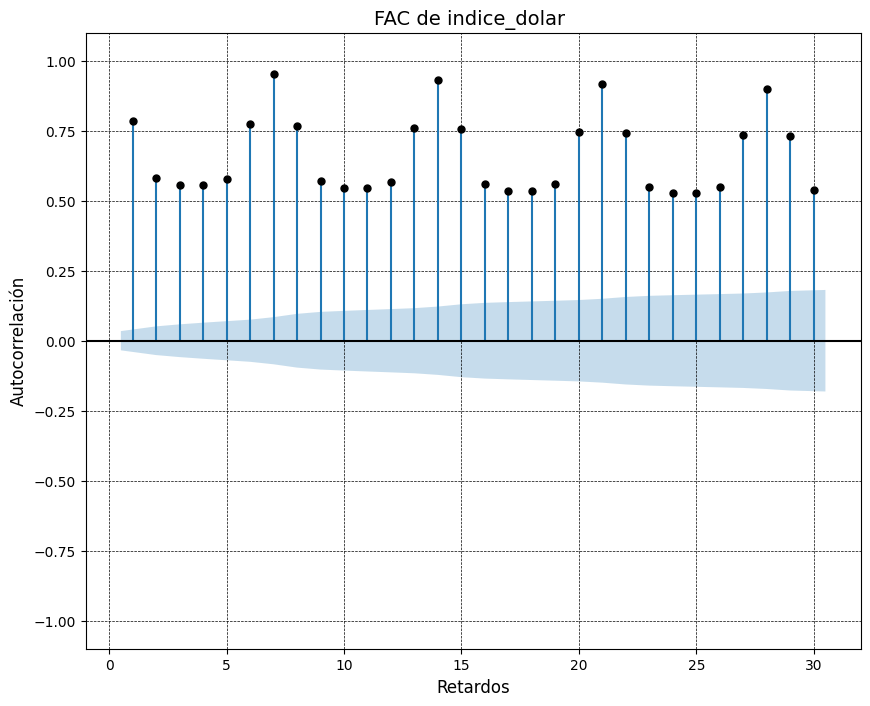

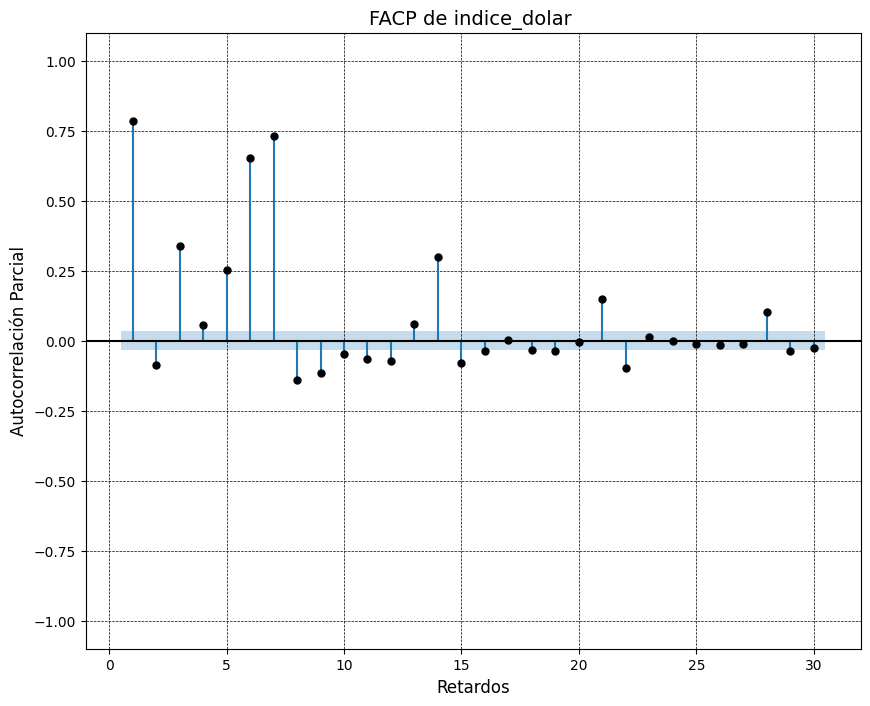

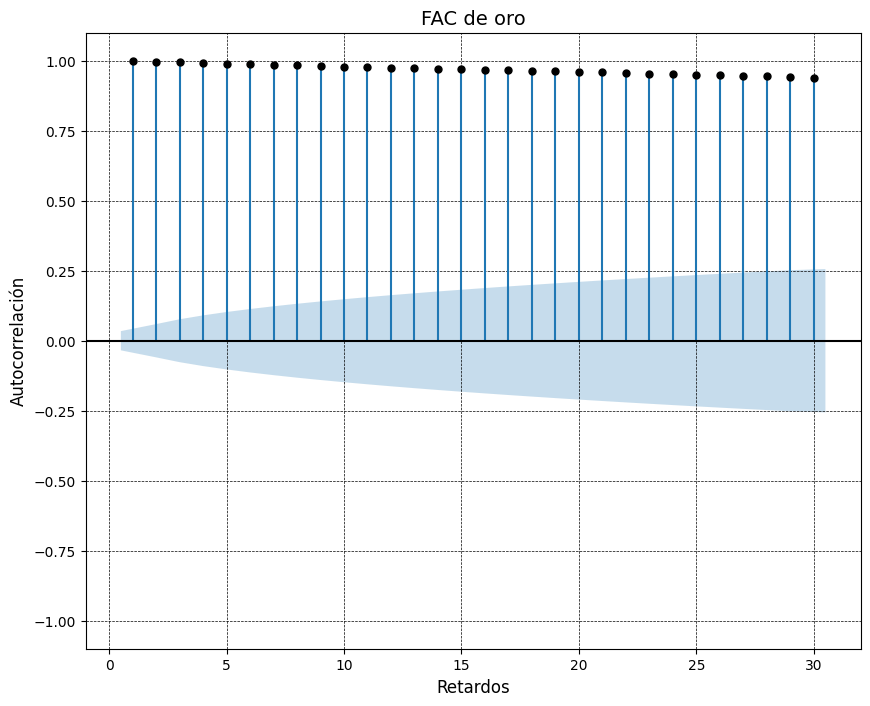

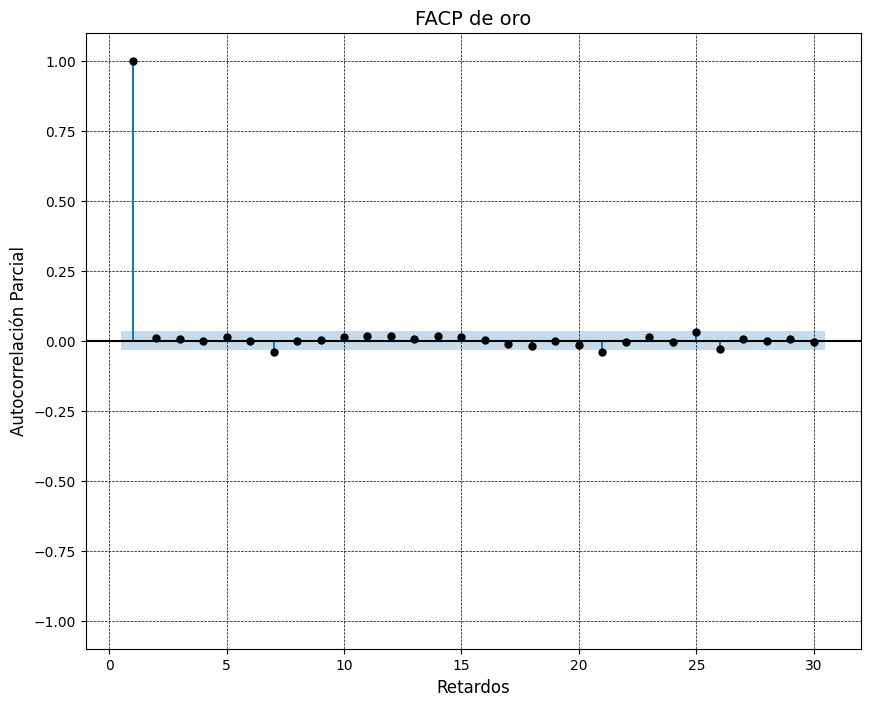

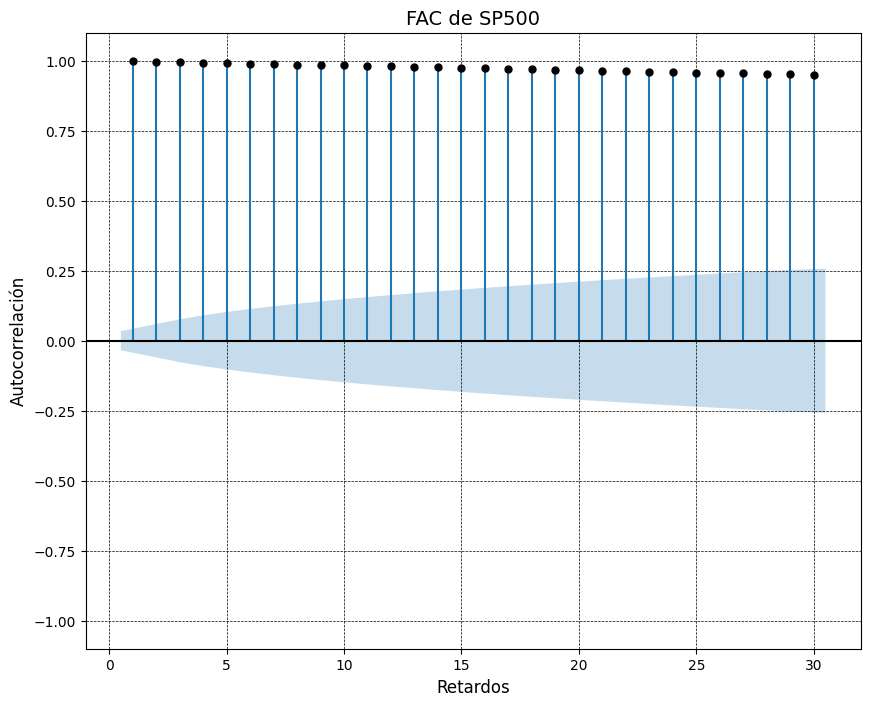

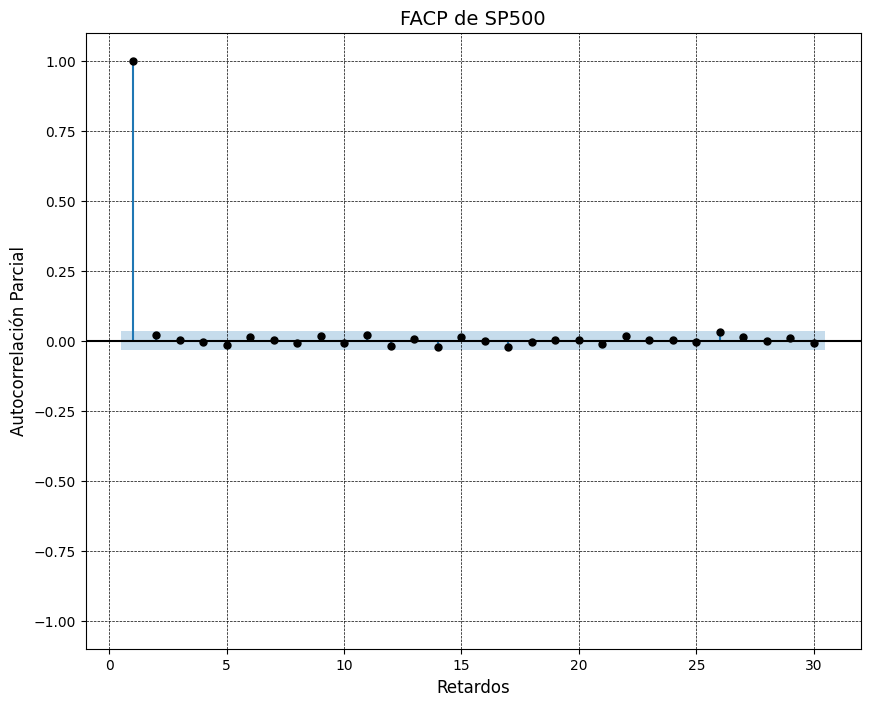

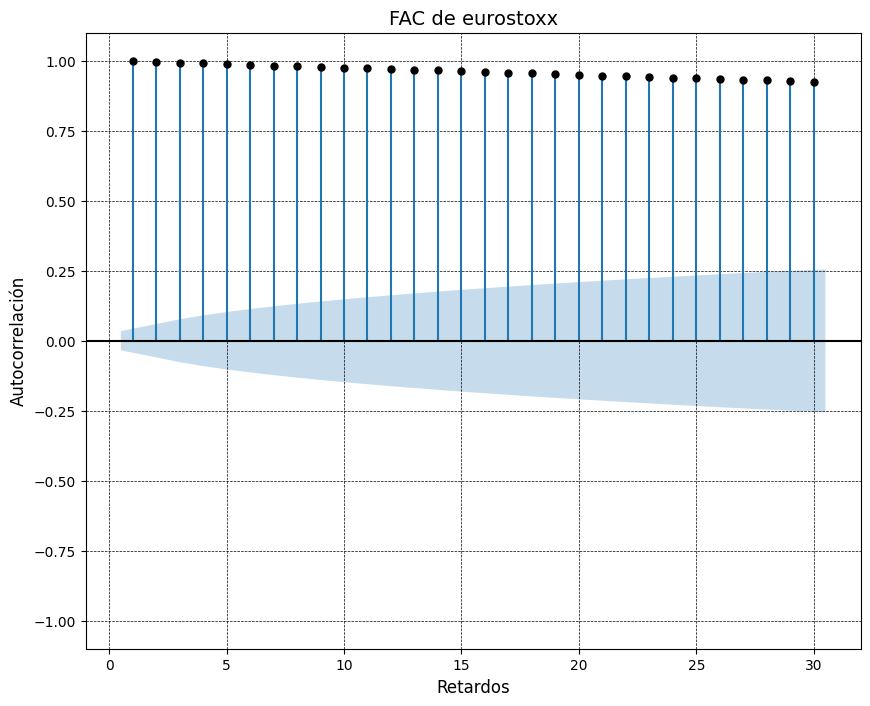

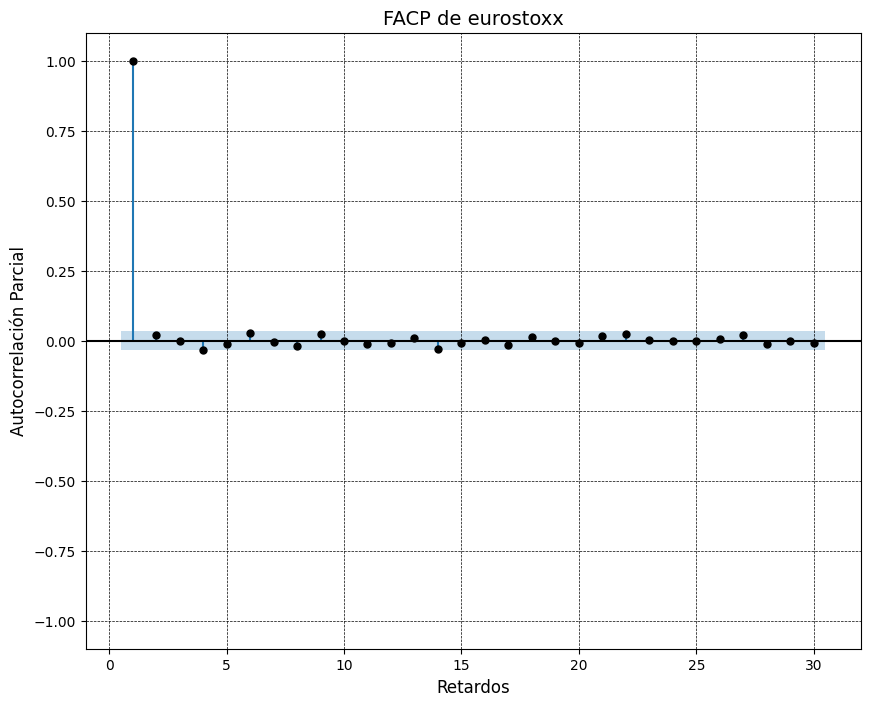

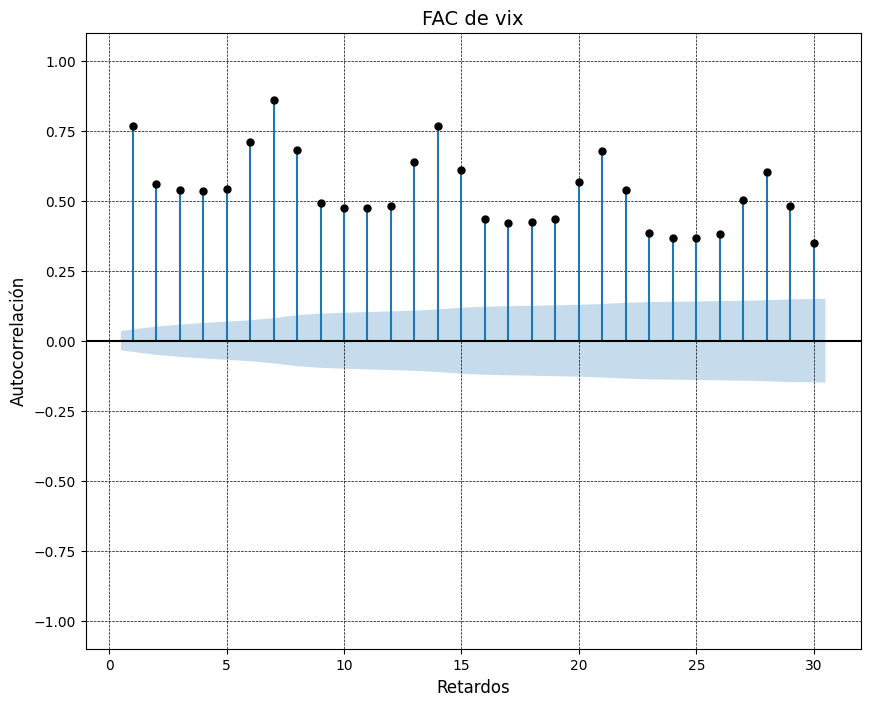

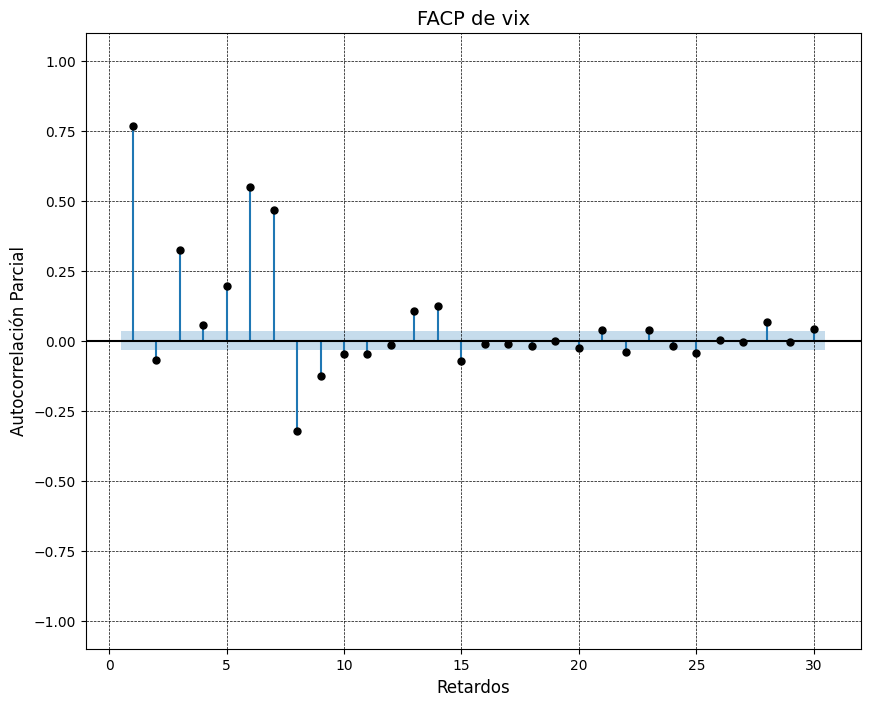

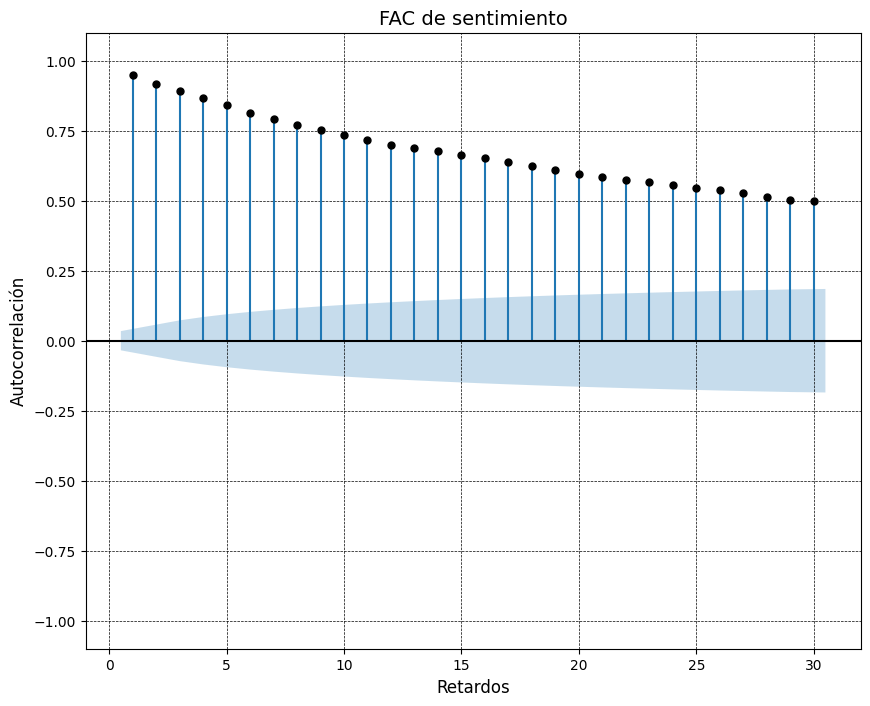

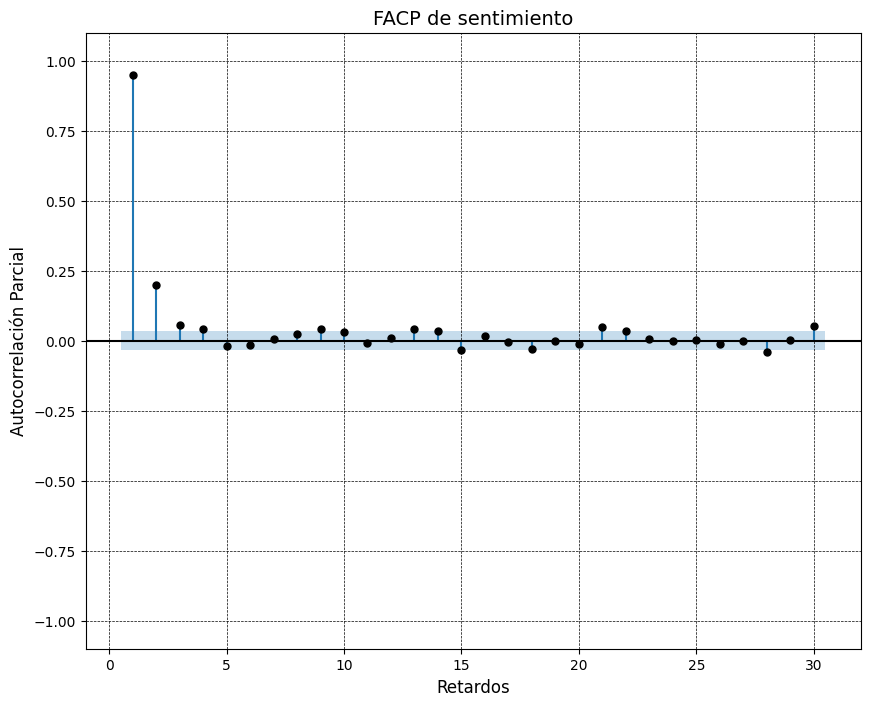

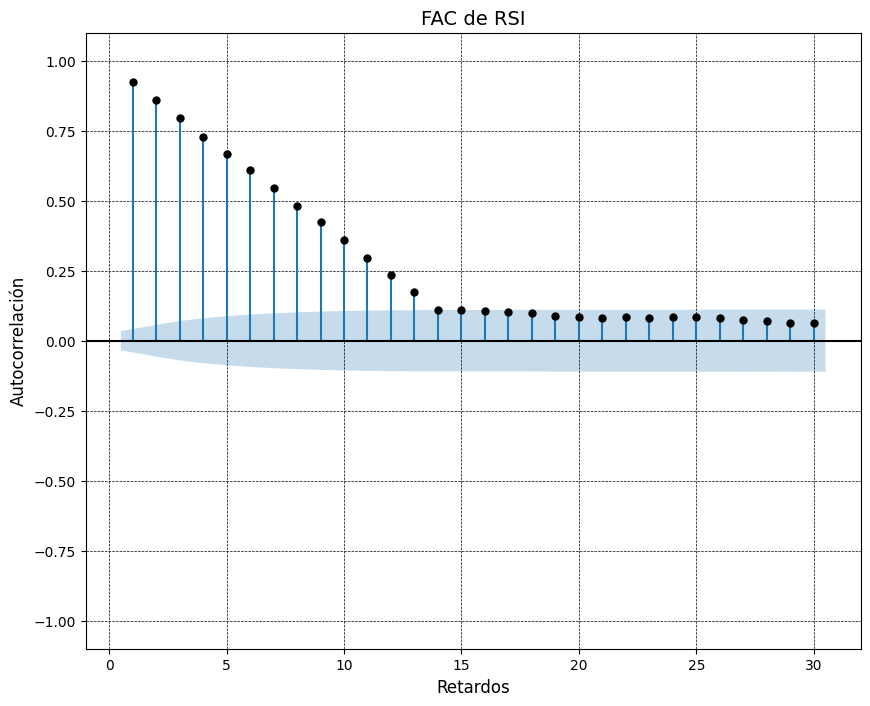

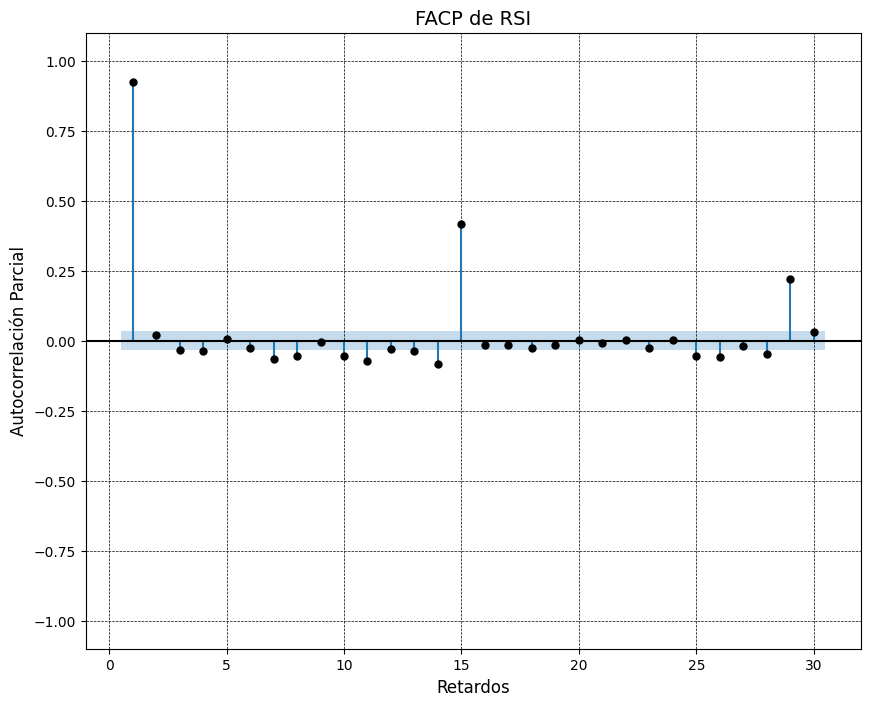

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


archivo = "DatosTFG.xlsx"
df = pd.read_excel(archivo)


df['fecha'] = pd.to_datetime(df['fecha'])
df.set_index('fecha', inplace=True)


variables_excluir = ['fecha', 'precio_btc', 'precio_eth', 'precio_xrp']
variables_graficar = [col for col in df.columns if col not in variables_excluir]


for variable in variables_graficar:
    serie = df[variable].dropna()


    fig, ax = plt.subplots(figsize=(10, 8))
    plot_acf(serie, lags=30, ax=ax, zero=False, alpha=0.05)


    for line in ax.lines:
        line.set_color("black")

    for patch in ax.patches:
        patch.set_facecolor("black")

    ax.set_ylim(-1.1, 1.1)
    ax.set_title(f"FAC de {variable}", fontsize=14)
    ax.set_xlabel("Retardos", fontsize=12)
    ax.set_ylabel("Autocorrelación", fontsize=12)
    ax.grid(True, color="black", linestyle="--", linewidth=0.5)
    plt.show()


    fig, ax = plt.subplots(figsize=(10, 8))
    plot_pacf(serie, lags=30, ax=ax, method='ywm', zero=False, alpha=0.05)


    for line in ax.lines:
        line.set_color("black")

    for patch in ax.patches:
        patch.set_facecolor("black")

    ax.set_ylim(-1.1, 1.1)
    ax.set_title(f"FACP de {variable}", fontsize=14)
    ax.set_xlabel("Retardos", fontsize=12)
    ax.set_ylabel("Autocorrelación Parcial", fontsize=12)
    ax.grid(True, color="black", linestyle="--", linewidth=0.5)
    plt.show()


In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller


archivo = "DatosTFG.xlsx"
df = pd.read_excel(archivo)


df['fecha'] = pd.to_datetime(df['fecha'])
df.set_index('fecha', inplace=True)


variables_excluir = ['fecha', 'precio_btc', 'precio_eth', 'precio_xrp']
variables_graficar = [col for col in df.columns if col not in variables_excluir]


resultados_adf = {}

for variable in variables_graficar:
    serie = df[variable].dropna()
    adf_test = adfuller(serie)


    resultados_adf[variable] = {
        "Estadístico ADF": adf_test[0],
        "p-valor": adf_test[1],
        "Valores críticos": adf_test[4]
    }


for variable, resultado in resultados_adf.items():
    print(f"\n📌 Test de Dickey-Fuller para {variable}:")
    print(f"   ➡️ Estadístico ADF: {resultado['Estadístico ADF']:.4f}")
    print(f"   ➡️ p-valor: {resultado['p-valor']:.4f}")
    print(f"   ➡️ Valores críticos: {resultado['Valores críticos']}")

    if resultado["p-valor"] < 0.05:
        print(f"   ✅ La serie {variable} es **ESTACIONARIA** (se rechaza H0).")
    else:
        print(f"   ❌ La serie {variable} **NO es estacionaria** (no se puede rechazar H0).")



📌 Test de Dickey-Fuller para volumen_btc:
   ➡️ Estadístico ADF: -2.1596
   ➡️ p-valor: 0.2212
   ➡️ Valores críticos: {'1%': -3.432378047525015, '5%': -2.862436069383185, '10%': -2.5672469973560355}
   ❌ La serie volumen_btc **NO es estacionaria** (no se puede rechazar H0).

📌 Test de Dickey-Fuller para volumen_eth:
   ➡️ Estadístico ADF: -2.6233
   ➡️ p-valor: 0.0883
   ➡️ Valores críticos: {'1%': -3.432378047525015, '5%': -2.862436069383185, '10%': -2.5672469973560355}
   ❌ La serie volumen_eth **NO es estacionaria** (no se puede rechazar H0).

📌 Test de Dickey-Fuller para volumen_xrp:
   ➡️ Estadístico ADF: -3.2813
   ➡️ p-valor: 0.0157
   ➡️ Valores críticos: {'1%': -3.432378047525015, '5%': -2.862436069383185, '10%': -2.5672469973560355}
   ✅ La serie volumen_xrp es **ESTACIONARIA** (se rechaza H0).

📌 Test de Dickey-Fuller para int_FED:
   ➡️ Estadístico ADF: -0.1879
   ➡️ p-valor: 0.9400
   ➡️ Valores críticos: {'1%': -3.432359970177518, '5%': -2.862428084811229, '10%': -2.567

In [ ]:
!pip install arch

import pandas as pd
from arch.unitroot import PhillipsPerron


archivo = "DatosTFG.xlsx"
df = pd.read_excel(archivo)


df['fecha'] = pd.to_datetime(df['fecha'])


variables_nombres = {col: col for col in df.columns if col not in ['fecha', 'precio_btc', 'precio_eth', 'precio_xrp']}


resultados_pp = {}

for columna, nombre in variables_nombres.items():
    serie = df[columna].dropna()


    pp_test = PhillipsPerron(serie)


    resultados_pp[nombre] = {
        "Estadístico PP": pp_test.stat,
        "p-valor": pp_test.pvalue,
        "Valores críticos": pp_test.critical_values
    }


for nombre, resultado in resultados_pp.items():
    print(f"\n🔹 Test de Phillips-Perron para {nombre}:")
    print(f"   ➡️ Estadístico PP: {resultado['Estadístico PP']:.4f}")
    print(f"   ➡️ p-valor: {resultado['p-valor']:.4f}")
    print(f"   ➡️ Valores críticos: {resultado['Valores críticos']}")


    if resultado["p-valor"] < 0.05:
        print(f"   ✅ La serie {nombre} es **ESTACIONARIA** (se rechaza H0).")
    else:
        print(f"   ❌ La serie {nombre} **NO es estacionaria** (no se puede rechazar H0).")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 25.2 MB/s eta 0:00:00

🔹 Test de Phillips-Perron para volumen_btc:
   ➡️ Estadístico PP: -22.4989
   ➡️ p-valor: 0.0000
   ➡️ Valores críticos: {'1%': -3.432359970177518, '5%': -2.862428084811229, '10%': -2.5672427465340872}
   ✅ La serie volumen_btc es **ESTACIONARIA** (se rechaza H0).

🔹 Test de Phillips-Perron para volumen_eth:
   ➡️ Estadístico PP: -12.1137
   ➡️ p-valor: 0.0000
   ➡️ Valores críticos: {'1%': -3.432359970177518, '5%': -2.862428084811229, '10%': -2.5672427465340872}
   ✅ La serie volumen_eth es **ESTACIONARIA** (se rechaza H0).

🔹 Test de Phillips-Perron para volumen_xrp:
   ➡️ Estadístico PP: -20.9286
   ➡️ p-valor: 0.0000
   ➡️ Valores críticos: {'1%': -3.432359970177518, '5%': -2.862428084811229, '10%': -2.5672427465340872}
   ✅ La serie volumen_xrp es **ESTACIONARIA** (se rechaza H0).

🔹 Test de Phillips-Perron para int_FED:
   ➡️ Estadístico PP: -0.2058
   ➡️ p-valor: 0.9378
   ➡️ Valores críticos: {'1%

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller


archivo = "DatosTFG.xlsx"
df = pd.read_excel(archivo)


df['fecha'] = pd.to_datetime(df['fecha'])
df.set_index('fecha', inplace=True)


series_a_diferenciar = ['volumen_btc', 'volumen_eth', 'int_FED', 'IPC', 'M2',
                         'indice_dolar ', 'oro', 'SP500', 'eurostoxx']


for serie in series_a_diferenciar:
    df[f'{serie}_diff'] = df[serie].diff()


df.dropna(inplace=True)


resultados_adf = {}

for serie in series_a_diferenciar:
    serie_diff = df[f'{serie}_diff'].dropna()
    adf_test = adfuller(serie_diff)


    resultados_adf[serie] = {
        "Estadístico ADF": adf_test[0],
        "p-valor": adf_test[1],
        "Valores críticos": adf_test[4]
    }


for serie, resultado in resultados_adf.items():
    print(f"\n📌 Test de Dickey-Fuller para {serie}_diff:")
    print(f"   ➡️ Estadístico ADF: {resultado['Estadístico ADF']:.4f}")
    print(f"   ➡️ p-valor: {resultado['p-valor']:.4f}")
    print(f"   ➡️ Valores críticos: {resultado['Valores críticos']}")

    if resultado["p-valor"] < 0.05:
        print(f"   ✅ La serie diferenciada {serie}_diff es **ESTACIONARIA** (se rechaza H0).")
    else:
        print(f"   ❌ La serie diferenciada {serie}_diff **NO es estacionaria** (no se puede rechazar H0).")



📌 Test de Dickey-Fuller para volumen_btc_diff:
   ➡️ Estadístico ADF: -14.6915
   ➡️ p-valor: 0.0000
   ➡️ Valores críticos: {'1%': -3.432378047525015, '5%': -2.862436069383185, '10%': -2.5672469973560355}
   ✅ La serie diferenciada volumen_btc_diff es **ESTACIONARIA** (se rechaza H0).

📌 Test de Dickey-Fuller para volumen_eth_diff:
   ➡️ Estadístico ADF: -13.2437
   ➡️ p-valor: 0.0000
   ➡️ Valores críticos: {'1%': -3.432378676683321, '5%': -2.8624363472748406, '10%': -2.5672471452999863}
   ✅ La serie diferenciada volumen_eth_diff es **ESTACIONARIA** (se rechaza H0).

📌 Test de Dickey-Fuller para int_FED_diff:
   ➡️ Estadístico ADF: -58.3430
   ➡️ p-valor: 0.0000
   ➡️ Valores críticos: {'1%': -3.4323605881678785, '5%': -2.8624283577717917, '10%': -2.567242891852544}
   ✅ La serie diferenciada int_FED_diff es **ESTACIONARIA** (se rechaza H0).

📌 Test de Dickey-Fuller para IPC_diff:
   ➡️ Estadístico ADF: -4.9437
   ➡️ p-valor: 0.0000
   ➡️ Valores críticos: {'1%': -3.432360588167878

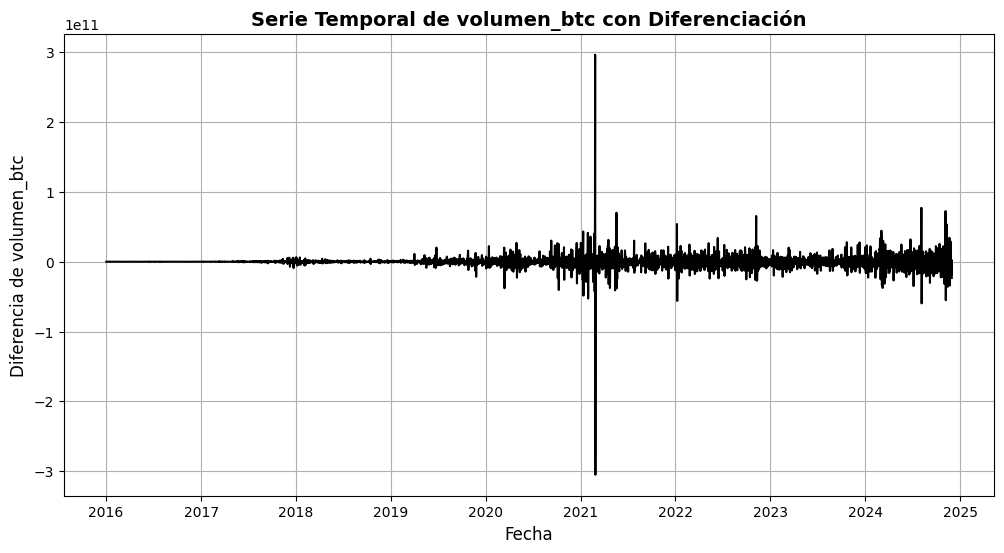

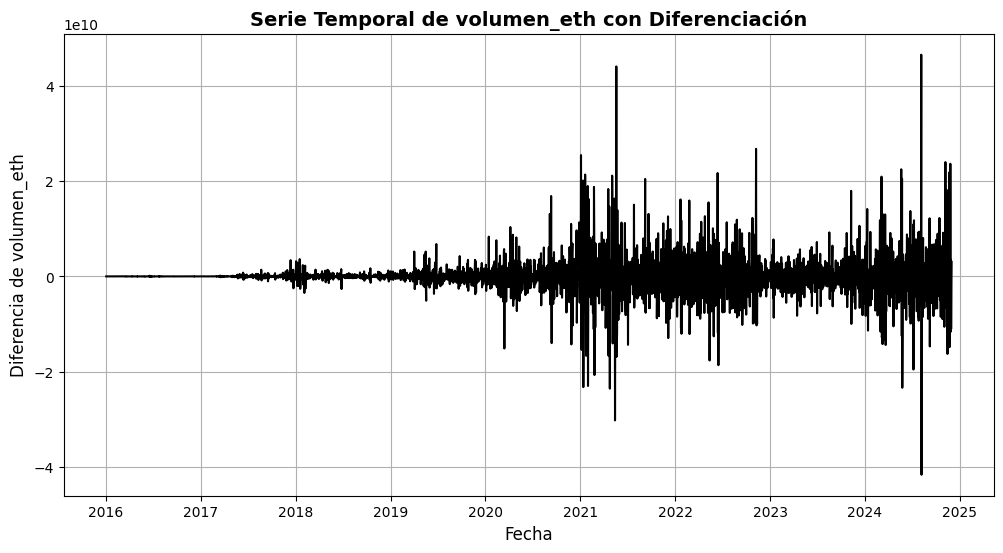

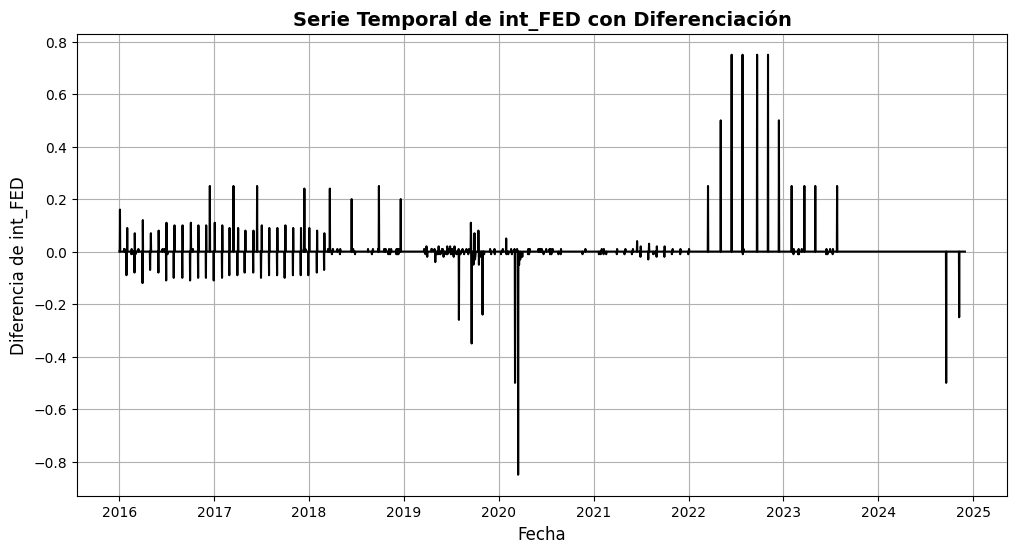

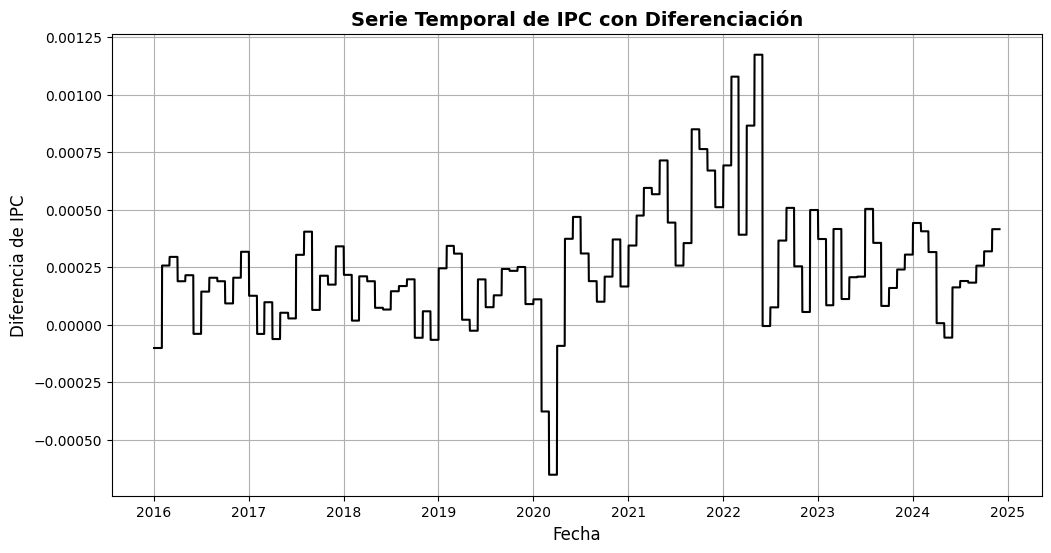

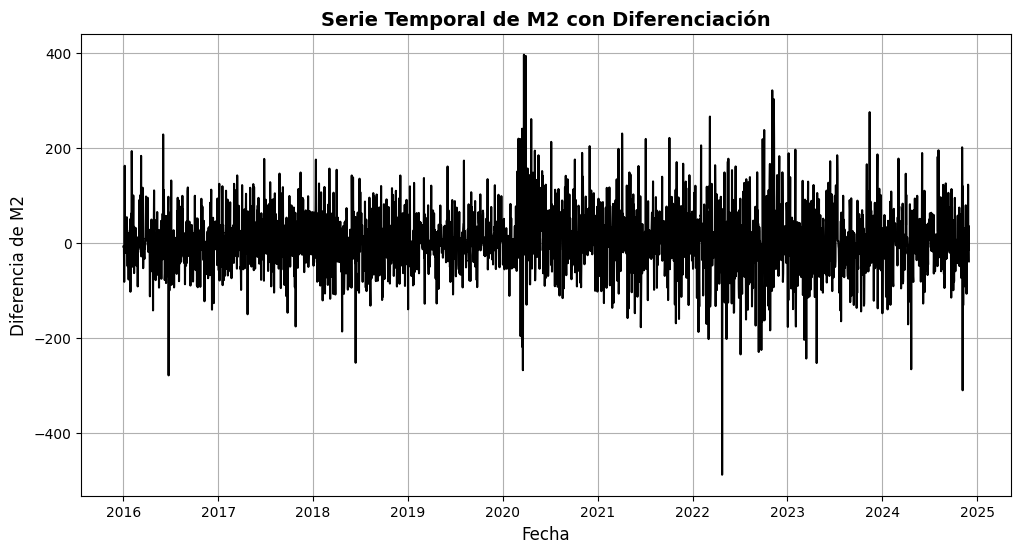

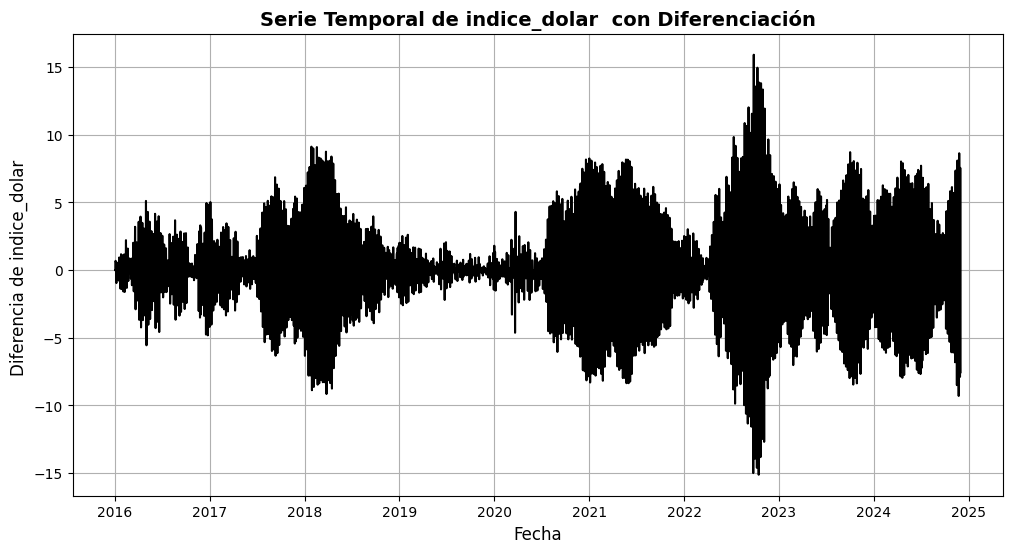

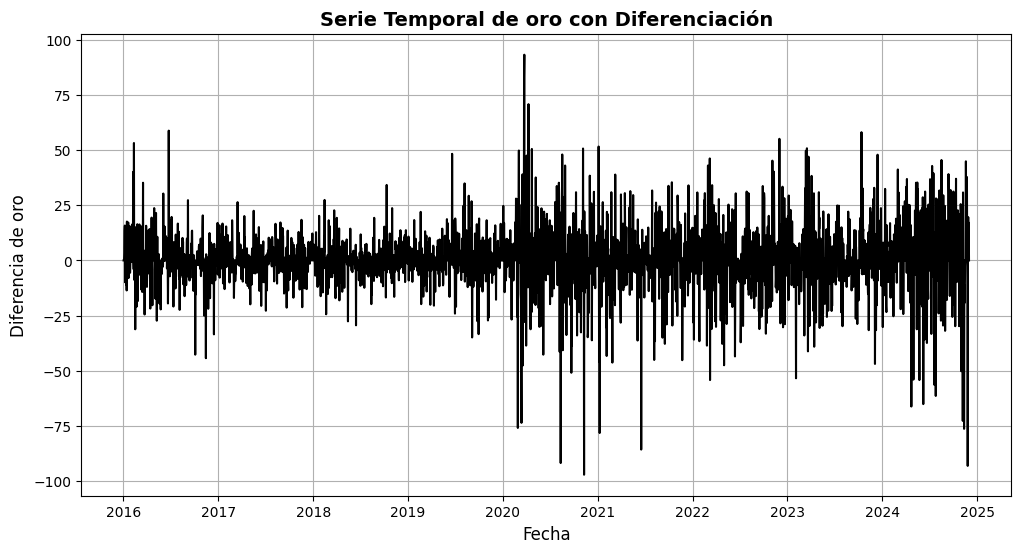

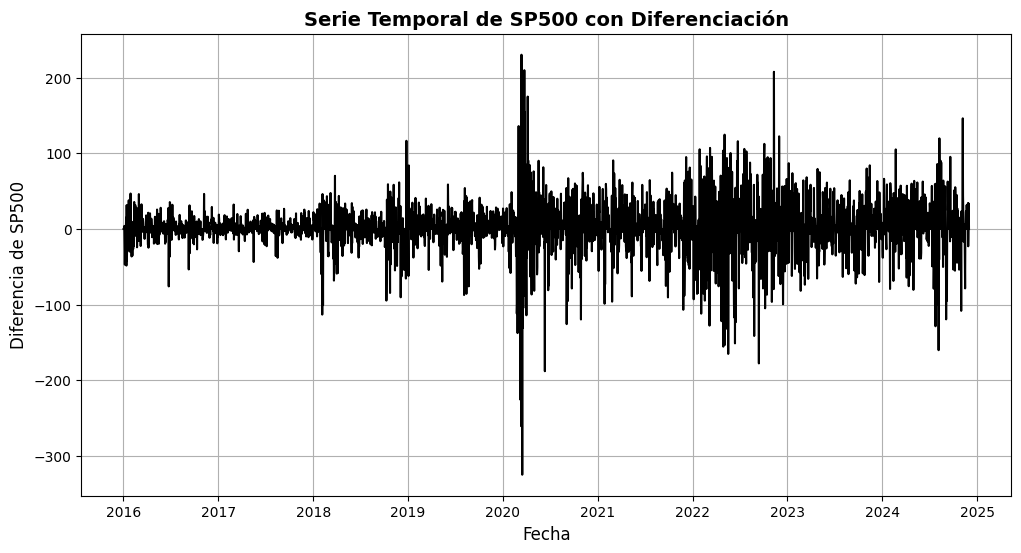

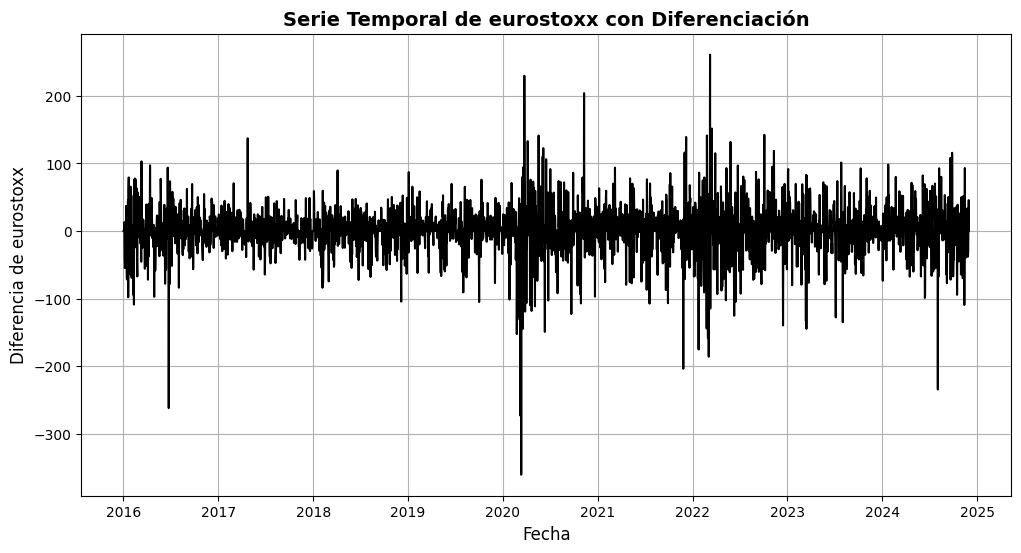

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


archivo = "DatosTFG.xlsx"
df = pd.read_excel(archivo)


df['fecha'] = pd.to_datetime(df['fecha'])
df.set_index('fecha', inplace=True)


series_a_diferenciar = ['volumen_btc', 'volumen_eth', 'int_FED',
                        'IPC', 'M2', 'indice_dolar ', 'oro',
                        'SP500', 'eurostoxx']


for serie in series_a_diferenciar:
    df[f'{serie}_diff'] = df[serie].diff()


df.dropna(inplace=True)


for serie in series_a_diferenciar:
    plt.figure(figsize=(12, 6))
    plt.plot(df[f'{serie}_diff'], color="black")
    plt.title(f"Serie Temporal de {serie} con Diferenciación", fontsize=14, fontweight="bold")
    plt.xlabel("Fecha", fontsize=12)
    plt.ylabel(f"Diferencia de {serie}", fontsize=12)
    plt.grid()
    plt.show()


In [ ]:
!pip install arch

import pandas as pd
from arch.unitroot import PhillipsPerron


archivo = "DatosTFG.xlsx"
df = pd.read_excel(archivo)


df['fecha'] = pd.to_datetime(df['fecha'])
df.set_index('fecha', inplace=True)


series_a_diferenciar = ['volumen_btc', 'volumen_eth', 'int_FED',
                        'IPC', 'M2', 'indice_dolar ', 'oro',
                        'SP500', 'eurostoxx']


for serie in series_a_diferenciar:
    df[f'{serie}_diff'] = df[serie].diff()


df.dropna(inplace=True)


resultados_pp = {}

for serie in series_a_diferenciar:
    serie_diff = df[f'{serie}_diff'].dropna()
    pp_test = PhillipsPerron(serie_diff)


    resultados_pp[serie] = {
        "Estadístico PP": pp_test.stat,
        "p-valor": pp_test.pvalue,
        "Valores críticos": pp_test.critical_values
    }


for serie, resultado in resultados_pp.items():
    print(f"\n📌 Test de Phillips-Perron para {serie}_diff:")
    print(f"   ➡️ Estadístico PP: {resultado['Estadístico PP']:.4f}")
    print(f"   ➡️ p-valor: {resultado['p-valor']:.4f}")
    print(f"   ➡️ Valores críticos: {resultado['Valores críticos']}")


    if resultado["p-valor"] < 0.05:
        print(f"   ✅ La serie diferenciada {serie}_diff es **ESTACIONARIA** (se rechaza H0).")
    else:
        print(f"   ❌ La serie diferenciada {serie}_diff **NO es estacionaria** (no se puede rechazar H0).")



📌 Test de Phillips-Perron para volumen_btc_diff:
   ➡️ Estadístico PP: -168.9717
   ➡️ p-valor: 0.0000
   ➡️ Valores críticos: {'1%': -3.4323605881678785, '5%': -2.8624283577717917, '10%': -2.567242891852544}
   ✅ La serie diferenciada volumen_btc_diff es **ESTACIONARIA** (se rechaza H0).

📌 Test de Phillips-Perron para volumen_eth_diff:
   ➡️ Estadístico PP: -115.2938
   ➡️ p-valor: 0.0000
   ➡️ Valores críticos: {'1%': -3.4323605881678785, '5%': -2.8624283577717917, '10%': -2.567242891852544}
   ✅ La serie diferenciada volumen_eth_diff es **ESTACIONARIA** (se rechaza H0).

📌 Test de Phillips-Perron para int_FED_diff:
   ➡️ Estadístico PP: -58.3354
   ➡️ p-valor: 0.0000
   ➡️ Valores críticos: {'1%': -3.4323605881678785, '5%': -2.8624283577717917, '10%': -2.567242891852544}
   ✅ La serie diferenciada int_FED_diff es **ESTACIONARIA** (se rechaza H0).

📌 Test de Phillips-Perron para IPC_diff:
   ➡️ Estadístico PP: -5.3312
   ➡️ p-valor: 0.0000
   ➡️ Valores críticos: {'1%': -3.43236058

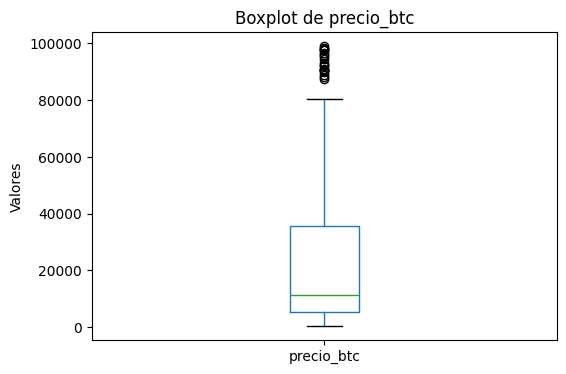

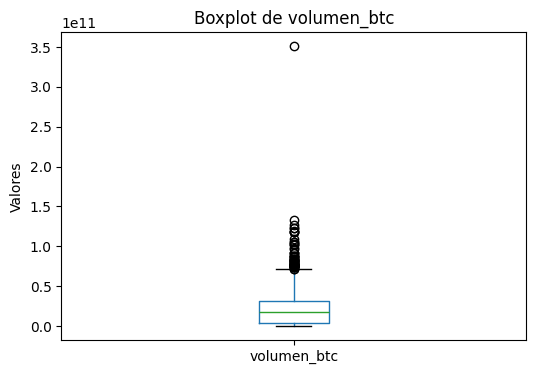

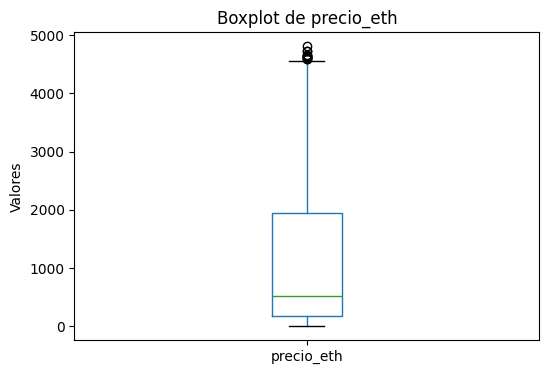

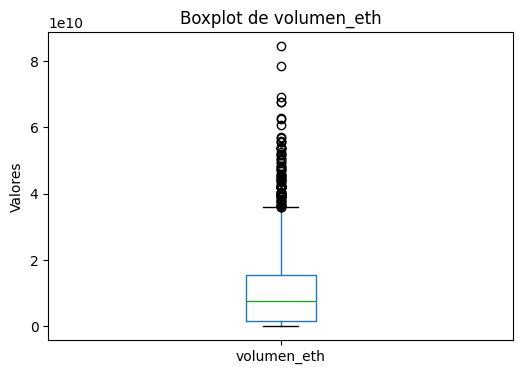

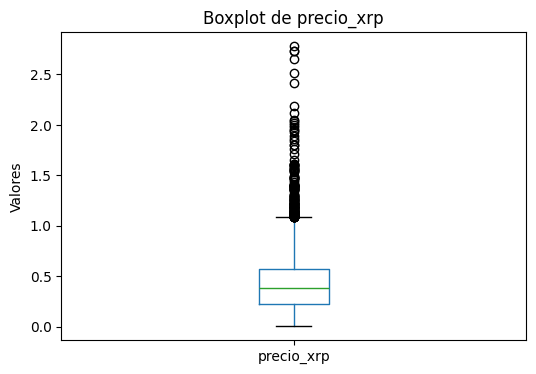

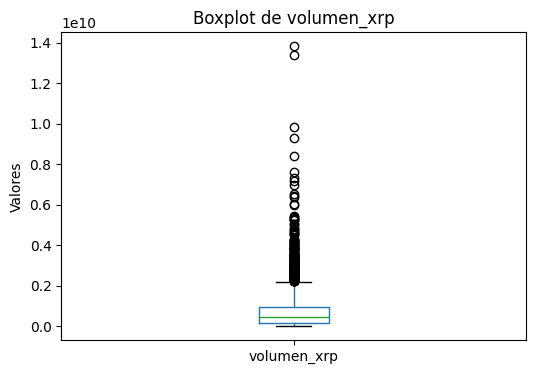

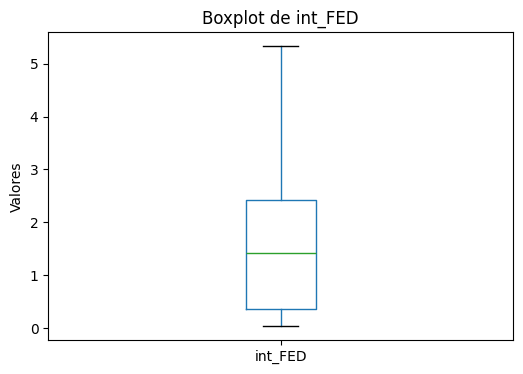

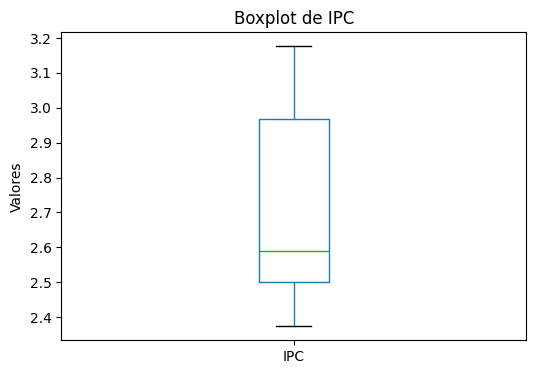

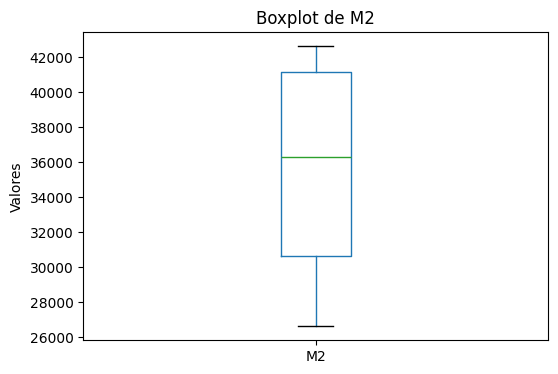

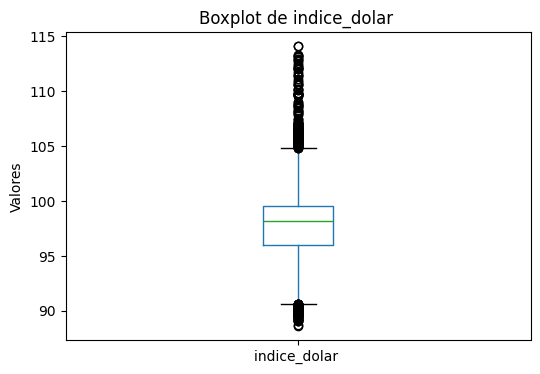

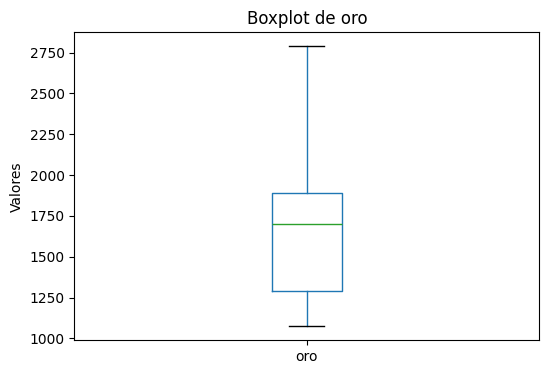

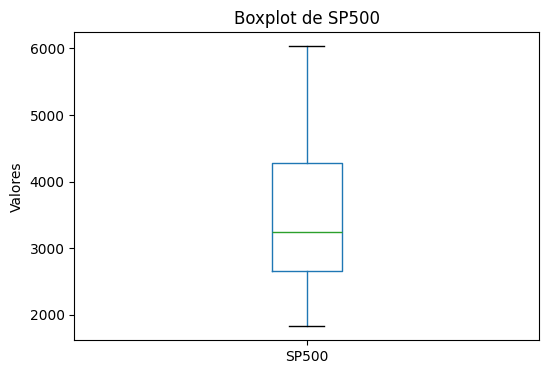

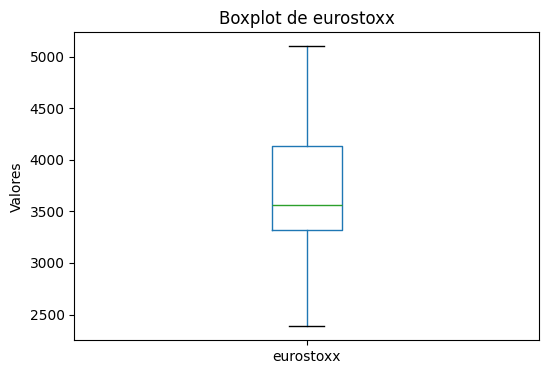

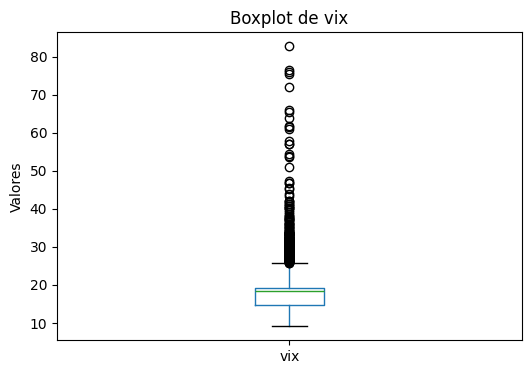

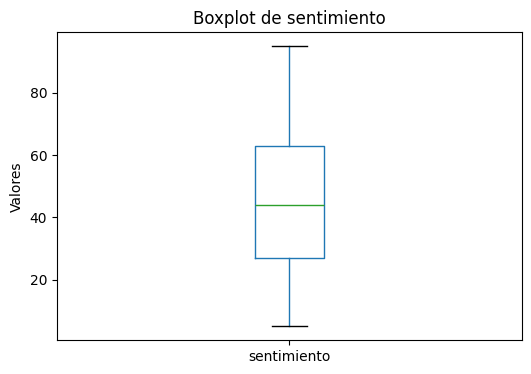

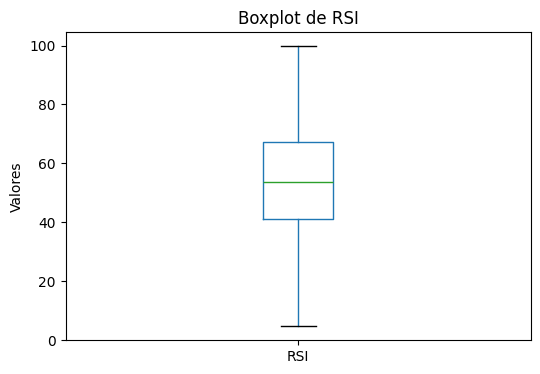

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


archivo = "DatosTFG.xlsx"
df = pd.read_excel(archivo)


df['fecha'] = pd.to_datetime(df['fecha'])
df.set_index('fecha', inplace=True)


variables = df.columns


for var in variables:
    plt.figure(figsize=(6, 4))
    df.boxplot(column=var)
    plt.title(f"Boxplot de {var}")
    plt.ylabel("Valores")
    plt.grid(False)
    plt.show()


In [ ]:
import pandas as pd


def contar_outliers(df):
    outliers = {}
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        num_outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        outliers[col] = num_outliers
    return outliers


outliers_por_variable = contar_outliers(df)
for variable, num_outliers in outliers_por_variable.items():
    print(f"{variable}: {num_outliers} outliers")


precio_btc: 20 outliers
volumen_btc: 61 outliers
precio_eth: 12 outliers
volumen_eth: 93 outliers
precio_xrp: 162 outliers
volumen_xrp: 224 outliers
int_FED: 0 outliers
IPC: 0 outliers
M2: 0 outliers
indice_dolar : 368 outliers
oro: 0 outliers
SP500: 0 outliers
eurostoxx: 0 outliers
vix: 294 outliers
sentimiento: 0 outliers
RSI: 0 outliers


In [ ]:
import pandas as pd


columnas_interes = ['precio_btc', 'volumen_btc', 'precio_eth', 'volumen_eth', 'precio_xrp', 'volumen_xrp']
estadisticas = df[columnas_interes].describe().T


estadisticas['Asimetría'] = df[columnas_interes].skew()
estadisticas['Curtosis'] = df[columnas_interes].kurt()


print(estadisticas)


estadisticas.to_csv("estadisticas_basicas.csv")

              count          mean           std           min           25%  \
precio_btc   3257.0  2.162727e+04  2.116724e+04  3.643310e+02  5.350727e+03   
volumen_btc  3257.0  2.081092e+10  1.983729e+10  2.851400e+07  4.503800e+09   
precio_eth   3257.0  1.177919e+03  1.215801e+03  9.381262e-01  1.753657e+02   
volumen_eth  3257.0  1.012025e+10  1.042870e+10  2.020320e+05  1.613510e+09   
precio_xrp   3257.0  4.321344e-01  3.362524e-01  4.000000e-03  2.264000e-01   
volumen_xrp  3257.0  7.438709e+08  9.773034e+08  1.000000e+01  1.442100e+08   

                      50%           75%           max  Asimetría   Curtosis  
precio_btc   1.118281e+04  3.567813e+04  9.899766e+04   1.011693   0.038536  
volumen_btc  1.782105e+10  3.133871e+10  3.509679e+11   2.557689  25.480942  
precio_eth   5.264390e+02  1.937067e+03  4.812087e+03   0.859579  -0.443250  
volumen_eth  7.703604e+09  1.535678e+10  8.448291e+10   1.691008   4.424556  
precio_xrp   3.810000e-01  5.698000e-01  2.780000e+00   

In [ ]:
import pandas as pd


columnas_interes = ['indice_dolar ', 'vix']
estadisticas = df[columnas_interes].describe().T


estadisticas['Asimetría'] = df[columnas_interes].skew()
estadisticas['Curtosis'] = df[columnas_interes].kurt()


print(estadisticas)


estadisticas.to_csv("estadisticas_basicas.csv")


                count       mean       std        min        25%        50%  \
indice_dolar   3257.0  98.183169  4.183428  88.589996  95.970001  98.188218   
vix            3257.0  18.468955  6.258681   9.140000  14.610000  18.465795   

                     75%         max  Asimetría   Curtosis  
indice_dolar   99.519997  114.110001   0.500446   0.755864  
vix            19.110001   82.690002   3.051199  19.077701  


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import zscore


file_path = "DatosTFG.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet1")


df["fecha"] = pd.to_datetime(df["fecha"], errors='coerce')


excluded_vars = ["Vix", "sentimiento", "volumen_xrp", "RSI"]


diff_df = df.copy()
for col in df.select_dtypes(include=[np.number]).columns:
    if col not in excluded_vars:
        diff_df[col] = df[col].diff()


diff_df = diff_df.dropna().reset_index(drop=True)


def count_outliers(series):
    return np.sum(np.abs(zscore(series, nan_policy='omit')) > 3)


outliers_count = {col: count_outliers(diff_df[col]) for col in diff_df.select_dtypes(include=[np.number]).columns}


outliers_df = pd.DataFrame.from_dict(outliers_count, orient='index', columns=['Número de Outliers'])


print(outliers_df)


               Número de Outliers
precio_btc                     88
volumen_btc                    34
precio_eth                     82
volumen_eth                    71
precio_xrp                     63
volumen_xrp                    57
int_FED                        27
IPC                            90
M2                             47
indice_dolar                   61
oro                            62
SP500                          65
eurostoxx                      58
vix                            54
sentimiento                     0
RSI                             0
